<a href="https://colab.research.google.com/github/mauriciomau0/ML-Based-Performance-Monitoring-Approach-for-Athlete-Performance-Attenuation-Prediction/blob/main/Teste_ML_Paper_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Data Loading and Feature Dropping

The code reads data from an Excel file (pd.read_excel) and displays the first few rows (data.head()), which are standard initial steps in preparing data for analysis.

## Importing the appropriate packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading our data

In [ ]:
data = pd.read_excel("/content/Data_PhD.xlsx")
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


Age  Weight (kg)  %Body Fat  1RM Hip Thrust (kg)  1RM Back Squat (kg)  \
0   22         82.7        8.8                125.0                125.0   
1   18         84.0       18.0                120.0                110.0   
2   20         72.8       12.3                105.0                 95.0   
3   30         82.0       11.9                 95.0                100.0   
4   27         70.1       14.0                105.0                105.0   

   Relative 1RM HT(kg)  Relative 1RM Squat (kg)  Speed 5m (s)  Speed 20m (s)  \
0                 1.51                     1.51          1.09           3.06   
1                 1.43                     1.31          1.16           3.19   
2                 1.44                     1.30          1.09           3.07   
3                 1.16                     1.22          1.05           3.04   
4                 1.50                     1.50          1.25           3.11   

   v02 Max (ml.kg-1.min-1)  Baseline Drop Jump (cm)  \
0                     65.9                     41.0   
1                     44.9                     33.0   
2                     48.7                     31.6   
3                     47.3                     36.8   
4                     58.8                     38.7   

   Baseline Contact time (s)  Baseline RSI  Baseline CMJ (cm)  Ranking_PERC  \
0                      0.345          1.19               43.1             3   
1                      0.575          0.57               35.3            12   
2                      0.441          0.72               33.5             3   
3                      0.554          0.66               39.0            21   
4                      0.316          1.23               39.2            26   

   Ranking_CK  Ranking_CMJ  Ranking_DJ  Ranking_DJCont  Ranking_RSI  
0          12           33          37              30           15  
1          20           38          39              15           39  
2          24           24           6               9            6  
3          28           41          41               5           40  
4           9           11          12              40            5

## Feature Selection

The code explicitly drops several columns (df2 = data.drop(...)), indicating a conscious selection of features to be used in subsequent modeling (as implied by assigning the remaining values to X).

In [ ]:
df2 = data.drop(['Ranking_PERC','Ranking_CK','Ranking_CMJ','Ranking_DJ','Ranking_DJCont','Ranking_RSI'], axis=1)
X = df2.values

## Inspecting and choosing the right data

Here we can see that we have 20 columns.

Now, we will see strong relationships between the variables, so it might be a great idea to apply the PCA analysis **if it is needed**.

Also, It calculates the **correlation matrix, creates a heatmap, and then filters out variables with low average absolute correlations**.

In [ ]:
#correlation
correlation=df2.corr()
print(correlation)

                                Age  Weight (kg)  %Body Fat  \
Age                        1.000000     0.276723  -0.071970   
Weight (kg)                0.276723     1.000000   0.565731   
%Body Fat                 -0.071970     0.565731   1.000000   
1RM Hip Thrust (kg)       -0.034184     0.373969   0.329097   
1RM Back Squat (kg)        0.115274     0.437105   0.148208   
Relative 1RM HT(kg)       -0.173771    -0.209970   0.001743   
Relative 1RM Squat (kg)   -0.103530    -0.446389  -0.326537   
Speed 5m (s)               0.146238     0.269870   0.460297   
Speed 20m (s)             -0.037457     0.294524   0.615309   
v02 Max (ml.kg-1.min-1)    0.105476    -0.322439  -0.534923   
Baseline Drop Jump (cm)    0.252325    -0.105248  -0.300389   
Baseline Contact time (s)  0.033431     0.220150   0.127764   
Baseline RSI               0.112776    -0.276198  -0.281416   
Baseline CMJ (cm)          0.343476    -0.017420  -0.294321   

                           1RM Hip Thrust (kg)  1RM Ba

In [ ]:
df2.corr().unstack().sort_values().drop_duplicates()

Baseline Contact time (s)  Baseline RSI              -0.787522
%Body Fat                  v02 Max (ml.kg-1.min-1)   -0.534923
Baseline RSI               Speed 5m (s)              -0.498760
Baseline Contact time (s)  Relative 1RM HT(kg)       -0.488517
Baseline RSI               Speed 20m (s)             -0.484470
                                                        ...   
Speed 20m (s)              Speed 5m (s)               0.746892
1RM Hip Thrust (kg)        1RM Back Squat (kg)        0.778456
Relative 1RM HT(kg)        1RM Hip Thrust (kg)        0.822033
Baseline CMJ (cm)          Baseline Drop Jump (cm)    0.879144
Age                        Age                        1.000000
Length: 92, dtype: float64

<Axes: >

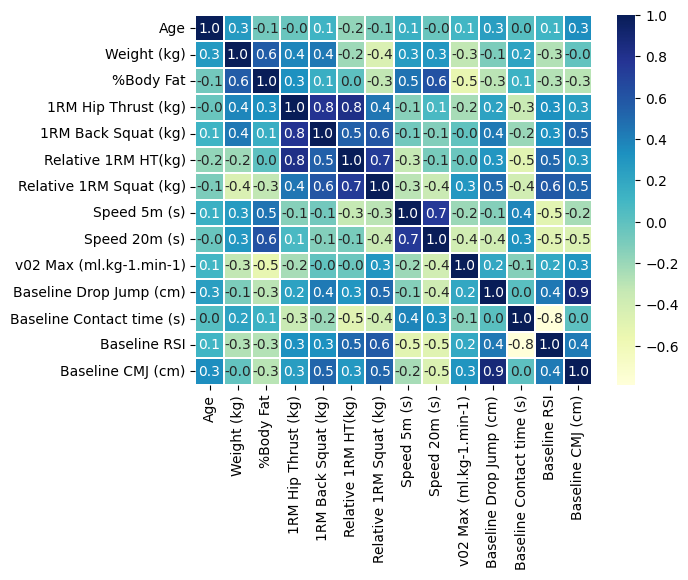

In [ ]:
#heatmap
import seaborn as sns
sns.heatmap(correlation, annot=True,fmt=".1f",linewidths=.1, linecolor='#ffffff',
            cmap='YlGnBu', xticklabels=1, yticklabels=1)

'Age' has a low average correlation with other features and is not strongly correlated with any single feature.

The decision to remove 'Age' is based on specific goals of the modeling process, rather than purely on the correlation analysis.

In [ ]:
import pandas as pd

# Load your dataset into a pandas DataFrame
# Replace 'data.csv' with the path to your dataset

# Calculate correlation matrix
correlation_matrix = df2.corr()

# Calculate average correlation for each variable
average_correlation = correlation_matrix.abs().mean()

# Set a threshold for average correlation
correlation_threshold = 0.25 # Adjust this threshold as needed

# Identify variables with average correlations below the threshold
less_correlated_variables = average_correlation[average_correlation < correlation_threshold].index.tolist()

# Remove less correlated variables from the DataFrame
df_filtered = df2.drop(columns=less_correlated_variables)

# Optional: Print the removed variables
print("Removed Variables:", less_correlated_variables)

# Optionally, you can save the filtered DataFrame to a new file
# df_filtered.to_csv('filtered_data.csv', index=False)


Removed Variables: ['Age']


## **Let's begin the analysis | Factor analysis and principal component analysis (PCA)**

The code aims to perform **factor analysis and principal component analysis** (PCA) on the standardized dataset. It first checks the suitability of the data for factor analysis using **Bartlett's test of sphericity**. Then, it performs PCA and factor analysis with varimax rotation, displaying the loadings and communalities. Finally, it visualizes the **factor loadings** and shows the **explained variance ratio** for each principal component.

Now, that we have our data let's begin with our analysis! Firstly we will standardize our data.

In [ ]:
X = df_filtered.values

In [ ]:
#standardizing our data
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Standardize and scale the data
data_new = scaler.fit_transform(X)


In [ ]:
print(data_new)

[[0.52193995 0.09090909 0.29411765 0.72       0.27777778 0.65277778
  0.44827586 0.33333333 0.93537415 0.81974249 0.33090909 0.3546798
  0.84684685]
 [0.55196305 0.45454545 0.25490196 0.48       0.21428571 0.375
  0.68965517 0.72727273 0.22108844 0.47639485 0.74909091 0.04926108
  0.4954955 ]
 [0.29330254 0.22924901 0.1372549  0.24       0.22222222 0.36111111
  0.44827586 0.36363636 0.35034014 0.41630901 0.50545455 0.12315271
  0.41441441]
 [0.50577367 0.21343874 0.05882353 0.32       0.         0.25
  0.31034483 0.27272727 0.30272109 0.63948498 0.71090909 0.09359606
  0.66216216]
 [0.23094688 0.29644269 0.1372549  0.4        0.26984127 0.63888889
  1.         0.48484848 0.69387755 0.72103004 0.27818182 0.37438424
  0.67117117]
 [0.43648961 0.17786561 0.17647059 0.16       0.18253968 0.13888889
  0.55172414 0.66666667 0.35714286 0.15450644 0.13818182 0.2955665
  0.16666667]
 [0.69053118 0.38339921 0.25490196 0.52       0.13492063 0.29166667
  0.62068966 0.63636364 0.65306122 0.67381974

In [ ]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42568 sha256=c373b3d10930834e4e12126bdb18cc57bc90a5fe79d2b478ac07e3fb27dc12b2
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


## **Bartlett's Test**

Assess the suitability of the data for factor analysis. The heatmap provides a clear overview of the relationships between variables.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
# Import the module that performs the Bartlett test
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_new)
print('Bartlett Sphericity Test: chi² = %d,  p_value = %d' % (chi_square_value, p_value))

Bartlett Sphericity Test: chi² = 661,  p_value = 0


Now, we will continue with the PCA part. It is obvious that our data can be summarized in a smaller dimensional space! Taking into account the <u> <i> <b> Kaiser's </b> </i> </u>  criterion which states that the components that have an eigenvalue greater than 1 are selected, we will choose the first 4 principal components. An eigenvalue greater than 1 indicates that the corresponding component explains more variance than was explained by one variable of the separate variance of each variable in the standardized matrix represents unity. The cumulative variance explance taking only the 4 components is almost 82% (81.80%). Thus, by making PCA we achieved to explain 82% of our data's variance <u> only by looking at a four-dimensional space </u> (which is a great achievement)!

In [ ]:
feature_names = df_filtered.columns
feature_names

Index(['Weight (kg)', '%Body Fat', '1RM Hip Thrust (kg)',
       '1RM Back Squat (kg)', 'Relative 1RM HT(kg)', 'Relative 1RM Squat (kg)',
       'Speed 5m (s)', 'Speed 20m (s)', 'v02 Max (ml.kg-1.min-1)',
       'Baseline Drop Jump (cm)', 'Baseline Contact time (s)', 'Baseline RSI',
       'Baseline CMJ (cm)'],
      dtype='object')

In [ ]:
X = df_filtered.values

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## **Number of Principal Components - PCA**

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [ ]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())

[0.37434597 0.22572264 0.13456639 0.0833872 ]
0.8180222016704668


### **VARIMAX Method**

VARIMAX, short for "variance maximizing rotation," is a type of orthogonal rotation method. Orthogonal rotations keep the factors uncorrelated (independent) from each other, which simplifies interpretation.

VARIMAX specifically aims to:

1.   **Maximize Variance**: It maximizes the variance of the squared factor loadings within each factor. This means it tries to make some loadings very high and others very low, creating a clearer distinction between variables that strongly associate with a factor and those that don't.
2.   **Achieve Simple Structure**: It strives to achieve a "simple structure" where each variable has a high loading on only one factor and low loadings on all other factors. This makes it easier to identify which variables are most representative of each factor.

***Benefits***:

1. **Improved Interpretability**: VARIMAX enhances the interpretability of factor analysis results by making the factor-variable relationships clearer.
2. **Simple Structure**: It simplifies the factor structure, helping researchers identify the most important variables associated with each factor.
3. **Widely Used**: VARIMAX is a popular and well-established method in factor analysis.

***Limitations***:

1.   **Subjectivity**: The interpretation of rotated factors can still involve some degree of subjectivity.
2.   **Orthogonal Assumption**: VARIMAX assumes that the underlying factors are uncorrelated, which may not always be true in reality.





In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

n_comps = 4

methods = [
    ("PCA", PCA(n_components=n_comps)),
    ("Unrotated Loadings", FactorAnalysis(n_components=n_comps)),
    ("Varimax-Rotated Loadings", FactorAnalyzer(n_factors=n_comps, rotation="varimax"))
]

# Assuming X_scaled is your standardized dataset
for method, model in methods:
    model.fit(X_scaled)
    if method == "PCA":
        loadings = model.components_.T
    elif method == "Varimax-Rotated Loadings":
        loadings = model.loadings_
    else:  # For Unrotated FA
        loadings = model.components_.T

    communalities = np.sum(loadings ** 2, axis=1)

    # Create DataFrame
    table = pd.DataFrame(data=loadings, columns=[f'Factor {i+1}' for i in range(n_comps)])
    table['Communalities'] = communalities
    table.index = feature_names  # Assuming feature_names is defined

    print(f"\n\n {method} :\n")
    print(table)



 PCA :

                           Factor 1  Factor 2  Factor 3  Factor 4  \
Weight (kg)               -0.147252  0.381449  0.214424  0.540370   
%Body Fat                 -0.208985  0.426668 -0.080406  0.033473   
1RM Hip Thrust (kg)        0.218369  0.477192 -0.102250  0.044154   
1RM Back Squat (kg)        0.257168  0.393114  0.194930  0.102965   
Relative 1RM HT(kg)        0.318832  0.266994 -0.237880 -0.277535   
Relative 1RM Squat (kg)    0.383149  0.060293 -0.010752 -0.394416   
Speed 5m (s)              -0.273292  0.185139  0.208813 -0.471803   
Speed 20m (s)             -0.294369  0.286047 -0.051804 -0.444176   
v02 Max (ml.kg-1.min-1)    0.162735 -0.311941  0.152674 -0.096304   
Baseline Drop Jump (cm)    0.293820  0.022649  0.475850 -0.097376   
Baseline Contact time (s) -0.258309 -0.025097  0.506162 -0.109327   
Baseline RSI               0.365879 -0.009900 -0.216626  0.101183   
Baseline CMJ (cm)          0.312440  0.025151  0.493200  0.030029   

                       



 PCA :

[[-0.14725186  0.38144879  0.21442394  0.54036955]
 [-0.20898544  0.4266681  -0.08040648  0.03347328]
 [ 0.21836949  0.47719155 -0.10225021  0.04415409]
 [ 0.25716754  0.39311382  0.19493012  0.10296468]
 [ 0.31883166  0.26699375 -0.23787983 -0.27753521]
 [ 0.38314922  0.06029257 -0.01075177 -0.39441636]
 [-0.2732923   0.18513923  0.20881295 -0.47180263]
 [-0.29436924  0.28604695 -0.05180413 -0.44417642]
 [ 0.16273522 -0.3119411   0.15267376 -0.09630351]
 [ 0.2938202   0.02264887  0.47585016 -0.09737552]
 [-0.25830944 -0.02509707  0.50616176 -0.1093274 ]
 [ 0.36587877 -0.0098997  -0.2166262   0.10118276]
 [ 0.31243977  0.02515077  0.49319985  0.03002866]]


 Unrotated FA :

[[-0.14725186  0.38144879  0.21442394  0.54036955]
 [-0.20898544  0.4266681  -0.08040648  0.03347328]
 [ 0.21836949  0.47719155 -0.10225021  0.04415409]
 [ 0.25716754  0.39311382  0.19493012  0.10296468]
 [ 0.31883166  0.26699375 -0.23787983 -0.27753521]
 [ 0.38314922  0.06029257 -0.01075177 -0.39441636]
 

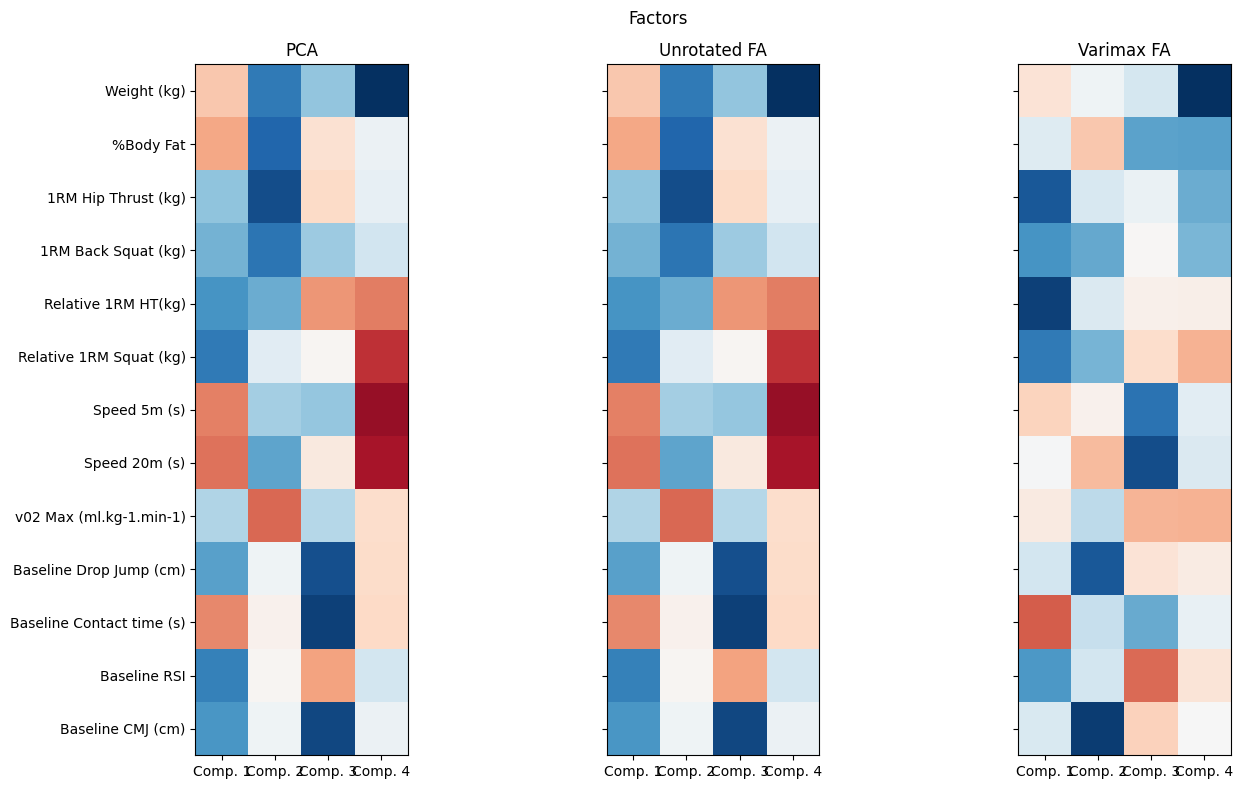

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

n_comps = 4

methods = [
    ("PCA", PCA(n_components=n_comps)),  # Exclude PCA method
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalyzer(n_factors=n_comps, rotation="varimax"))
]

fig, axes = plt.subplots(ncols=len(methods), figsize=(15, 8), sharey=True)

for ax, (method, model) in zip(axes, methods):
    model.fit(X_scaled)  # Supondo que X_scaled seja o seu conjunto de dados padronizado

    if method == "PCA":
        components = model.components_.T
    elif method == "Varimax FA":
        components = model.loadings_

    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks(np.arange(n_comps))
    ax.set_xticklabels(["Comp. {}".format(i+1) for i in range(n_comps)])

fig.suptitle("Factors")
plt.tight_layout()
plt.savefig('factors_PCA_Varimax.png', dpi=300, bbox_inches='tight')
plt.show()

The Varimax-rotated factor analysis reveals four distinct factors underlying the relationships between the variables in the dataset:

**Factor 1**: Strength: This factor is primarily characterized by high positive loadings on variables related to body composition (Weight (kg), %Body Fat) and measures of strength (1RM Hip Thrust (kg), Relative 1RM HT(kg), Relative 1RM Squat (kg)). This suggests that individuals with higher scores on this factor tend to have greater body mass and strength.

**Factor 2**: Lower Body Power and Explosiveness: This factor is dominated by high positive loadings on Baseline Drop Jump (cm) and Baseline CMJ (cm), both of which are measures of lower body power and explosiveness. Individuals with higher scores on this factor likely possess greater jumping ability and explosive strength in their lower body.

**Factor 3**: Speed and Agility: This factor is defined by high positive loadings on Speed 5m (s) and Speed 20m (s), indicating that individuals with higher scores on this factor are faster and more agile.

**Factor 4**: This factor has a high positive loading on Weight (kg), and %Body Fat.

These interpretations provide insights into the underlying structure of the data and how the variables relate to each other. Each factor represents a distinct dimension of physical fitness, and individuals can be characterized by their scores on these factors.

## **Cumulative Explained Variance**

This section visualizes the cumulative explained variance ratio for the principal components. It shows how much of the total variance in the data is captured by increasing the number of components. This information helps assess the trade-off between dimensionality reduction and information retention.

In [ ]:
#making the pca
from sklearn.decomposition import PCA
pca = PCA(n_components=13,svd_solver="full")
pca.fit(X_scaled)
#taking the explained variance (eigenvalue) for each component
variance=pca.explained_variance_
#explained variance ratio
variance_ratio=(pca.explained_variance_ratio_)*100
#cumulative explained variance ratio
cum=np.cumsum(variance_ratio)
#bulding a dataframe
names=df_filtered.columns
table=pd.DataFrame({'Variable name':names,'Eigenvalue':variance,'% of explained variance ratio':variance_ratio,'% of cumulative explained variance ratio':cum})
print(table)

                Variable name  Eigenvalue  % of explained variance ratio  \
0                 Weight (kg)    4.988160                      37.434597   
1                   %Body Fat    3.007754                      22.572264   
2         1RM Hip Thrust (kg)    1.793097                      13.456639   
3         1RM Back Squat (kg)    1.111134                       8.338720   
4         Relative 1RM HT(kg)    0.770082                       5.779228   
5     Relative 1RM Squat (kg)    0.712413                       5.346438   
6                Speed 5m (s)    0.342056                       2.567023   
7               Speed 20m (s)    0.289439                       2.172153   
8     v02 Max (ml.kg-1.min-1)    0.158427                       1.188948   
9     Baseline Drop Jump (cm)    0.093528                       0.701900   
10  Baseline Contact time (s)    0.051100                       0.383488   
11               Baseline RSI    0.006890                       0.051709   
12          

Let's make the <b> scree plot </b> that is another way of judging which components it would be good to choose! We can see that after the components 3-4 the added value of each component increases but with lower degree.

In [ ]:
X_projected = pca.transform(data_new)
print (X_projected.shape)

(41, 13)


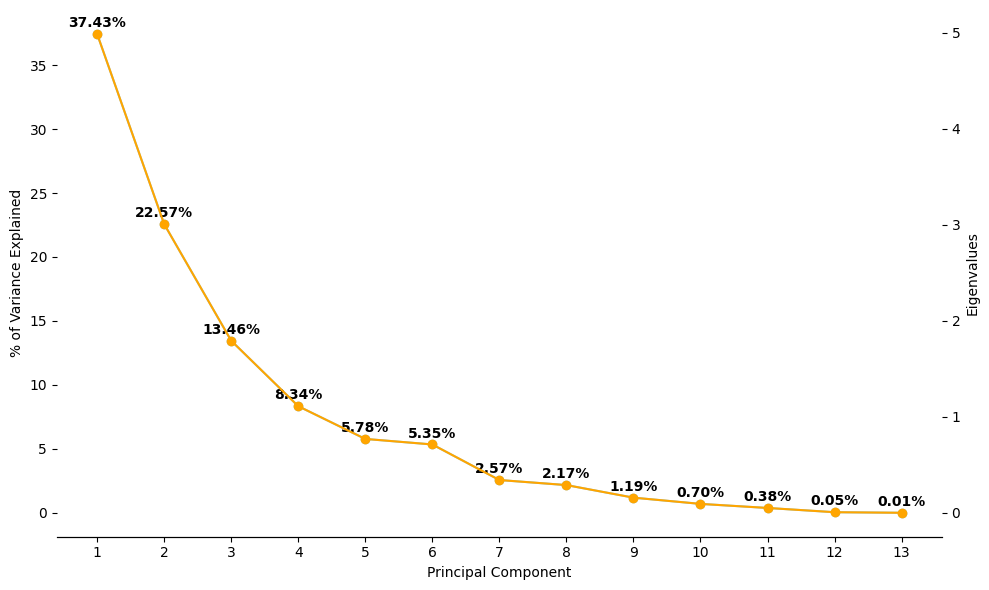

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Explained variance obtained from your code
explained_variance = variance_ratio
eigenvalues = variance

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot percentage of variance explained
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='skyblue', label='% Variance Explained')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('% of Variance Explained', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.legend(loc='upper left')

# Plot eigenvalues on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='orange', label='Eigenvalues')
ax2.set_ylabel('Eigenvalues', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# ax2.legend(loc='upper right')

# Annotate explained variance points
for i, var in enumerate(explained_variance):
    ax1.annotate(f'{var:.2f}%', (i + 1, var), textcoords="offset points", xytext=(0, 5), ha='center', fontweight='bold')

# Set x-axis ticks and labels for every component
ax1.set_xticks(np.arange(1, len(explained_variance) + 1))
ax1.set_xticklabels(np.arange(1, len(explained_variance) + 1))

#plt.title('Scree Plot')
plt.tight_layout()
sns.despine(left=True)
sns.axes_style("whitegrid")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# **Ranking Perception Prediction: Data Preprocessing and Model Training**

The code starts by creating a binary target variable (Reviews_Perc) based on the Ranking_PERC column. Values between 1 and 21 are labeled as '0' (top 20), and values between 22 and 41 are labeled as '1' (next 20).

The PCA-transformed data (X_projected) is used as the feature set.
The data is split into training and testing sets using a 75%/25% split.

In [ ]:
import pandas as pd

# Define the bin edges
bin_edges = [0, 21, 41]  # 0-20 (top 20), 21-40 (next 20)

# Define the bin labels
bin_labels = ['top_20', 'next_20']

# Use the cut function to create categorical labels
reviews = data['Reviews_Perc'] = pd.cut(data['Ranking_PERC'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [ ]:
data

Age  Weight (kg)  %Body Fat  1RM Hip Thrust (kg)  1RM Back Squat (kg)  \
0    22         82.7        8.8                125.0                125.0   
1    18         84.0       18.0                120.0                110.0   
2    20         72.8       12.3                105.0                 95.0   
3    30         82.0       11.9                 95.0                100.0   
4    27         70.1       14.0                105.0                105.0   
5    25         79.0       11.0                110.0                 90.0   
6    31         90.0       16.2                120.0                112.5   
7    27         92.5       18.0                140.0                100.0   
8    22         81.8       12.7                115.0                105.0   
9    23         90.8       28.4                120.0                100.0   
10   35         91.0       16.5                110.0                 95.0   
11   18         81.0       10.9                105.0                 90.0   
12   26         73.5       10.3                110.0                105.0   
13   18         76.0       18.3                 95.0                 85.0   
14   22         84.5       14.7                100.0                 95.0   
15   27         88.4       11.2                115.0                100.0   
16   27         74.8       17.0                120.0                 97.5   
17   28         87.2       15.6                175.0                130.0   
18   19         63.5       13.2                 87.5                 80.0   
19   20         84.7       17.1                150.0                115.0   
20   22         79.6       17.6                150.0                105.0   
21   24         87.4        9.9                135.0                120.0   
22   22         70.2       15.0                170.0                105.0   
23   20         83.9       12.8                140.0                112.5   
24   19         60.1        6.5                110.0                 80.0   
25   22         91.7       21.7                215.0                135.0   
26   23         94.6       15.5                175.0                125.0   
27   22         80.7       14.2                130.0                120.0   
28   20         83.2       13.6                125.0                102.5   
29   20         61.9        9.7                125.0                105.0   
30   19         78.5       15.5                165.0                115.0   
31   30         89.7       15.3                140.0                112.5   
32   20         77.0       12.7                155.0                122.5   
33   21         76.1       14.9                140.0                 90.0   
34   22         73.4       17.2                100.0                 95.0   
35   20        103.4       31.8                160.0                110.0   
36   21         72.2       18.0                135.0                107.5   
37   22         88.5       19.3                185.0                142.5   
38   29         83.2       11.4                145.0                115.0   
39   22         79.2       11.0                120.0                110.0   
40   28         66.8        9.8                155.0                117.5   

    Relative 1RM HT(kg)  Relative 1RM Squat (kg)  Speed 5m (s)  Speed 20m (s)  \
0                  1.51                     1.51          1.09           3.06   
1                  1.43                     1.31          1.16           3.19   
2                  1.44                     1.30          1.09           3.07   
3                  1.16                     1.22          1.05           3.04   
4                  1.50                     1.50          1.25           3.11   
5                  1.39                     1.14          1.12           3.17   
6                  1.33                     1.25          1.14           3.16   
7                  1.51                     1.08          1.15           3.19   
8                  1.41                 

In [ ]:
reviews = []
for i in data['Ranking_PERC']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_Perc'] = reviews

In [ ]:
reviews

['0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0']

In [ ]:
print(X_projected.shape)

(41, 13)


In [ ]:
y = data['Reviews_Perc']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_projected, y, test_size = 0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
!pip install imbalanced-learn

## Balancing Method

### Number of New Samples Generated

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import numpy as np

x_train_full, x_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_full, y_train_full)

# Print the number of new samples generated by SMOTE
print(f"Original training data shape: {x_train_full.shape[0]} samples, {x_train_full.shape[1]} features")
print(f"Resampled training data shape: {X_resampled.shape[0]} samples, {X_resampled.shape[1]} features")
print(f"Number of new samples generated by SMOTE: {X_resampled.shape[0] - x_train_full.shape[0]}")
print(f"Percentage increase in data points: {(X_resampled.shape[0] - x_train_full.shape[0]) / x_train_full.shape[0] * 100:.2f}%")

adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(x_train_full, y_train_full)

# Calculate the number of minority class samples needed to reach the desired ratio
minority_class_samples = 8

# Select the desired number of minority class samples
minority_class_indices = np.where(y_resampled_adasyn == 1)[0]
selected_minority_class_indices = np.random.choice(minority_class_indices, size=minority_class_samples, replace=True)

# Create the final resampled dataset
X_resampled_adasyn_final = np.concatenate((x_train_full, X_resampled_adasyn[selected_minority_class_indices]))
y_resampled_adasyn_final = np.concatenate((y_train_full, y_resampled_adasyn[selected_minority_class_indices]))

# Print the number of new samples generated by ADASYN
print(f"Original training data shape: {x_train_full.shape[0]} samples, {x_train_full.shape[1]} features")
print(f"Resampled training data shape: {X_resampled_adasyn_final.shape[0]} samples, {X_resampled_adasyn_final.shape[1]} features")
print(f"Number of new samples generated by ADASYN: {X_resampled_adasyn_final.shape[0] - x_train_full.shape[0]}")
print(f"Percentage increase in data points: {(X_resampled_adasyn_final.shape[0] - x_train_full.shape[0]) / x_train_full.shape[0] * 100:.2f}%")

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(x_train_full, y_train_full)

# Print the number of new samples generated by ROS
print(f"Original training data shape: {x_train_full.shape[0]} samples, {x_train_full.shape[1]} features")
print(f"Resampled training data shape: {X_resampled_ros.shape[0]} samples, {X_resampled_ros.shape[1]} features")
print(f"Number of new samples generated by ROS: {X_resampled_ros.shape[0] - x_train_full.shape[0]}")
print(f"Percentage increase in data points: {(X_resampled_ros.shape[0] - x_train_full.shape[0]) / x_train_full.shape[0] * 100:.2f}%")

Original training data shape: 30 samples, 13 features
Resampled training data shape: 38 samples, 13 features
Number of new samples generated by SMOTE: 8
Percentage increase in data points: 26.67%
Original training data shape: 30 samples, 13 features
Resampled training data shape: 38 samples, 13 features
Number of new samples generated by ADASYN: 8
Percentage increase in data points: 26.67%
Original training data shape: 30 samples, 13 features
Resampled training data shape: 38 samples, 13 features
Number of new samples generated by ROS: 8
Percentage increase in data points: 26.67%


## **Rose Balancing Method**

The code starts by encoding the target variable (y) into numerical format using LabelEncoder.

The data is split into training and testing sets, with 25% reserved for testing.

Several classifier models are initialized: Random Forest, Naive Bayes, SVM, AdaBoost, and XGBoost.

Random Over-Sampling (ROSE) is applied to the training data. This technique generates synthetic samples of the minority class to balance the class distribution, addressing the issue of imbalanced data.

**Explanation**:

The code iterates through each classifier model.
Each model is trained on the **oversampled data** (***x_resampled, y_resampled***).

The model is used to predict the target variable for the test set (x_test).
Model performance is evaluated using various metrics (**accuracy, precision, recall, F1-score**) and a **confusion matrix** is printed.

For the Random Forest model specifically:
**Feature importances** are calculated and displayed.
A horizontal bar plot is created to visualize the relative importance of each feature in the model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Set a random seed for reproducibility
RANDOM_SEED = 42

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into 80% training and 20% testing
x_train_full, x_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.2, random_state=RANDOM_SEED)

# Further split the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=RANDOM_SEED)

# Initialize classifiers with random_state
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=RANDOM_SEED),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_SEED),
    'XGBoost': XGBClassifier(random_state=RANDOM_SEED)
}

# Initialize 5-fold cross-validation within the training set
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# To store overall metrics and confusion matrices
metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'conf_matrix': []} for name in classifiers.keys()}

# Cross-validation loop on the training set
for train_index, val_index in kf.split(x_train):
    x_train_kf, x_val_kf = x_train[train_index], x_train[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

    # Apply oversampling to the training fold
    ros = RandomOverSampler(random_state=RANDOM_SEED)
    x_resampled, y_resampled = ros.fit_resample(x_train_kf, y_train_kf)

    # Train and evaluate classifiers on validation fold
    for name, clf in classifiers.items():
        clf.fit(x_resampled, y_resampled)
        y_pred = clf.predict(x_val_kf)

        # Calculate metrics
        acc = accuracy_score(y_val_kf, y_pred)
        precision = precision_score(y_val_kf, y_pred, pos_label=1)
        recall = recall_score(y_val_kf, y_pred, pos_label=1)
        f1 = f1_score(y_val_kf, y_pred, pos_label=1)
        conf_matrix = confusion_matrix(y_val_kf, y_pred)

        # Store metrics
        metrics[name]['accuracy'].append(acc)
        metrics[name]['precision'].append(precision)
        metrics[name]['recall'].append(recall)
        metrics[name]['f1'].append(f1)
        metrics[name]['conf_matrix'].append(conf_matrix)

# Print the average results for each classifier on the validation set
for name in classifiers.keys():
    print(f"\nClassifier: {name}")
    print(f"Average Validation Accuracy: {np.mean(metrics[name]['accuracy'])}")
    print(f"Average Validation Precision: {np.mean(metrics[name]['precision'])}")
    print(f"Average Validation Recall: {np.mean(metrics[name]['recall'])}")
    print(f"Average Validation F1-score: {np.mean(metrics[name]['f1'])}")


# Final evaluation on the test set
print("\nFinal evaluation on the test set:")
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)  # Train on the full training set
    y_pred_test = clf.predict(x_test)

    # Calculate metrics on the test set
    acc_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, pos_label=1)
    recall_test = recall_score(y_test, y_pred_test, pos_label=1)
    f1_test = f1_score(y_test, y_pred_test, pos_label=1)
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    # Print test set metrics
    print(f"\nClassifier: {name}")
    print(f"Test Accuracy: {acc_test}")
    print(f"Test Precision: {precision_test}")
    print(f"Test Recall: {recall_test}")
    print(f"Test F1-score: {f1_test}")
    print(f"Test Confusion Matrix:\n{conf_matrix_test}")




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: 


Classifier: Random Forest
Average Validation Accuracy: 0.52
Average Validation Precision: 0.2
Average Validation Recall: 0.06666666666666667
Average Validation F1-score: 0.1

Classifier: Naive Bayes
Average Validation Accuracy: 0.4800000000000001
Average Validation Precision: 0.26666666666666666
Average Validation Recall: 0.16666666666666666
Average Validation F1-score: 0.18

Classifier: SVM
Average Validation Accuracy: 0.68
Average Validation Precision: 0.6333333333333333
Average Validation Recall: 0.5666666666666667
Average Validation F1-score: 0.5599999999999999

Classifier: AdaBoost
Average Validation Accuracy: 0.44000000000000006
Average Validation Precision: 0.2
Average Validation Recall: 0.06666666666666667
Average Validation F1-score: 0.1

Classifier: XGBoost
Average Validation Accuracy: 0.6
Average Validation Precision: 0.45
Average Validation Recall: 0.4
Average Validation F1-score: 0.40476190476190477

Final evaluation on the test set:

Classifier: Random Forest
Test Accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Hyper-parameter Tuning with Cross-Validation
Steps:


### KFOLD = 5

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.4866666666666667
Validation Accuracy: 0.3333333333333333
Validation Precision: 0.4666666666666667
Validation Recall: 0.3333333333333333
Validation F1-score: 0.3888888888888889
Validation Confusion Matrix:
[[3 4]
 [2 0]]
Test Accuracy: 0.7272727272727273
Test Precision: 0.8295454545454546
Test Recall: 0.7272727272727273
Test F1-score: 0.7132867132867133
Test Confusion Matrix:
[[3 3]
 [0 5]]


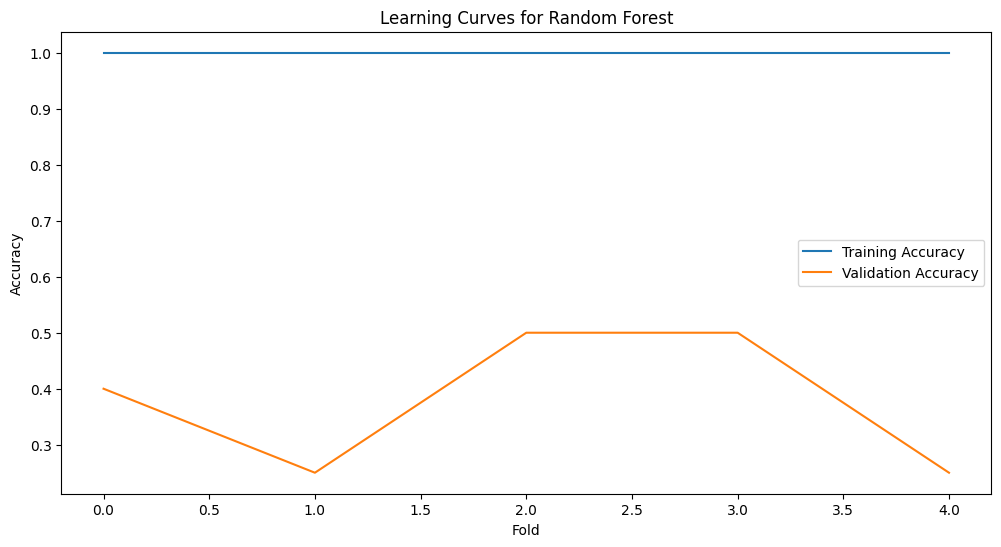

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.6380952380952382
Validation Accuracy: 0.6666666666666666
Validation Precision: 0.8666666666666667
Validation Recall: 0.6666666666666666
Validation F1-score: 0.6926406926406927
Validation Confusion Matrix:
[[4 3]
 [0 2]]
Test Accuracy: 0.6363636363636364
Test Precision: 0.6688311688311688
Test Recall: 0.6363636363636364
Test F1-score: 0.6303030303030303
Test Confusion Matrix:
[[3 3]
 [1 4]]


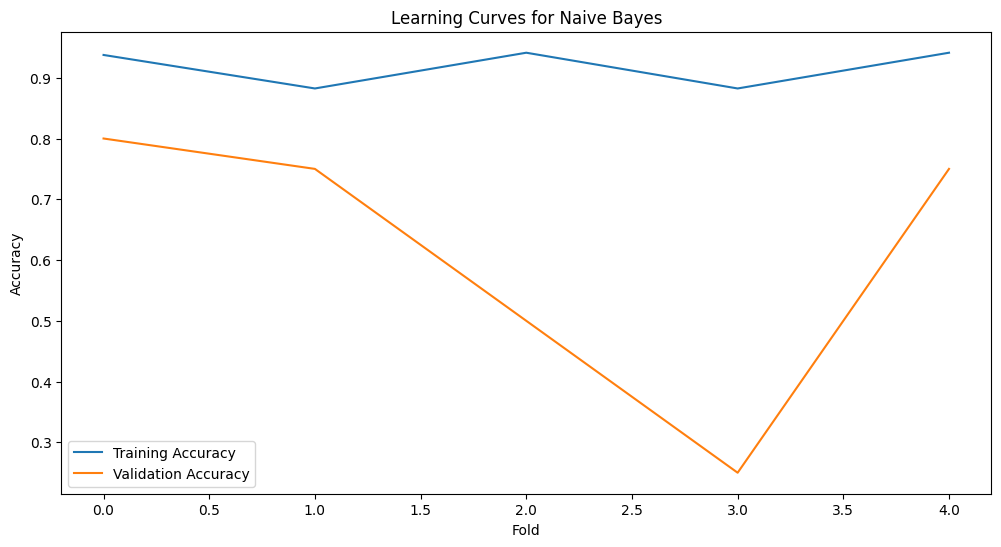

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.76
Validation Accuracy: 0.4444444444444444
Validation Precision: 0.5185185185185185
Validation Recall: 0.4444444444444444
Validation F1-score: 0.4786324786324787
Validation Confusion Matrix:
[[4 3]
 [2 0]]
Test Accuracy: 0.5454545454545454
Test Precision: 0.5545454545454546
Test Recall: 0.5454545454545454
Test F1-score: 0.5454545454545454
Test Confusion Matrix:
[[3 3]
 [2 3]]


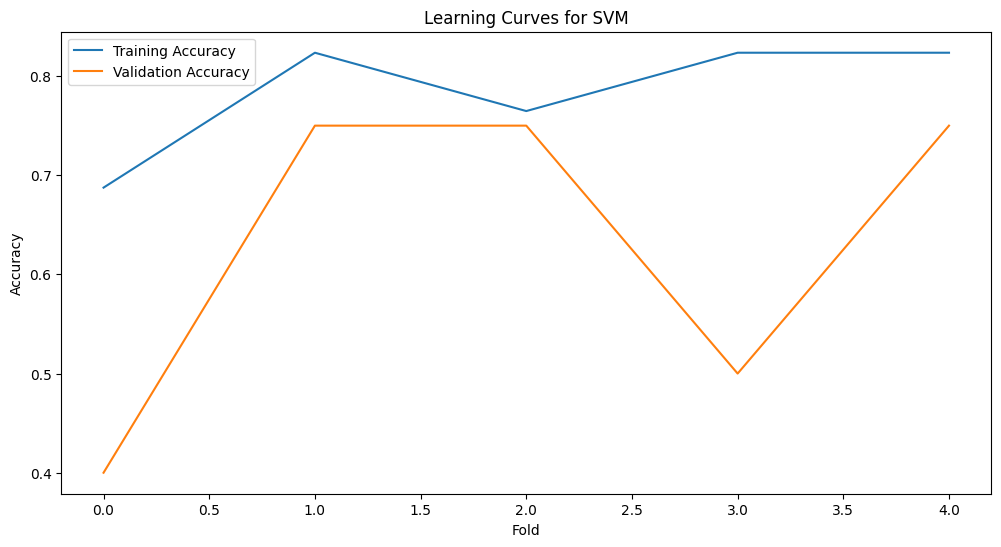

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classifier: AdaBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
Best F1 Score: 0.5580952380952382
Validation Accuracy: 0.4444444444444444
Validation Precision: 0.5185185185185185
Validation Recall: 0.4444444444444444
Validation F1-score: 0.4786324786324787
Validation Confusion Matrix:
[[4 3]
 [2 0]]
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[4 2]
 [2 3]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

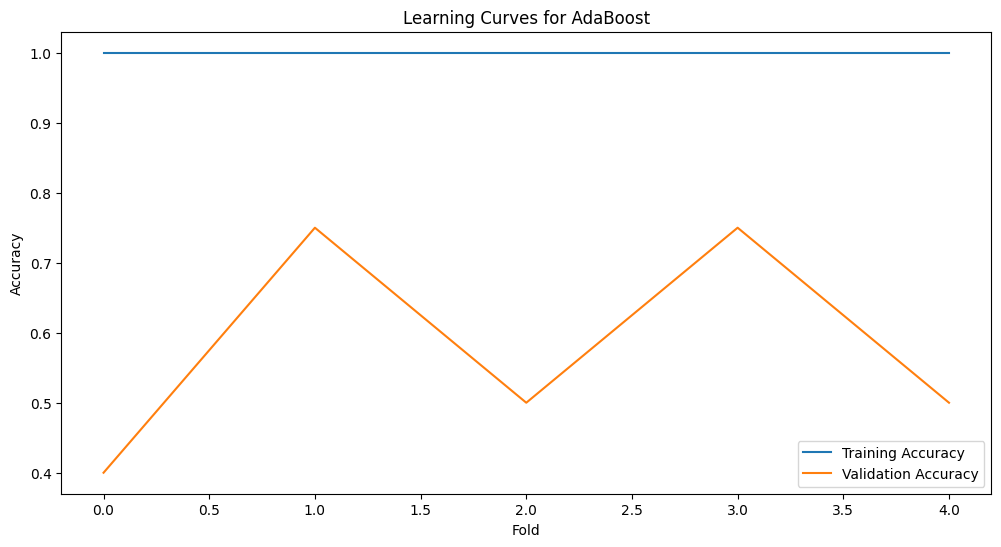

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.35333333333333333
Validation Accuracy: 0.4444444444444444
Validation Precision: 0.5185185185185185
Validation Recall: 0.4444444444444444
Validation F1-score: 0.4786324786324787
Validation Confusion Matrix:
[[4 3]
 [2 0]]
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[4 2]
 [2 3]]


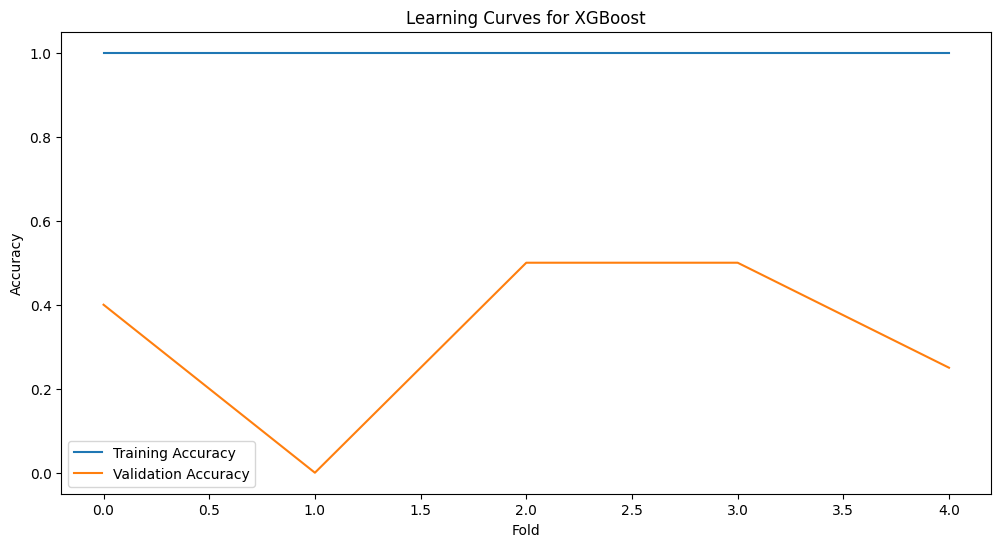

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Split the data
x_train_full, x_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=42)  # 20% validation

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=kf,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with KFold
        grid_search.fit(x_train, y_train)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Evaluate on the validation set
        y_val_pred = best_model.predict(x_val)
        acc_val = accuracy_score(y_val, y_val_pred)
        precision_val = precision_score(y_val, y_val_pred, average='weighted')
        recall_val = recall_score(y_val, y_val_pred, average='weighted')
        f1_val = f1_score(y_val, y_val_pred, average='weighted')
        conf_matrix_val = confusion_matrix(y_val, y_val_pred)

        print(f"Validation Accuracy: {acc_val}")
        print(f"Validation Precision: {precision_val}")
        print(f"Validation Recall: {recall_val}")
        print(f"Validation F1-score: {f1_val}")
        print(f"Validation Confusion Matrix:\n{conf_matrix_val}")

        # Final evaluation on the test set
        y_test_pred = best_model.predict(x_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

    else:
        # For classifiers without hyperparameter tuning
        model.fit(x_train, y_train)
        y_val_pred = model.predict(x_val)

        acc_val = accuracy_score(y_val, y_val_pred)
        precision_val = precision_score(y_val, y_val_pred, average='weighted')
        recall_val = recall_score(y_val, y_val_pred, average='weighted')
        f1_val = f1_score(y_val, y_val_pred, average='weighted')
        conf_matrix_val = confusion_matrix(y_val, y_val_pred)

        print(f"\nClassifier: {name}")
        print(f"Validation Accuracy: {acc_val}")
        print(f"Validation Precision: {precision_val}")
        print(f"Validation Recall: {recall_val}")
        print(f"Validation F1-score: {f1_val}")
        print(f"Validation Confusion Matrix:\n{conf_matrix_val}")

        # Final evaluation on the test set
        y_test_pred = model.predict(x_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

    # Plot learning curves
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in kf.split(x_train):
        X_train_cv, X_val_cv = x_train[train_index], x_train[val_index]
        y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

        model.fit(X_train_cv, y_train_cv)
        train_pred = model.predict(X_train_cv)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_train_cv, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    plt.figure(figsize=(12, 6))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves for {name}')
    plt.legend()
    plt.show()


### Leave-One-Out

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
!pip install shap



In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



ImportError: cannot import name 'joblib' from 'sklearn.externals' (/usr/local/lib/python3.10/dist-packages/sklearn/externals/__init__.py)

  0%|          | 0/11 [00:00<?, ?it/s]

SHAP values shape: (11, 13, 2)

Feature Importances using SHAP for Best AdaBoost Model:
                      Feature  Importance
0                 Weight (kg)    0.000055
1                   %Body Fat    0.000025
2         1RM Hip Thrust (kg)    0.055728
3         1RM Back Squat (kg)    0.308489
4         Relative 1RM HT(kg)    0.000032
5     Relative 1RM Squat (kg)    0.000038
6                Speed 5m (s)    0.000043
7               Speed 20m (s)    0.000021
8     v02 Max (ml.kg-1.min-1)    0.000016
9     Baseline Drop Jump (cm)    0.000024
10  Baseline Contact time (s)    0.075281
11               Baseline RSI    0.000025
12          Baseline CMJ (cm)    0.000021


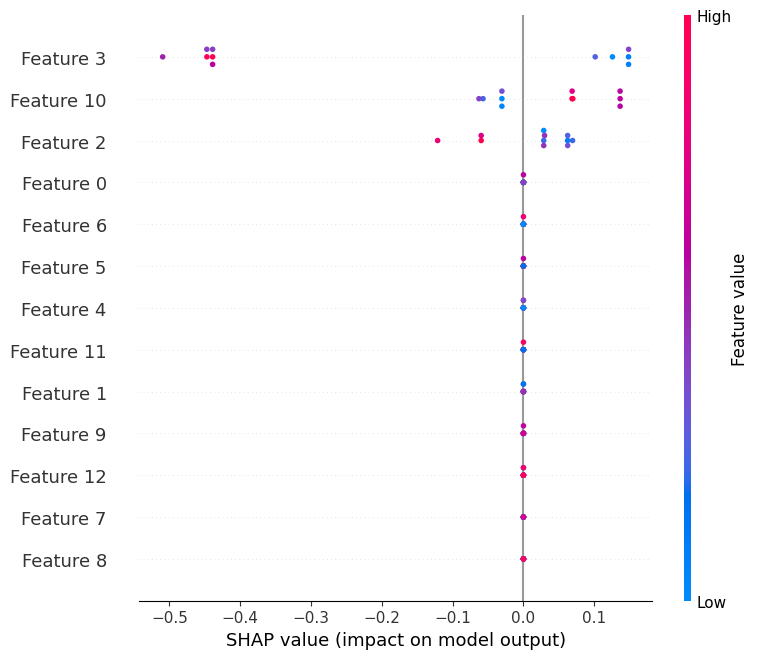

In [ ]:
import shap
import pandas as pd
import numpy as np

# Assuming best_model is the best AdaBoost model obtained from GridSearchCV
# and X_resampled_full is the resampled training data used for fitting best_model

# Define a function to get model predictions
def predict_fn(X):
    return best_model.predict_proba(X)

# Initialize SHAP Explainer
explainer = shap.KernelExplainer(predict_fn, X_resampled_full)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the shape of SHAP values for debugging
print(f"SHAP values shape: {shap_values.shape}")

# Check if SHAP values are a list (binary classification scenario)
if isinstance(shap_values, list):
    # Extract SHAP values for the positive class (usually the second class)
    shap_values_class = shap_values[1]
else:
    # If not a list, assume it's already for the positive class
    shap_values_class = shap_values

# Ensure SHAP values are 2D with shape (num_samples, num_features)
if shap_values_class.ndim == 3:
    # If 3D, handle the case appropriately
    shap_values_class = shap_values_class[:, :, 1]  # Select the SHAP values for the positive class if 3D
elif shap_values_class.ndim != 2:
    raise ValueError(f"Unexpected SHAP values shape: {shap_values_class.shape}")

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.mean(np.abs(shap_values_class), axis=0)

# Get feature names directly from the DataFrame
feature_names = df_filtered.columns.tolist()

# Ensure lengths match
if len(feature_names) != len(mean_shap_values):
    print(f"Length mismatch: feature_names ({len(feature_names)}) != mean_shap_values ({len(mean_shap_values)})")
    # Optionally handle the mismatch here

# Ensure 1D arrays
feature_names = np.array(feature_names).flatten()
mean_shap_values = np.array(mean_shap_values).flatten()

# Create a DataFrame to show feature importances
try:
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': mean_shap_values
    })
    # Print feature importances
    print("\nFeature Importances using SHAP for Best AdaBoost Model:")
    print(importance_df)
except ValueError as e:
    print(f"Error creating DataFrame: {e}")

# Plot SHAP summary plot
shap.summary_plot(shap_values_class, X_test)


### No Cross Validation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply ROSE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 0.6
Recall: 0.6
F1-score: 0.6
Confusion Matrix:
[[4 2]
 [2 3]]

Classifier: Naive Bayes
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 2]
 [1 4]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6
Recall: 0.6
F1-score: 0.6
Confusion Matrix:
[[4 2]
 [2 3]]

Classifier: AdaBoost
Accuracy: 0.8181818181818182
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999
Confusion Matrix:
[[6 0]
 [2 3]]

Classifier: XGBoost
Accuracy: 0.8181818181818182
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999
Confusion Matrix:
[[6 0]
 [2 3]]


Now, the **only difference** in the code below is that for the Random Forest (RF) model specifically, **Feature importances** are calculated and displayed, because **RF** is the the **best model** for ROSE balancing method.

Also, I made this feature importance plot only for  ROSE and Random Forrest combination because that was the best combination between all the possibilities.

**You will see this pattern in this code.**




Classifier: Random Forest
Accuracy: 0.7272727272727273
Precision: 0.75
Recall: 0.6
F1-score: 0.6666666666666665
Confusion Matrix:
[[5 1]
 [2 3]]

Variable Importance for Random Forest:
Feature 0: 0.0653535120744147
Feature 1: 0.08164320082103949
Feature 2: 0.12212485907565922
Feature 3: 0.13218582342779372
Feature 4: 0.08875149417966971
Feature 5: 0.06754693539505814
Feature 6: 0.061196316767012045
Feature 7: 0.044418934284868414
Feature 8: 0.054656972805407426
Feature 9: 0.04658343152007087
Feature 10: 0.12980527425029167
Feature 11: 0.045268682653562244
Feature 12: 0.06046456274515252


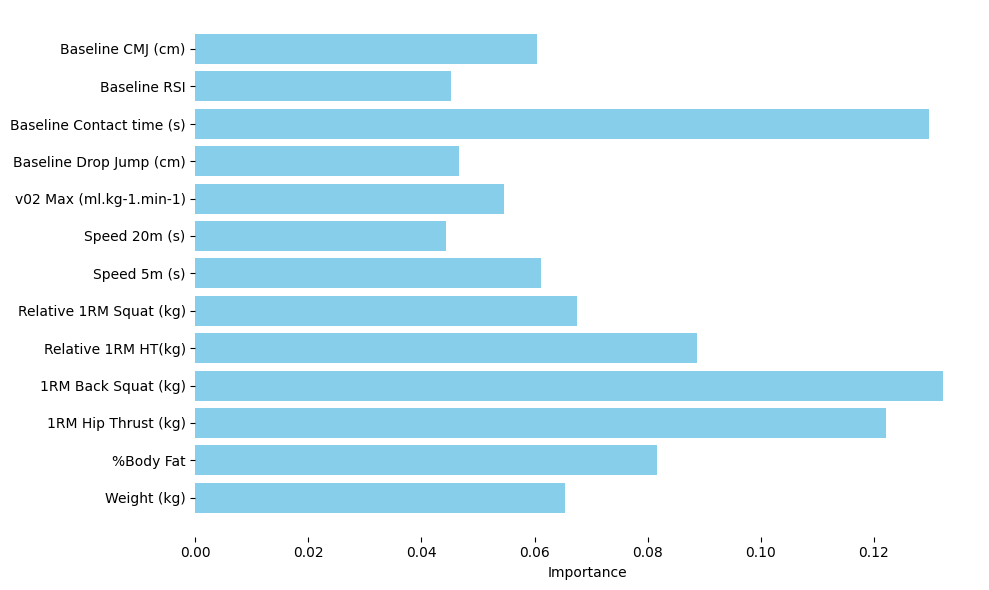


Classifier: Naive Bayes
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 2]
 [1 4]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6
Recall: 0.6
F1-score: 0.6
Confusion Matrix:
[[4 2]
 [2 3]]

Classifier: AdaBoost
Accuracy: 0.8181818181818182
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999
Confusion Matrix:
[[6 0]
 [2 3]]

Classifier: XGBoost
Accuracy: 0.8181818181818182
Precision: 1.0
Recall: 0.6
F1-score: 0.7499999999999999
Confusion Matrix:
[[6 0]
 [2 3]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'Random Forest':
        variable_importance = clf.feature_importances_
        print(f"\nVariable Importance for {name}:")
        for idx, importance in enumerate(variable_importance):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot variable importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, variable_importance, color='skyblue')
        plt.xlabel('Importance')
        #plt.ylabel('Feature')
        #plt.title('Variable Importance for Random Forest Classifier')

        # Add text annotations
        '''for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(variable_importance[idx], 2),
                     va='center', ha='left')'''

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()


## **SMOTE Balancing Method**

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

### Leave-One-Out

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_full, y_train_cv)

# Print the number of new samples generated by SMOTE
print(f"Original training data shape: {X_train_cv.shape[0]} samples, {X_train_cv.shape[1]} features")
print(f"Resampled training data shape: {X_resampled.shape[0]} samples, {X_resampled.shape[1]} features")
print(f"Number of new samples generated by SMOTE: {X_resampled.shape[0] - X_train_cv.shape[0]}")
print(f"Percentage increase in data points: {(X_resampled.shape[0] - X_train_cv.shape[0]) / X_train_cv.shape[0] * 100:.2f}%")

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.9090909090909091
Test Precision: 0.922077922077922
Test Recall: 0.9090909090909091
Test F1-score: 0.9075369075369075
Test Confusion Matrix:
[[6 0]
 [1 4]]


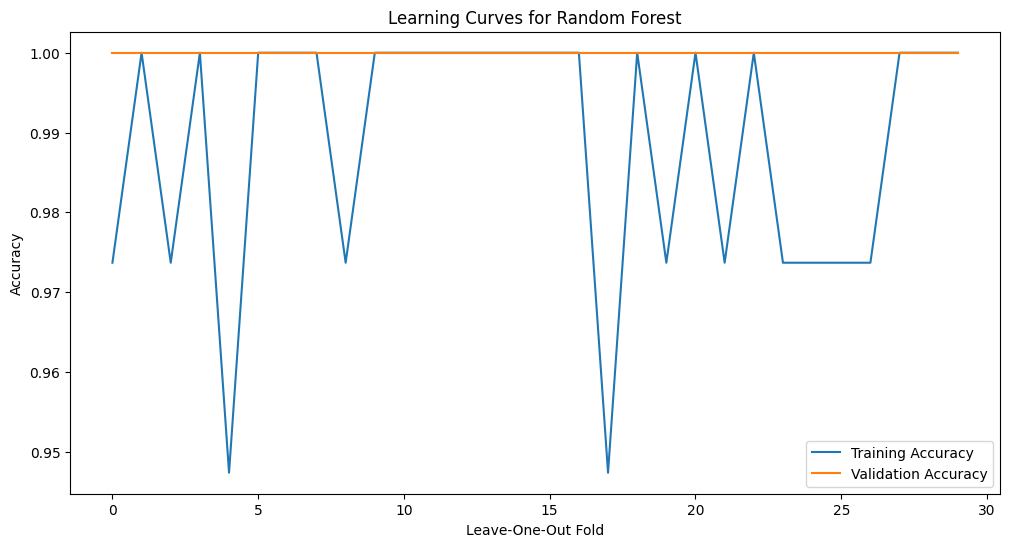

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727272
Test Confusion Matrix:
[[4 2]
 [1 4]]


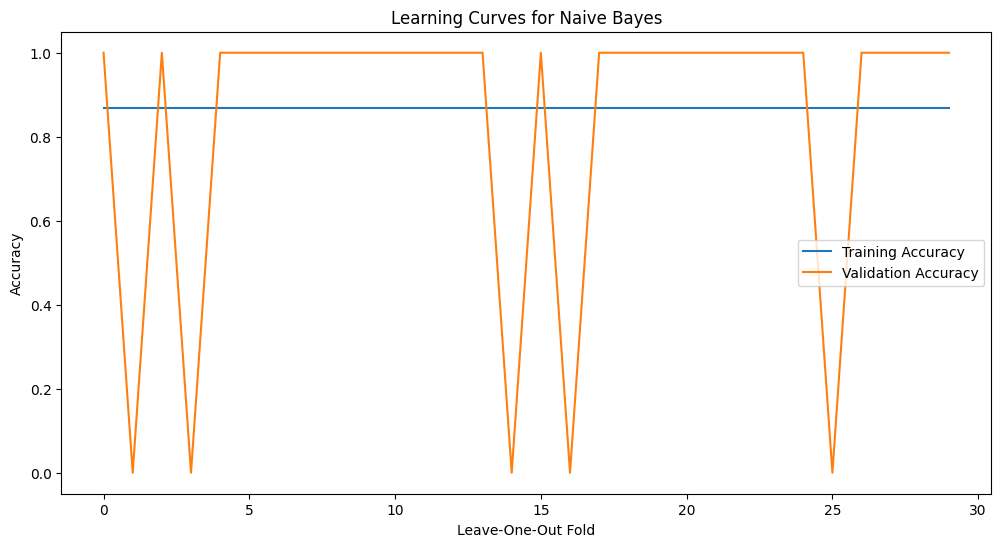

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.6363636363636364
Test Precision: 0.6688311688311688
Test Recall: 0.6363636363636364
Test F1-score: 0.6303030303030303
Test Confusion Matrix:
[[3 3]
 [1 4]]


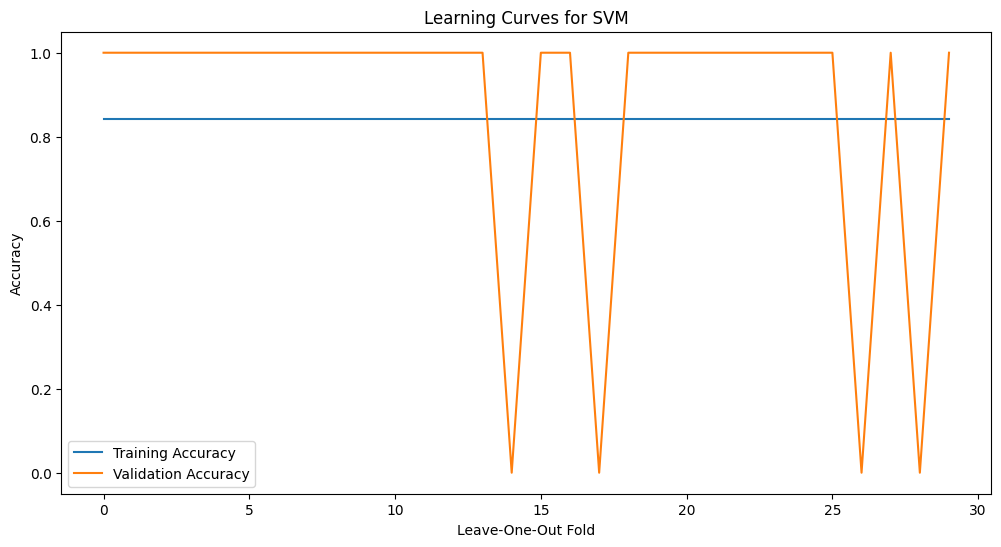

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.7272727272727273
Test Precision: 0.7305194805194805
Test Recall: 0.7272727272727273
Test F1-score: 0.7226107226107225
Test Confusion Matrix:
[[5 1]
 [2 3]]


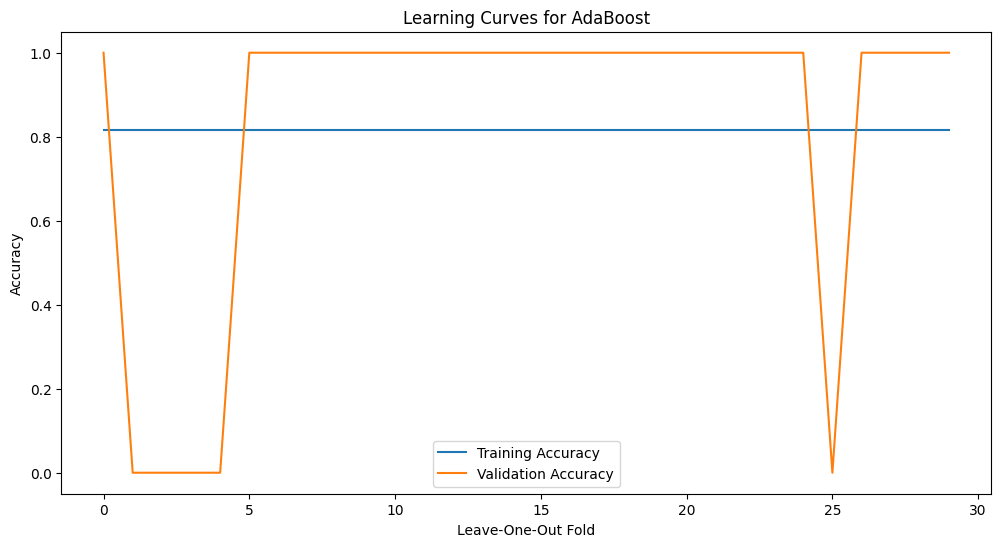

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.6666666666666666
Test Accuracy: 0.7272727272727273
Test Precision: 0.7305194805194805
Test Recall: 0.7272727272727273
Test F1-score: 0.7226107226107225
Test Confusion Matrix:
[[5 1]
 [2 3]]


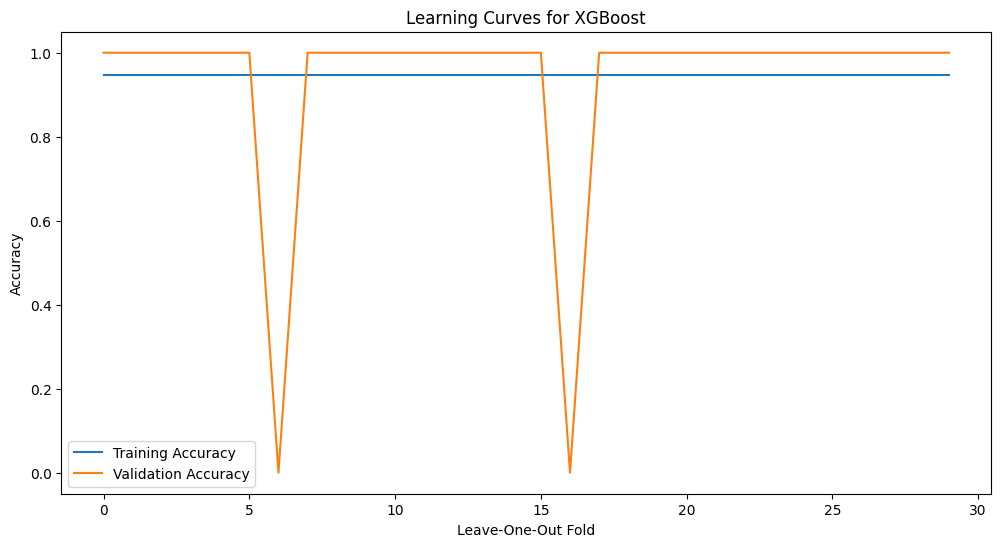

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

        model.fit(x_resampled, y_resampled)
        train_pred = model.predict(x_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply Smote to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



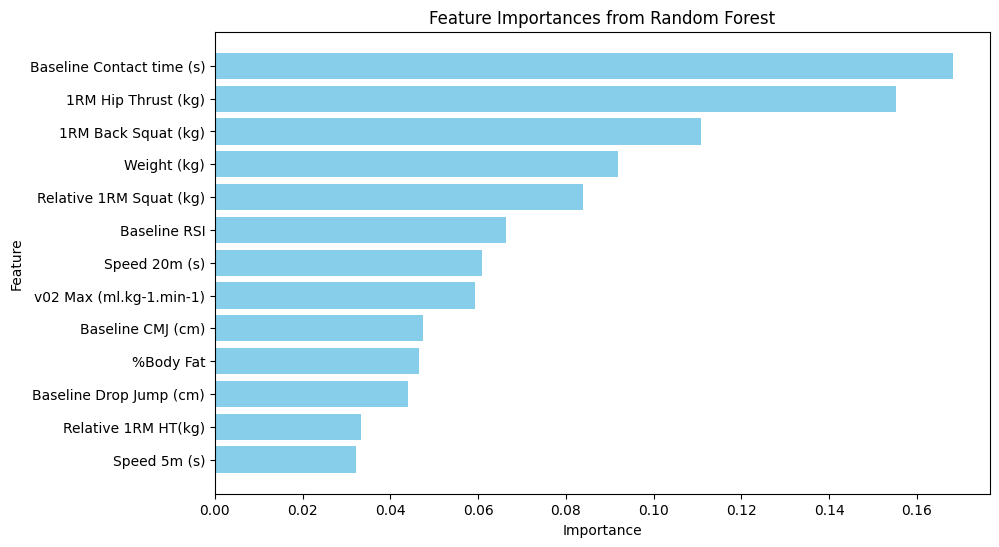

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris  # Example dataset, replace with your data

# Assuming the best model parameters from GridSearchCV
best_params = {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

# Initialize the Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)

# Fit the model to the entire training data (if you're using the entire dataset)
rf_best.fit(X_train_full, y_train_full)

# Extract feature importances
importances = rf_best.feature_importances_
features = df_filtered.columns  # Assuming X_train_full is a DataFrame

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.8181818181818182
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334
Confusion Matrix:
[[4 1]
 [1 5]]

Classifier: Naive Bayes
Accuracy: 0.7272727272727273
Precision: 0.8
Recall: 0.6666666666666666
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 1]
 [2 4]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 2]
 [2 4]]

Classifier: AdaBoost
Accuracy: 0.8181818181818182
Precision: 0.75
Recall: 1.0
F1-score: 0.8571428571428571
Confusion Matrix:
[[3 2]
 [0 6]]

Classifier: XGBoost
Accuracy: 0.7272727272727273
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692
Confusion Matrix:
[[3 2]
 [1 5]]


## **ADASYN Balacing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score: 0.6
Test Accuracy: 0.7272727272727273
Test Precision: 0.7305194805194805
Test Recall: 0.7272727272727273
Test F1-score: 0.7226107226107225
Test Confusion Matrix:
[[5 1]
 [2 3]]


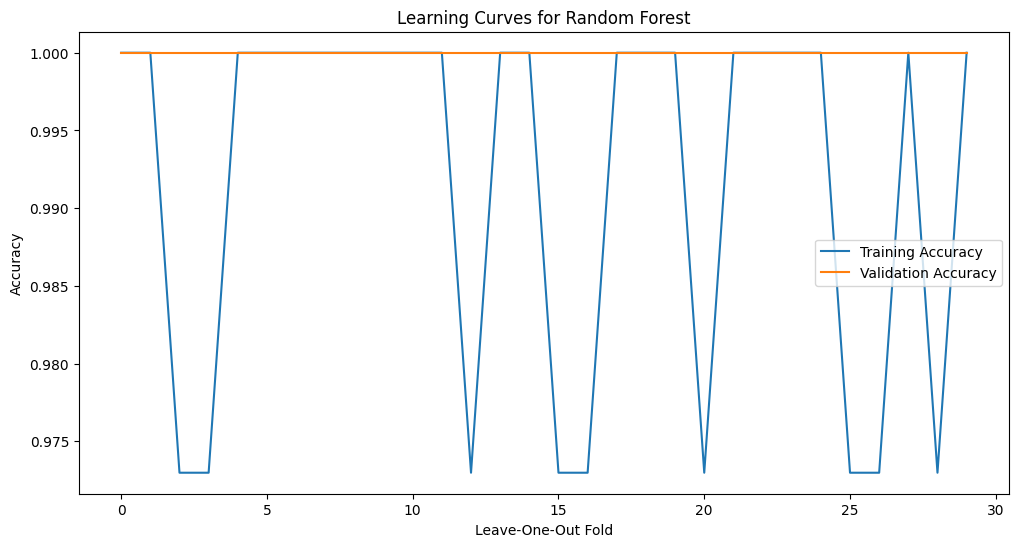

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727272
Test Confusion Matrix:
[[4 2]
 [1 4]]


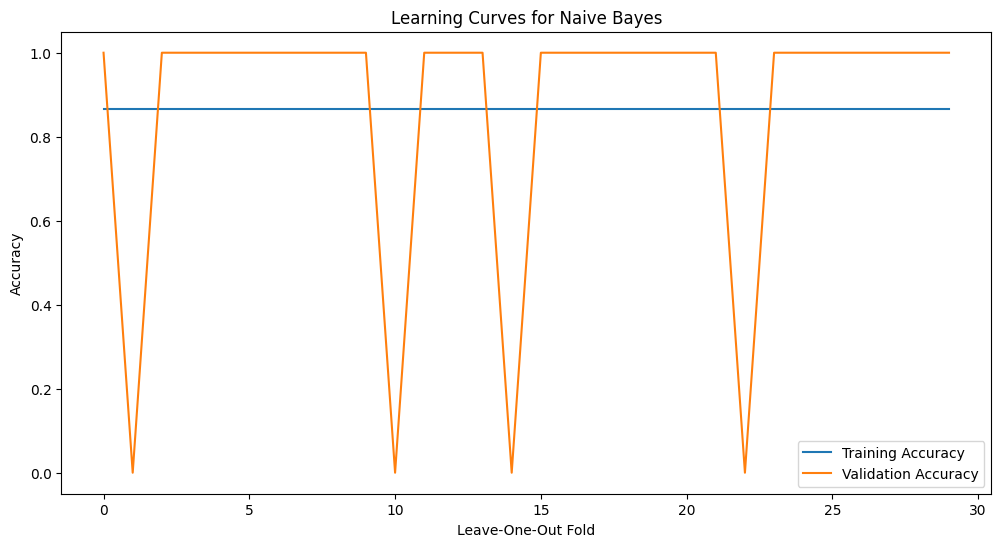

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.5454545454545454
Test Precision: 0.29752066115702475
Test Recall: 0.5454545454545454
Test F1-score: 0.38502673796791437
Test Confusion Matrix:
[[6 0]
 [5 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


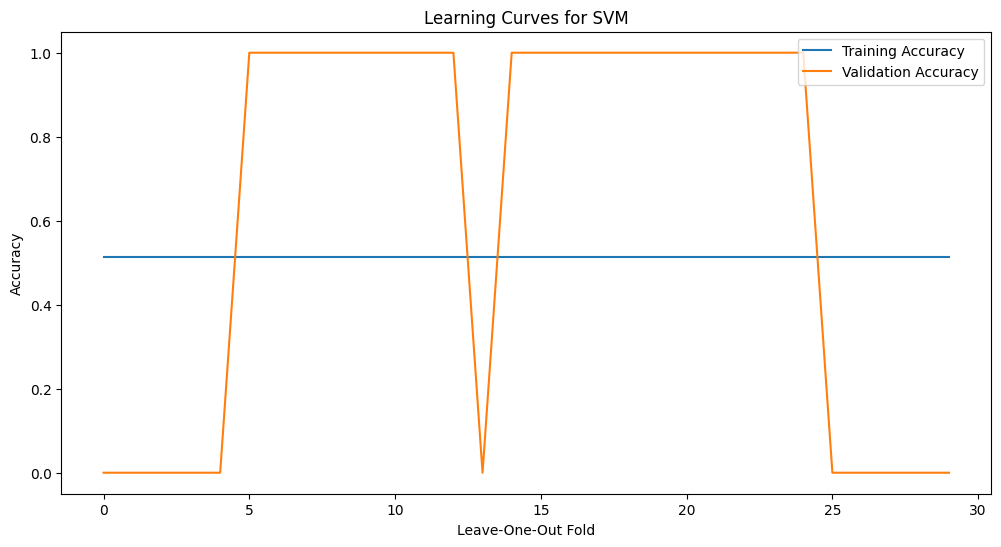

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.9090909090909091
Test Precision: 0.922077922077922
Test Recall: 0.9090909090909091
Test F1-score: 0.9075369075369075
Test Confusion Matrix:
[[6 0]
 [1 4]]


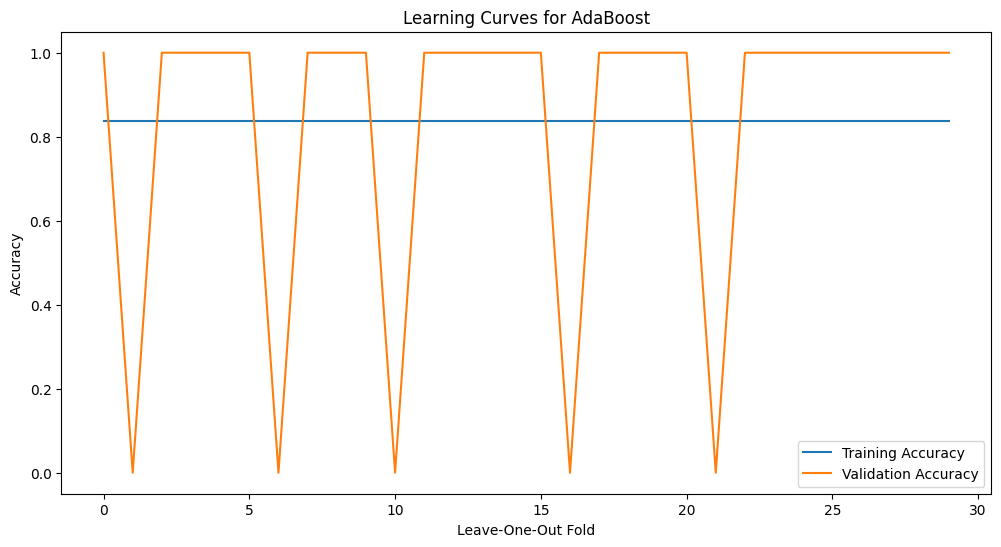

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.6666666666666666
Test Accuracy: 0.8181818181818182
Test Precision: 0.8636363636363636
Test Recall: 0.8181818181818182
Test F1-score: 0.8084415584415584
Test Confusion Matrix:
[[6 0]
 [2 3]]


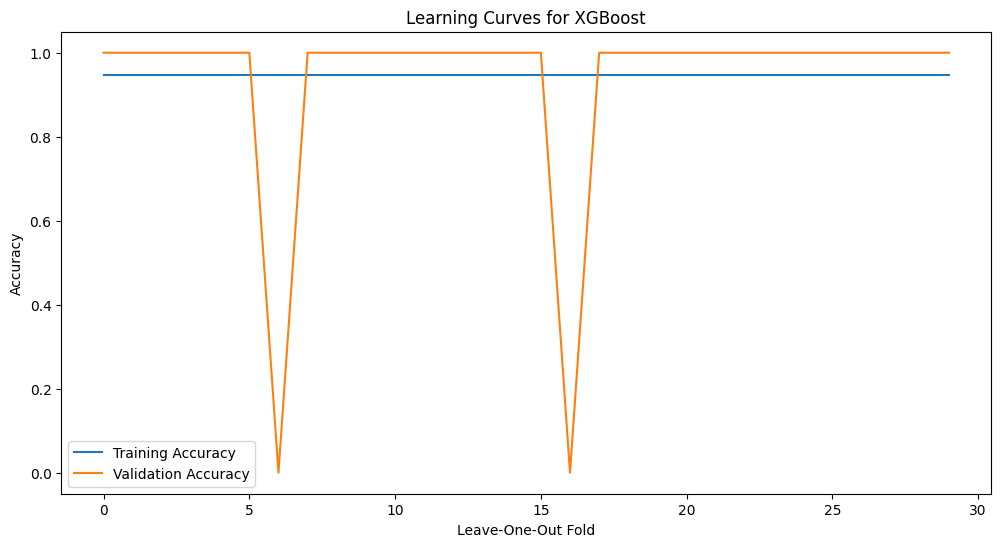

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ADASYN to training data
        adasyn = ADASYN(random_state=42)
        x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

        model.fit(x_resampled, y_resampled)
        train_pred = model.predict(x_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        adasyn = ADASYN(random_state=42)
        X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        adasyn = ADASYN(random_state=42)
        X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.7272727272727273
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692
Confusion Matrix:
[[3 2]
 [1 5]]

Classifier: Naive Bayes
Accuracy: 0.7272727272727273
Precision: 0.8
Recall: 0.6666666666666666
F1-score: 0.7272727272727272
Confusion Matrix:
[[4 1]
 [2 4]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 2]
 [3 3]]

Classifier: AdaBoost
Accuracy: 0.7272727272727273
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692
Confusion Matrix:
[[3 2]
 [1 5]]

Classifier: XGBoost
Accuracy: 0.7272727272727273
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1-score: 0.7692307692307692
Confusion Matrix:
[[3 2]
 [1 5]]


# **Ranking CK Prediction**

Here you can find the best combination for CK: **SMOTE and XGBoost**

In [ ]:
bin_edges = [0, 21, 41]  # Defining bins (0-20, 21-40)
bin_labels = ['top_20', 'next_20']

# Apply pd.cut to create the 'Reviews_CK' column
reviews2 = data['Reviews_CK'] = pd.cut(data['Ranking_CK'], bins=bin_edges, labels=bin_labels, include_lowest=True)



In [ ]:
data

Age  Weight (kg)  %Body Fat  1RM Hip Thrust (kg)  1RM Back Squat (kg)  \
0    22         82.7        8.8                125.0                125.0   
1    18         84.0       18.0                120.0                110.0   
2    20         72.8       12.3                105.0                 95.0   
3    30         82.0       11.9                 95.0                100.0   
4    27         70.1       14.0                105.0                105.0   
5    25         79.0       11.0                110.0                 90.0   
6    31         90.0       16.2                120.0                112.5   
7    27         92.5       18.0                140.0                100.0   
8    22         81.8       12.7                115.0                105.0   
9    23         90.8       28.4                120.0                100.0   
10   35         91.0       16.5                110.0                 95.0   
11   18         81.0       10.9                105.0                 90.0   
12   26         73.5       10.3                110.0                105.0   
13   18         76.0       18.3                 95.0                 85.0   
14   22         84.5       14.7                100.0                 95.0   
15   27         88.4       11.2                115.0                100.0   
16   27         74.8       17.0                120.0                 97.5   
17   28         87.2       15.6                175.0                130.0   
18   19         63.5       13.2                 87.5                 80.0   
19   20         84.7       17.1                150.0                115.0   
20   22         79.6       17.6                150.0                105.0   
21   24         87.4        9.9                135.0                120.0   
22   22         70.2       15.0                170.0                105.0   
23   20         83.9       12.8                140.0                112.5   
24   19         60.1        6.5                110.0                 80.0   
25   22         91.7       21.7                215.0                135.0   
26   23         94.6       15.5                175.0                125.0   
27   22         80.7       14.2                130.0                120.0   
28   20         83.2       13.6                125.0                102.5   
29   20         61.9        9.7                125.0                105.0   
30   19         78.5       15.5                165.0                115.0   
31   30         89.7       15.3                140.0                112.5   
32   20         77.0       12.7                155.0                122.5   
33   21         76.1       14.9                140.0                 90.0   
34   22         73.4       17.2                100.0                 95.0   
35   20        103.4       31.8                160.0                110.0   
36   21         72.2       18.0                135.0                107.5   
37   22         88.5       19.3                185.0                142.5   
38   29         83.2       11.4                145.0                115.0   
39   22         79.2       11.0                120.0                110.0   
40   28         66.8        9.8                155.0                117.5   

    Relative 1RM HT(kg)  Relative 1RM Squat (kg)  Speed 5m (s)  Speed 20m (s)  \
0                  1.51                     1.51          1.09           3.06   
1                  1.43                     1.31          1.16           3.19   
2                  1.44                     1.30          1.09           3.07   
3                  1.16                     1.22          1.05           3.04   
4                  1.50                     1.50          1.25           3.11   
5                  1.39                     1.14          1.12           3.17   
6                  1.33                     1.25          1.14           3.16   
7                  1.51                     1.08          1.15           3.19   
8                  1.41                 

In [ ]:
reviews = []
for i in data['Ranking_CK']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_CK'] = reviews

In [ ]:
y2 = data['Reviews_CK']


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 13)
(30,)
(11, 13)
(11,)


## **Rose Balancing Method**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.5
Test Accuracy: 0.9090909090909091
Test Precision: 0.9272727272727272
Test Recall: 0.9090909090909091
Test F1-score: 0.9106449106449106
Test Confusion Matrix:
[[6 1]
 [0 4]]


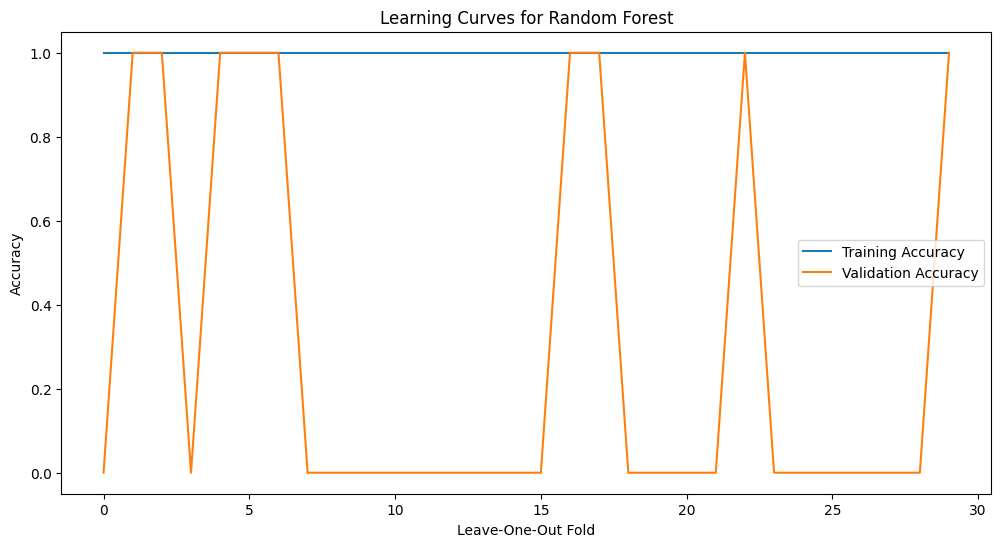

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.6
Test Accuracy: 0.5454545454545454
Test Precision: 0.6331168831168831
Test Recall: 0.5454545454545454
Test F1-score: 0.5454545454545454
Test Confusion Matrix:
[[3 4]
 [1 3]]


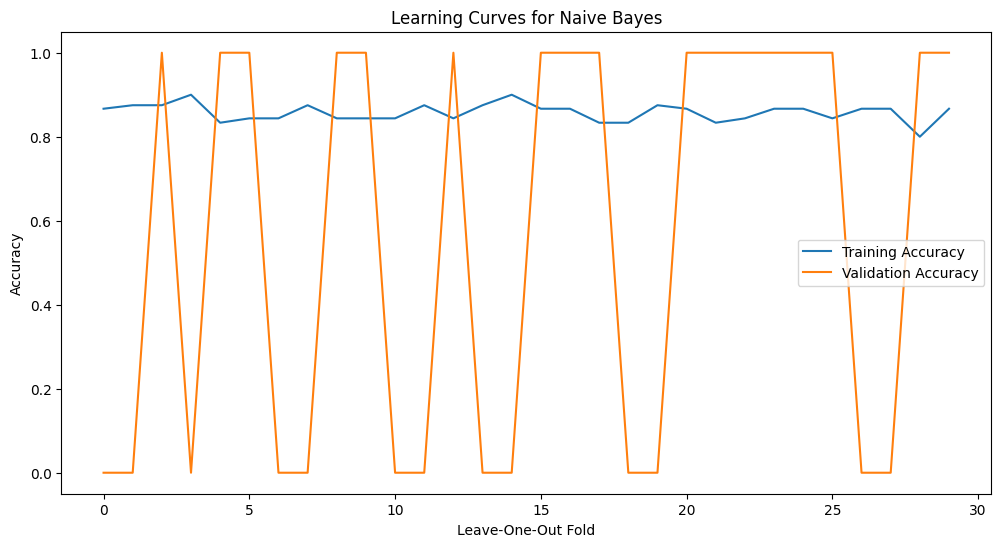

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.6363636363636364
Test Precision: 0.8181818181818182
Test Recall: 0.6363636363636364
Test F1-score: 0.6242424242424243
Test Confusion Matrix:
[[3 4]
 [0 4]]


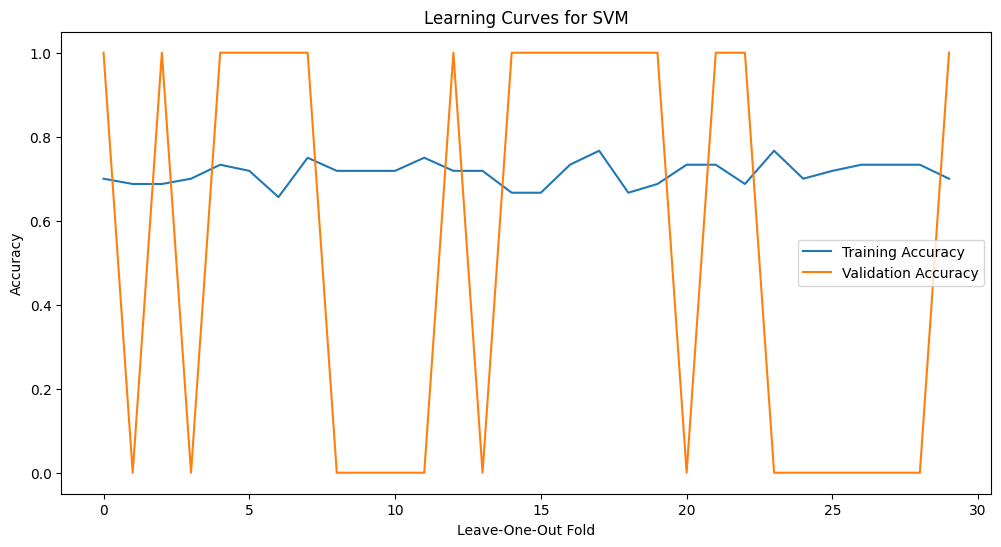

Fitting 30 folds for each of 12 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6
Confusion Matrix:
[[4 0]
 [4 3]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]


## **SMOTE Balancing Method**

Here you can find the best combination for CK: **SMOTE and XGBoost**

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.5454545454545454
Test Precision: 0.6331168831168831
Test Recall: 0.5454545454545454
Test F1-score: 0.5454545454545454
Test Confusion Matrix:
[[3 4]
 [1 3]]


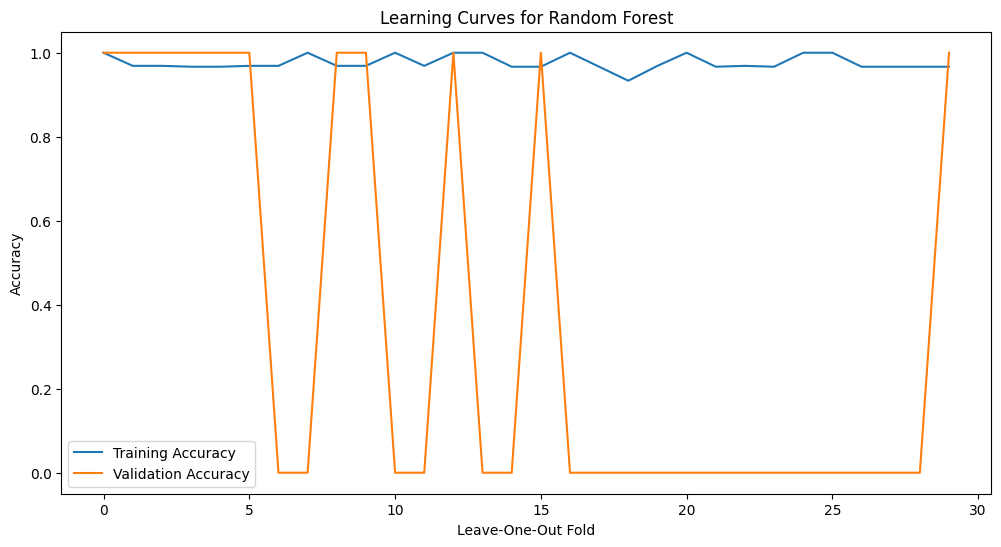

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.6363636363636364
Test Precision: 0.6909090909090909
Test Recall: 0.6363636363636364
Test F1-score: 0.6424242424242425
Test Confusion Matrix:
[[4 3]
 [1 3]]


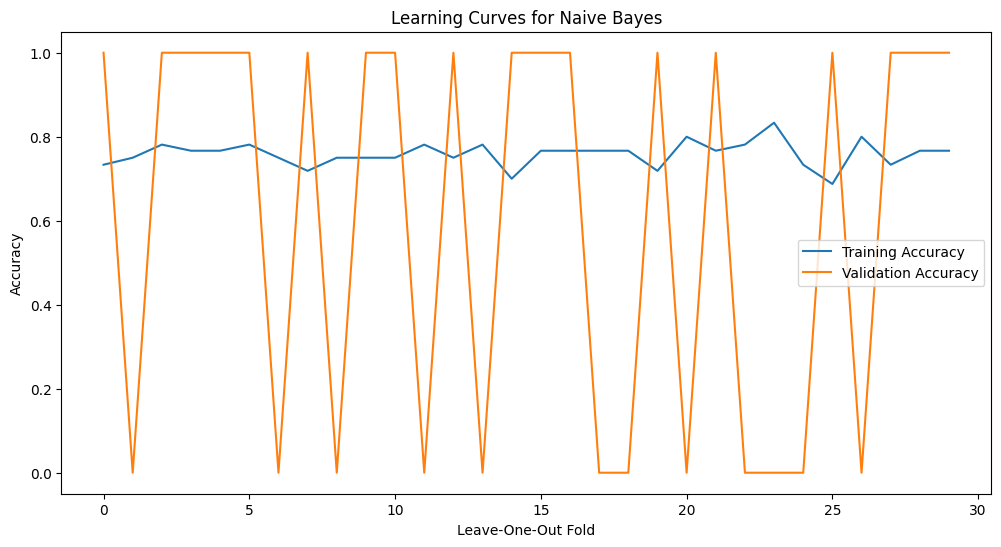

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.5454545454545454
Test Precision: 0.5696969696969696
Test Recall: 0.5454545454545454
Test F1-score: 0.5532245532245532
Test Confusion Matrix:
[[4 3]
 [2 2]]


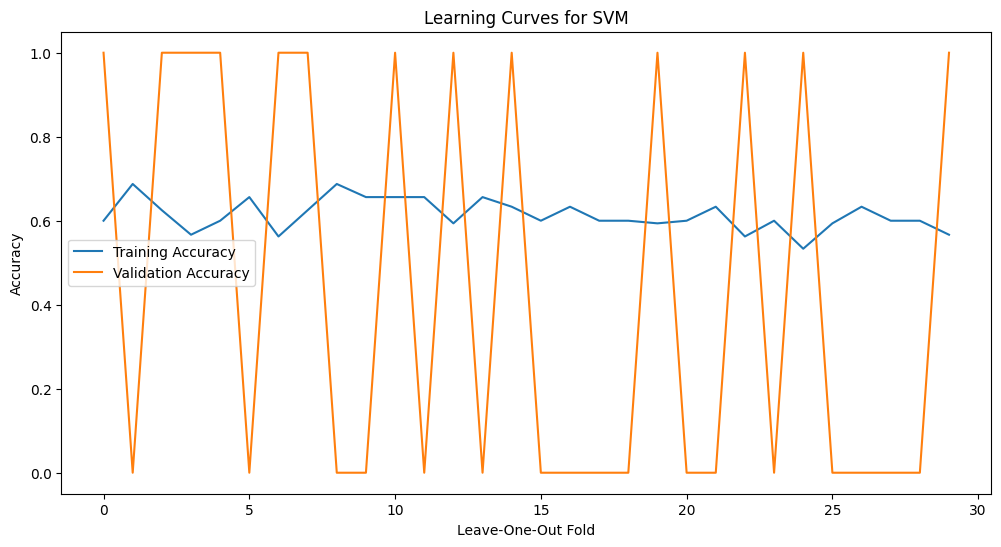

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.5454545454545454
Test Precision: 0.5696969696969696
Test Recall: 0.5454545454545454
Test F1-score: 0.5532245532245532
Test Confusion Matrix:
[[4 3]
 [2 2]]


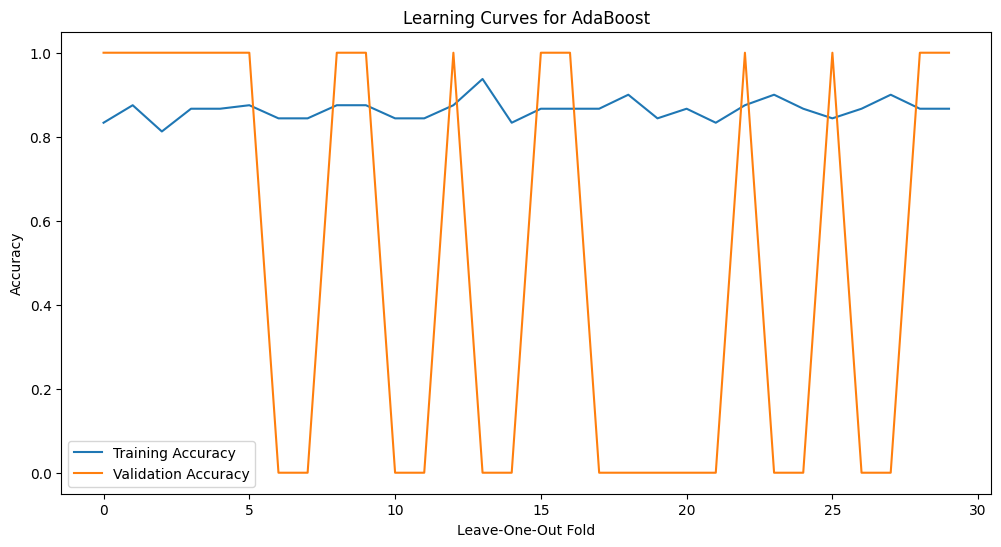

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.5454545454545454
Test Precision: 0.6331168831168831
Test Recall: 0.5454545454545454
Test F1-score: 0.5454545454545454
Test Confusion Matrix:
[[3 4]
 [1 3]]


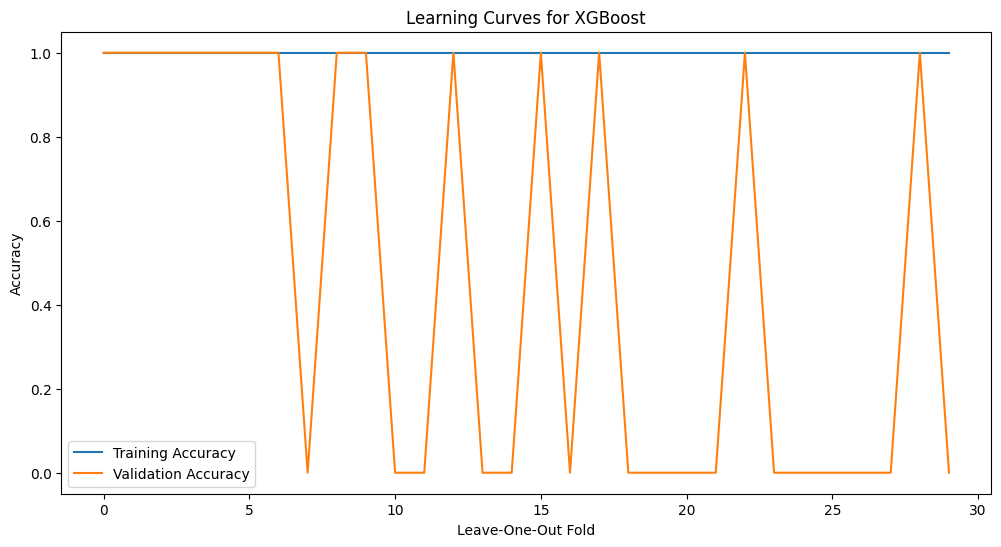

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with SMOTE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply SMOTE to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply SMOTE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()




In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.8181818181818182
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
Confusion Matrix:
[[3 1]
 [1 6]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.7272727272727273
Precision: 1.0
Recall: 0.5714285714285714
F1-score: 0.7272727272727273
Confusion Matrix:
[[4 0]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.8181818181818182
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
Confusion Matrix:
[[3 1]
 [1 6]]



Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6
Confusion Matrix:
[[4 0]
 [4 3]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6
Confusion Matrix:
[[4 0]
 [4 3]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]

Variable Importance for XGBoost:
Feature 0: 0.04052453860640526
Feature 1: 0.07027444243431091
Feature 2: 0.09311426430940628
Feature 3: 0.051031533628702164
Feature 4: 0.1743137240409851
Feature 5: 0.03788427263498306
Feature 6: 0.1

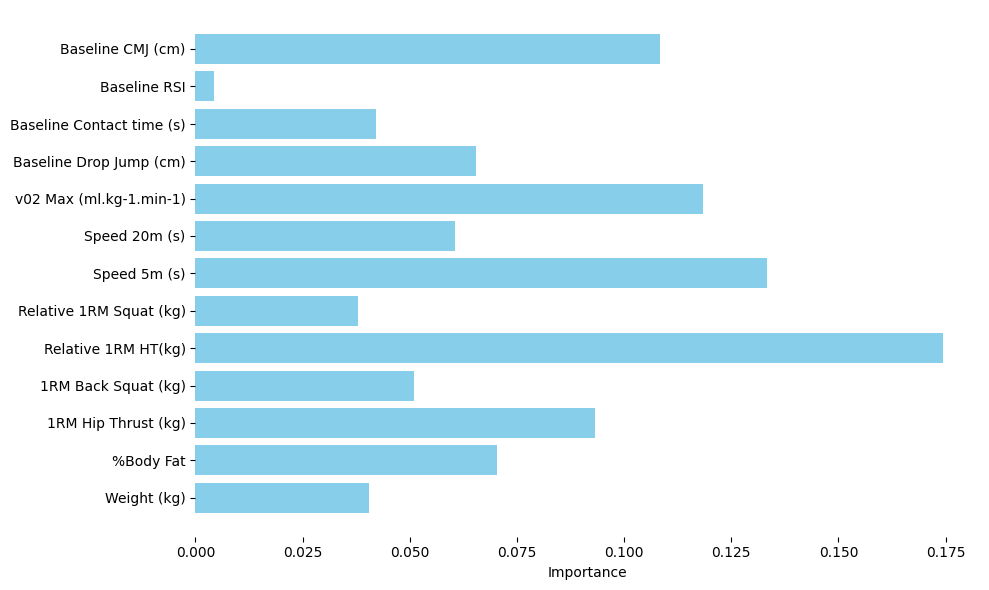

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'XGBoost':
        variable_importance = clf.feature_importances_
        print(f"\nVariable Importance for {name}:")
        for idx, importance in enumerate(variable_importance):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot variable importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, variable_importance, color='skyblue')
        plt.xlabel('Importance')
        #plt.ylabel('Feature')
        #plt.title('Variable Importance for Random Forest Classifier')

        # Add text annotations
        '''for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(variable_importance[idx], 2),
                     va='center', ha='left')'''

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()


## **ADASYN Balacing Method**

### Leave-One-Out

Fitting 38 folds for each of 36 candidates, totalling 1368 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727273
Test Confusion Matrix:
[[4 2]
 [1 4]]


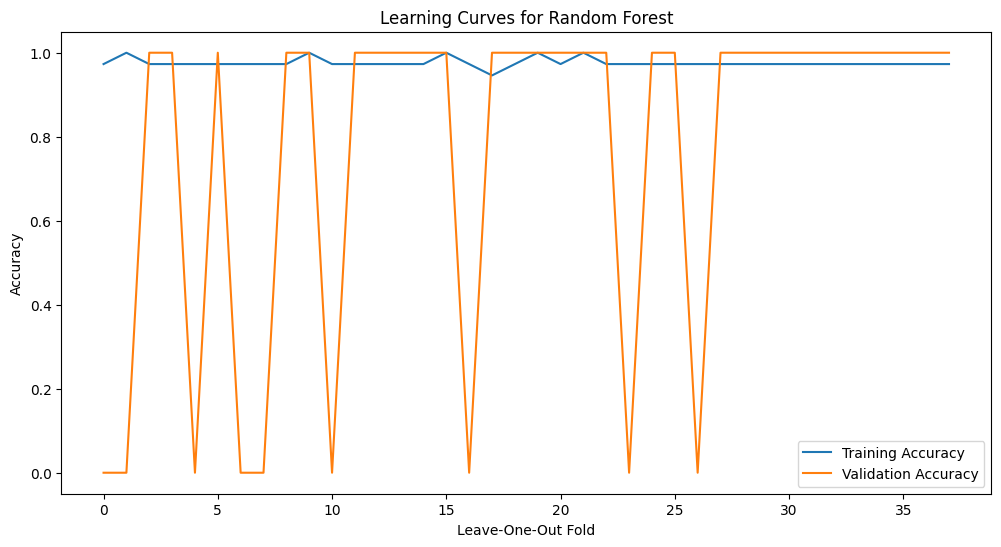

Fitting 38 folds for each of 1 candidates, totalling 38 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7368421052631579
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727273
Test Confusion Matrix:
[[4 2]
 [1 4]]


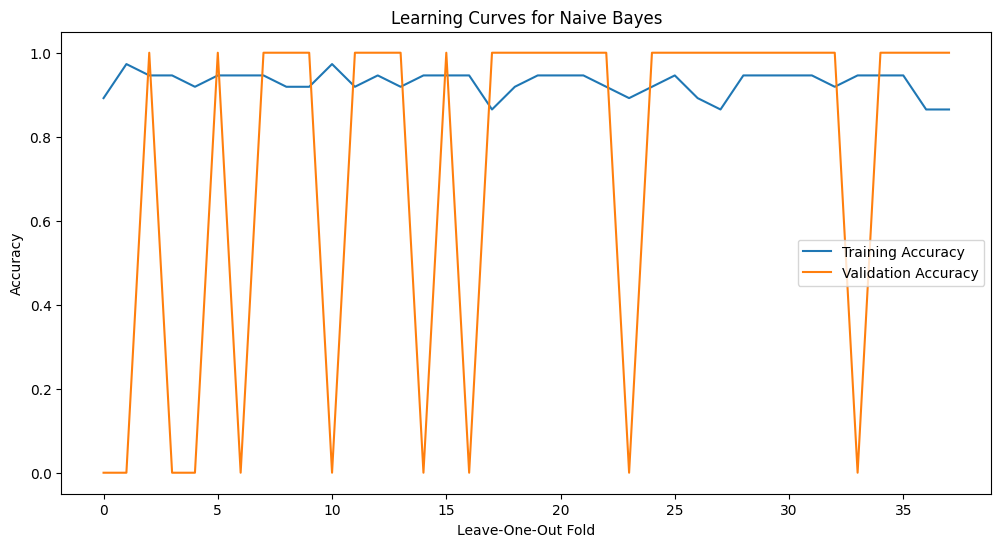

Fitting 38 folds for each of 12 candidates, totalling 456 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.7368421052631579
Test Accuracy: 0.8181818181818182
Test Precision: 0.8181818181818182
Test Recall: 0.8181818181818182
Test F1-score: 0.8181818181818182
Test Confusion Matrix:
[[5 1]
 [1 4]]


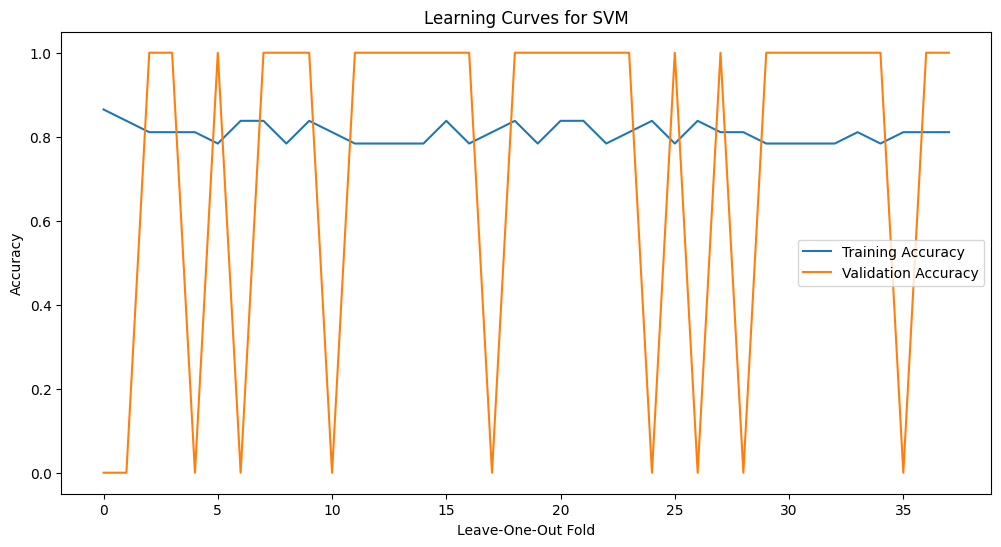

Fitting 38 folds for each of 12 candidates, totalling 456 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.9090909090909091
Test Precision: 0.922077922077922
Test Recall: 0.9090909090909091
Test F1-score: 0.9075369075369075
Test Confusion Matrix:
[[6 0]
 [1 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

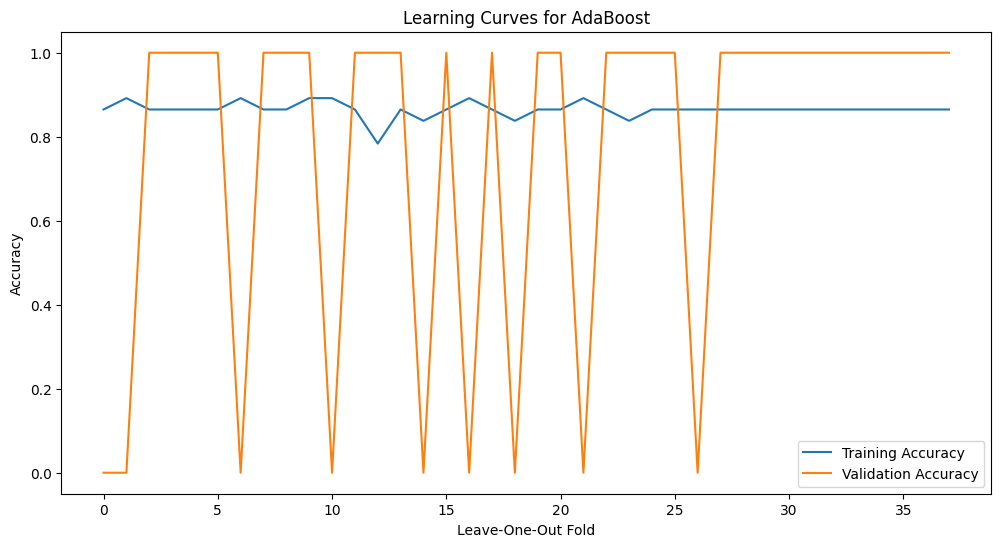

Fitting 38 folds for each of 27 candidates, totalling 1026 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.8181818181818182
Test Precision: 0.8636363636363636
Test Recall: 0.8181818181818182
Test F1-score: 0.8084415584415584
Test Confusion Matrix:
[[6 0]
 [2 3]]


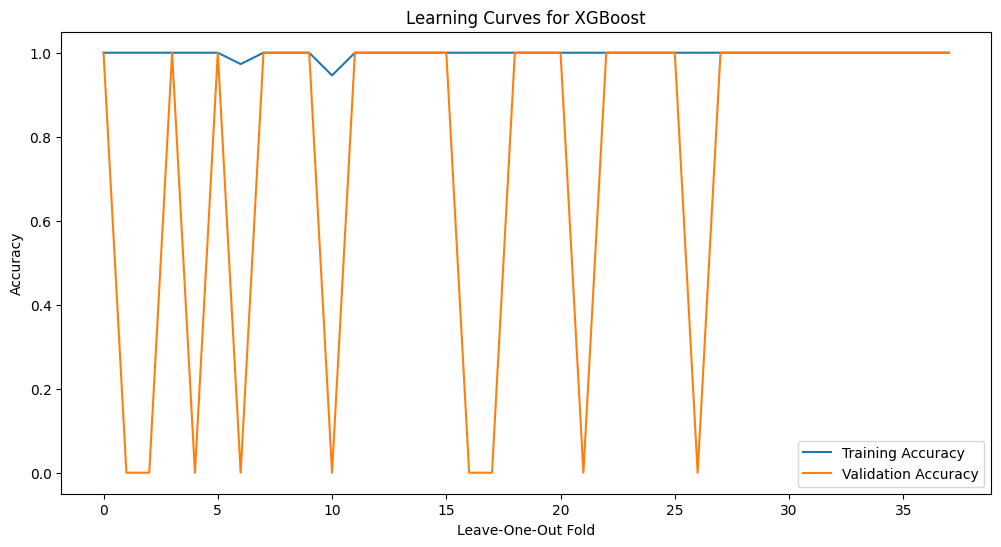

In [ ]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        model.fit(X_train_cv, y_train_cv)
        train_pred = model.predict(X_train_cv)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_train_cv, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies
# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=LeaveOneOut(),
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_resampled_adasyn_final, y_resampled_adasyn_final)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Evaluate on the test set
        y_test_pred = best_model.predict(x_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_resampled_adasyn_final, y_resampled_adasyn_final)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        model.fit(X_resampled_adasyn_final, y_resampled_adasyn_final)

        y_test_pred = model.predict(x_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")


        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_resampled_adasyn_final, y_resampled_adasyn_final)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()


SHAP values shape: (11, 13)

Feature Importances using SHAP for Best Random Forest Model:
                      Feature  Importance
0                 Weight (kg)    0.116215
1                   %Body Fat    0.020985
2         1RM Hip Thrust (kg)    0.006784
3         1RM Back Squat (kg)    0.980516
4         Relative 1RM HT(kg)    0.011244
5     Relative 1RM Squat (kg)    0.090635
6                Speed 5m (s)    0.074494
7               Speed 20m (s)    0.000000
8     v02 Max (ml.kg-1.min-1)    0.100797
9     Baseline Drop Jump (cm)    0.023991
10  Baseline Contact time (s)    0.404436
11               Baseline RSI    0.000000
12          Baseline CMJ (cm)    0.146300


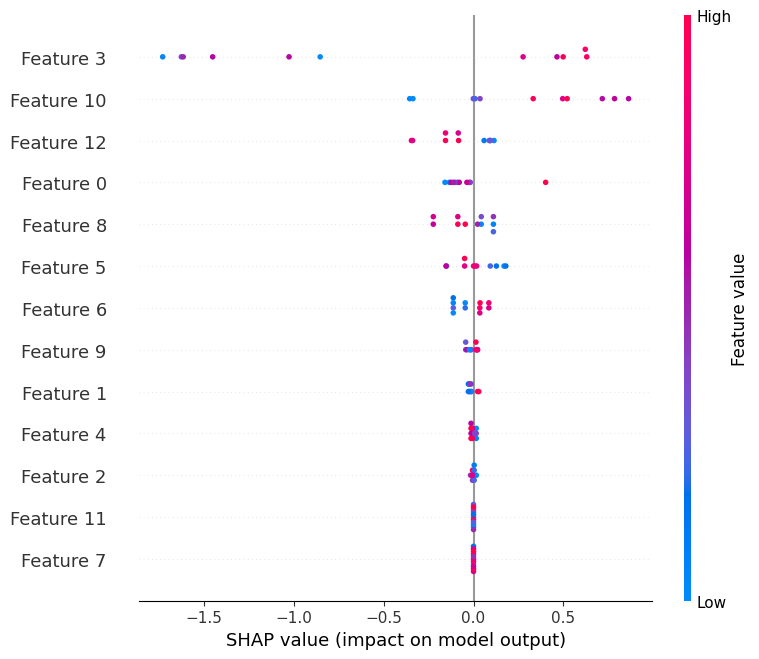

In [ ]:
import shap
import pandas as pd
import numpy as np

# Assuming best_model is the best XGBoost model obtained from GridSearchCV
# and X_resampled_full is the resampled training data used for fitting best_model

# Define SHAP explainer for XGBoost
explainer = shap.Explainer(best_model)

# Compute SHAP values for the test set
shap_values = explainer(x_test)

# Print the shape of SHAP values for debugging
print(f"SHAP values shape: {shap_values.shape}")

# Extract feature names directly from X_test DataFrame
feature_names = df_filtered.columns.tolist()

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0) / np.sum(np.abs(shap_values.values))

# Ensure lengths match
if len(feature_names) != len(mean_shap_values):
    print(f"Length mismatch: feature_names ({len(feature_names)}) != mean_shap_values ({len(mean_shap_values)})")
    raise ValueError("Length mismatch")

# Ensure 1D arrays
feature_names = np.array(feature_names).flatten()
mean_shap_values = np.array(mean_shap_values).flatten()

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_shap_values
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances using SHAP for Best XGBoost Model:")
print(importance_df)

# Save the importance DataFrame to a file
importance_df.to_csv('feature_importances_CK.csv', index=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, x_test)


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=4)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=4)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 1.0
F1-score: 0.8
Confusion Matrix:
[[2 3]
 [0 6]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.625
Recall: 0.8333333333333334
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 3]
 [1 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.5714285714285714
Recall: 0.6666666666666666
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 3]
 [2 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.625
Recall: 0.8333333333333334
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 3]
 [1 5]]

Classifier: XGBoost
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 1.0
F1-score: 0.8
Confusion Matrix:
[[2 3]
 [0 6]]


# **Ranking CMJ Prediction**

Here you can find the best combination for CMJ: **SMOTE or ROSE and RF**

In [ ]:
bin_edges = [0, 21, 41]  # 0-20 (top 20), 21-40 (next 20)

# Define the bin labels
bin_labels = ['top_20', 'next_20']

reviews3 = data['Reviews_CMJ'] = pd.cut(data['Ranking_CMJ'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [ ]:
reviews = []
for i in data['Ranking_CMJ']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_CMJ'] = reviews

In [ ]:
y3 = data['Reviews_CMJ']
y3

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    1
13    1
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    1
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    1
38    1
39    1
40    1
Name: Reviews_CMJ, dtype: object

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 13)
(30,)
(11, 13)
(11,)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)

## **Rose Balancing Method**

### Leave-One-Out

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.36363636363636365
Test Precision: 0.3181818181818182
Test Recall: 0.36363636363636365
Test F1-score: 0.3393939393939394
Test Confusion Matrix:
[[0 4]
 [3 4]]


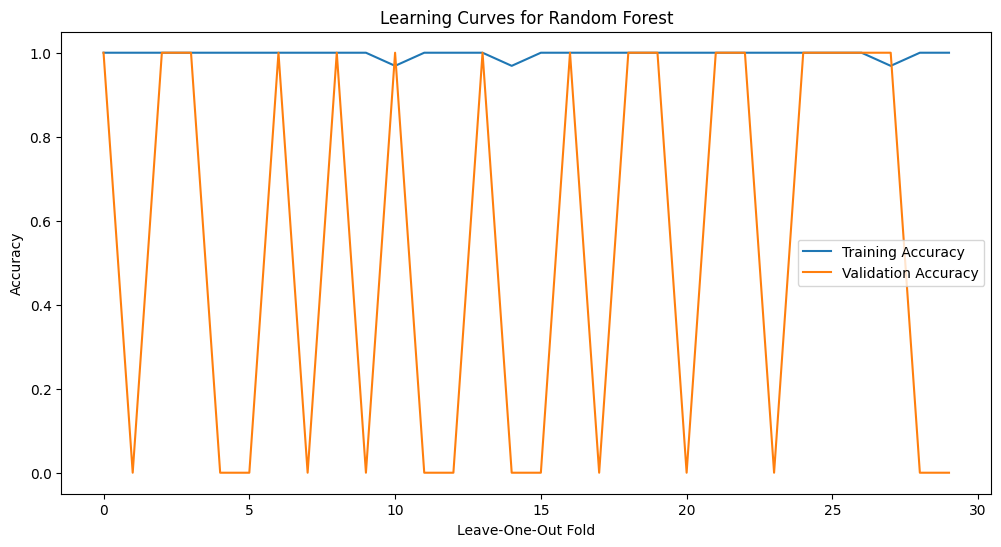

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.43333333333333335
Test Accuracy: 0.45454545454545453
Test Precision: 0.503030303030303
Test Recall: 0.45454545454545453
Test F1-score: 0.4636363636363636
Test Confusion Matrix:
[[2 2]
 [4 3]]


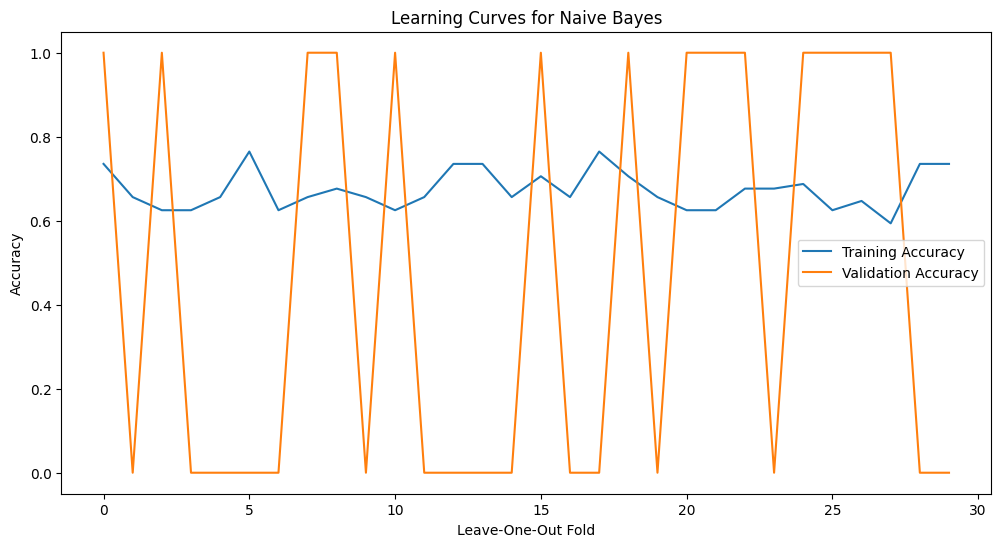

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.36363636363636365
Test Precision: 0.3181818181818182
Test Recall: 0.36363636363636365
Test F1-score: 0.3393939393939394
Test Confusion Matrix:
[[0 4]
 [3 4]]


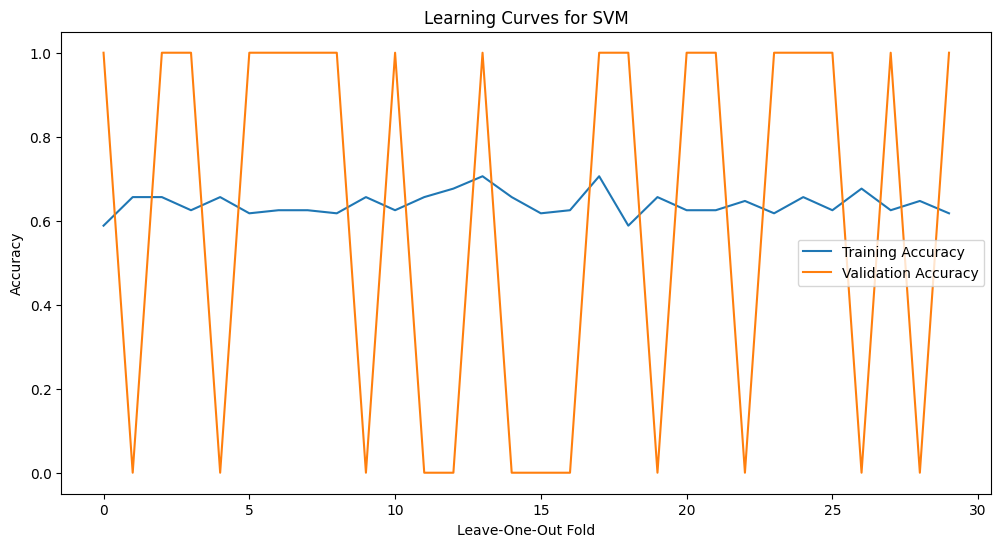

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Best F1 Score: 0.5
Test Accuracy: 0.09090909090909091
Test Precision: 0.1272727272727273
Test Recall: 0.09090909090909091
Test F1-score: 0.10606060606060605
Test Confusion Matrix:
[[0 4]
 [6 1]]


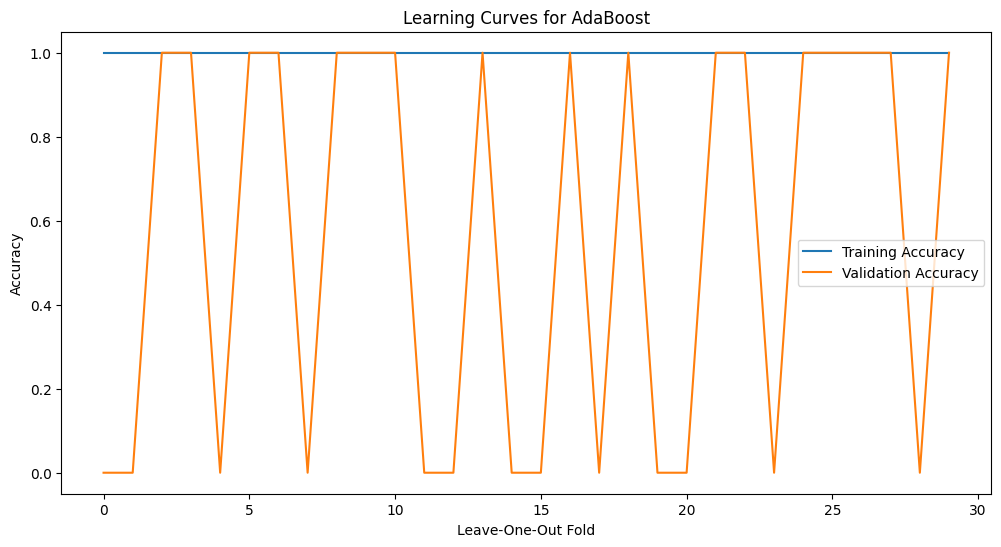

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.45454545454545453
Test Precision: 0.3535353535353536
Test Recall: 0.45454545454545453
Test F1-score: 0.3977272727272728
Test Confusion Matrix:
[[0 4]
 [2 5]]


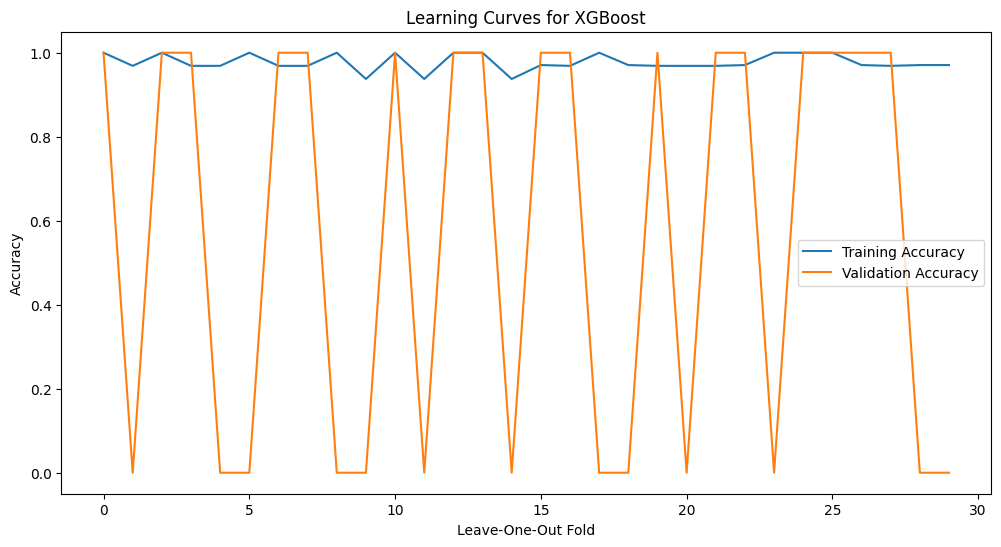

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6
Confusion Matrix:
[[4 0]
 [4 3]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]



Classifier: Random Forest
Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.8571428571428571
F1-score: 0.923076923076923
Confusion Matrix:
[[4 0]
 [1 6]]

Variable Importance for Random Forest:
Feature 0: 0.05777056124065805
Feature 1: 0.09135705614573837
Feature 2: 0.04983376950716331
Feature 3: 0.0891695586995347
Feature 4: 0.1402471189767756
Feature 5: 0.05772951380963454
Feature 6: 0.09804417184810064
Feature 7: 0.07541667210274063
Feature 8: 0.059581845729692544
Feature 9: 0.09610781546819669
Feature 10: 0.06895663641589596
Feature 11: 0.06729614377011096
Feature 12: 0.04848913628575816


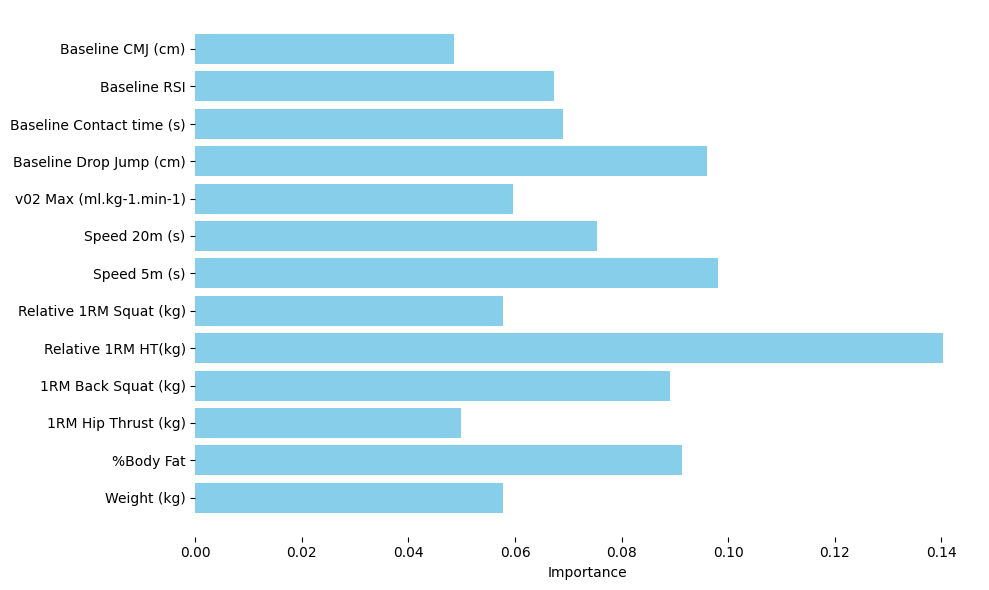


Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 1.0
Recall: 0.42857142857142855
F1-score: 0.6
Confusion Matrix:
[[4 0]
 [4 3]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'Random Forest':
        variable_importance = clf.feature_importances_
        print(f"\nVariable Importance for {name}:")
        for idx, importance in enumerate(variable_importance):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot variable importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, variable_importance, color='skyblue')
        plt.xlabel('Importance')
        #plt.ylabel('Feature')
        #plt.title('Variable Importance for Random Forest Classifier')

        # Add text annotations
        '''for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(variable_importance[idx], 2),
                     va='center', ha='left')'''

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()


## **SMOTE Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.3151515151515152
Test Recall: 0.2727272727272727
Test F1-score: 0.2848484848484848
Test Confusion Matrix:
[[1 3]
 [5 2]]


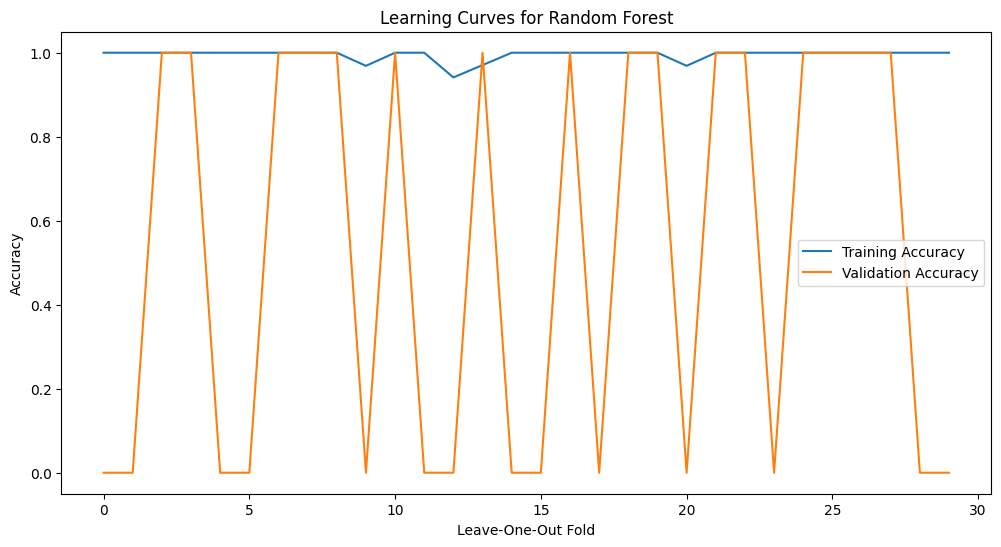

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.43333333333333335
Test Accuracy: 0.45454545454545453
Test Precision: 0.503030303030303
Test Recall: 0.45454545454545453
Test F1-score: 0.4636363636363636
Test Confusion Matrix:
[[2 2]
 [4 3]]


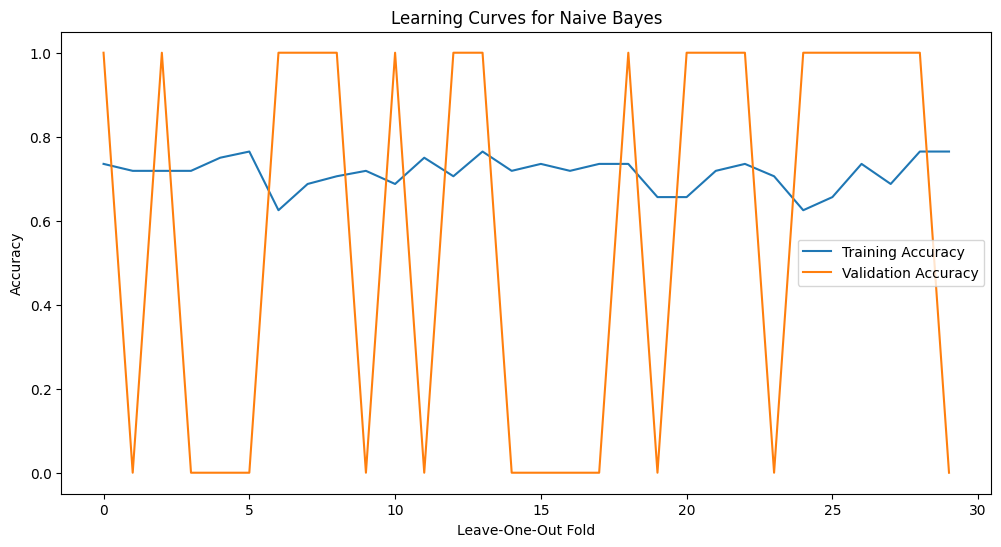

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.3535353535353536
Test Recall: 0.45454545454545453
Test F1-score: 0.3977272727272728
Test Confusion Matrix:
[[0 4]
 [2 5]]


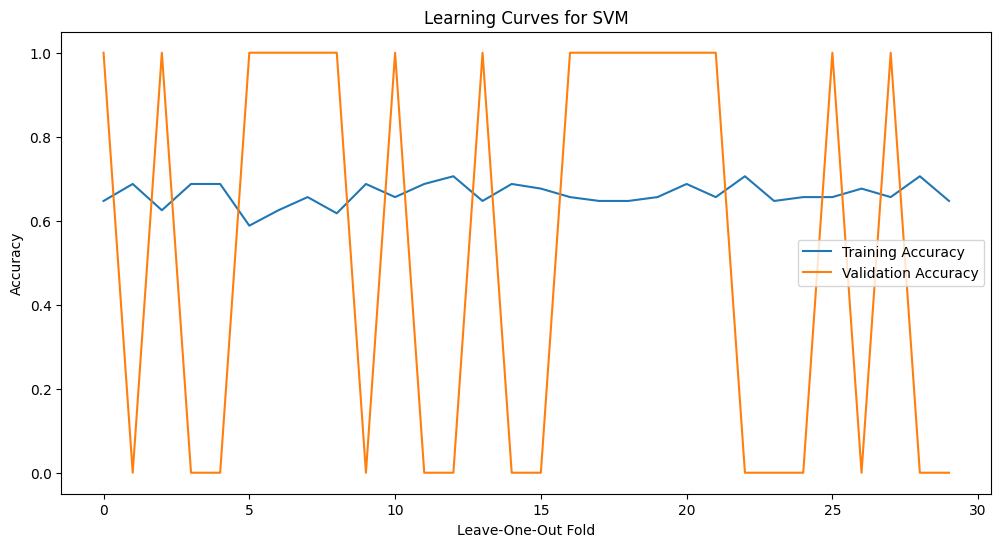

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 50}
Best F1 Score: 0.5
Test Accuracy: 0.2727272727272727
Test Precision: 0.303030303030303
Test Recall: 0.2727272727272727
Test F1-score: 0.2484848484848485
Test Confusion Matrix:
[[2 2]
 [6 1]]


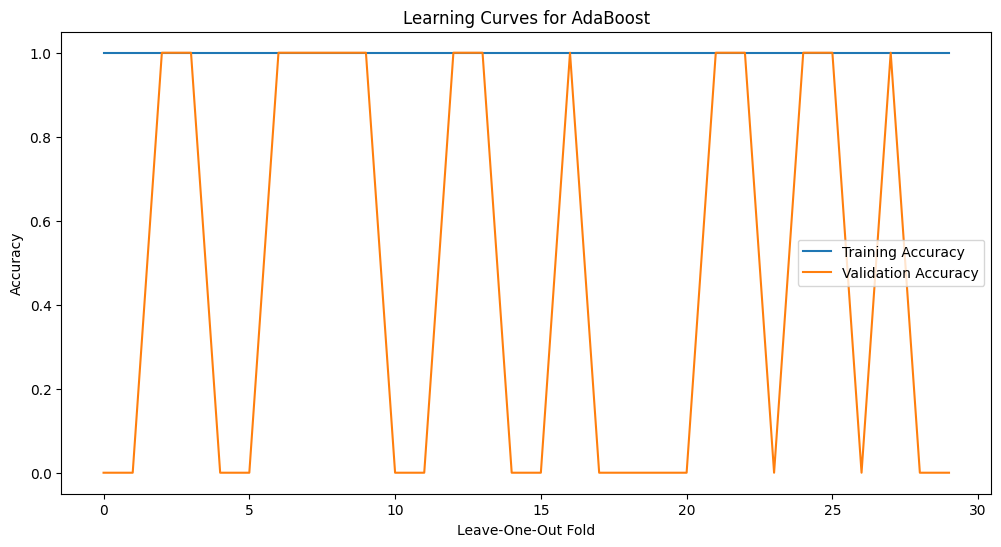

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.45454545454545453
Test Precision: 0.3535353535353536
Test Recall: 0.45454545454545453
Test F1-score: 0.3977272727272728
Test Confusion Matrix:
[[0 4]
 [2 5]]


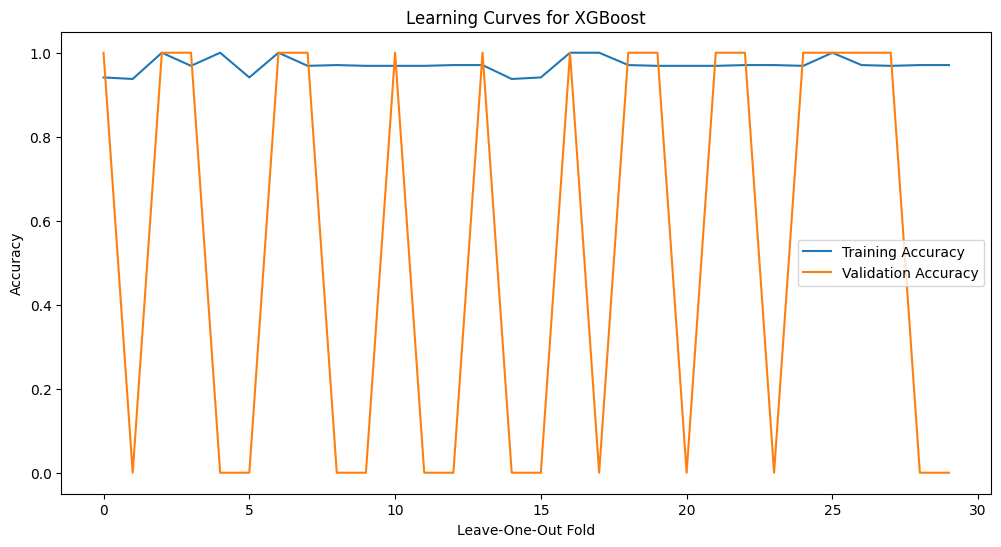

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with SMOTE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply SMOTE to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply SMOTE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()




In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.9090909090909091
Precision: 1.0
Recall: 0.8571428571428571
F1-score: 0.923076923076923
Confusion Matrix:
[[4 0]
 [1 6]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: SVM
Accuracy: 0.7272727272727273
Precision: 1.0
Recall: 0.5714285714285714
F1-score: 0.7272727272727273
Confusion Matrix:
[[4 0]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.8181818181818182
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
Confusion Matrix:
[[3 1]
 [1 6]]


## **ADASYN Balacing Method**

### Leave-One-Out

In [ ]:
# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

RANDOM_SEED = 42
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=RANDOM_SEED),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_SEED),
    'XGBoost': XGBClassifier(random_state=RANDOM_SEED)
}

Fitting 38 folds for each of 36 candidates, totalling 1368 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727273
Test Confusion Matrix:
[[4 2]
 [1 4]]


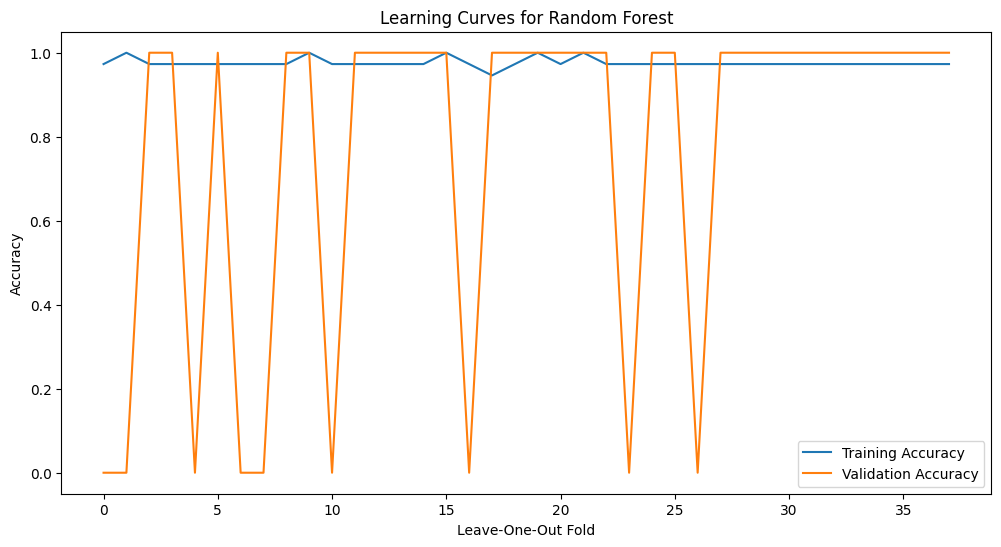

Fitting 38 folds for each of 1 candidates, totalling 38 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7368421052631579
Test Accuracy: 0.7272727272727273
Test Precision: 0.7393939393939394
Test Recall: 0.7272727272727273
Test F1-score: 0.7272727272727273
Test Confusion Matrix:
[[4 2]
 [1 4]]


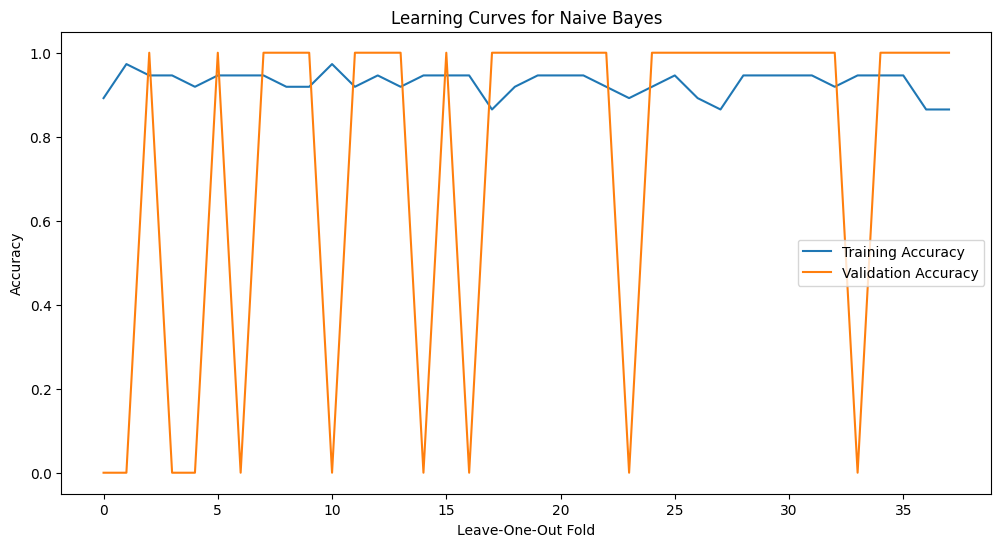

Fitting 38 folds for each of 12 candidates, totalling 456 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.7368421052631579
Test Accuracy: 0.8181818181818182
Test Precision: 0.8181818181818182
Test Recall: 0.8181818181818182
Test F1-score: 0.8181818181818182
Test Confusion Matrix:
[[5 1]
 [1 4]]


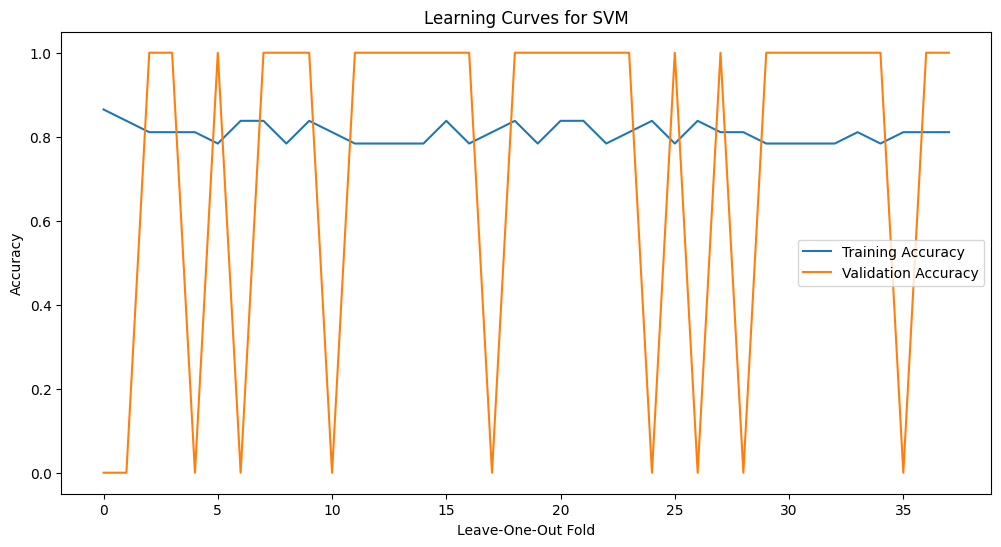

Fitting 38 folds for each of 12 candidates, totalling 456 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.9090909090909091
Test Precision: 0.922077922077922
Test Recall: 0.9090909090909091
Test F1-score: 0.9075369075369075
Test Confusion Matrix:
[[6 0]
 [1 4]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

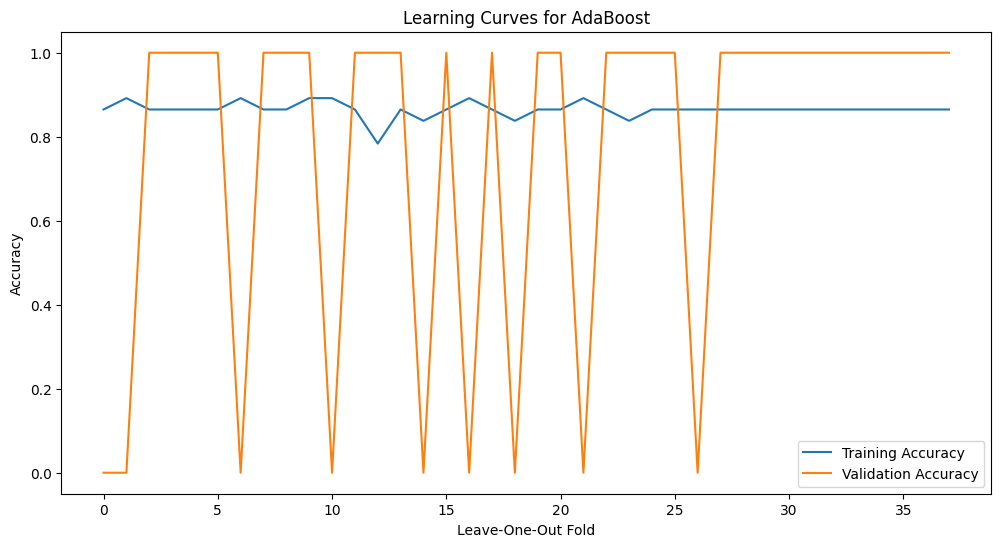

Fitting 38 folds for each of 27 candidates, totalling 1026 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Best F1 Score: 0.7631578947368421
Test Accuracy: 0.8181818181818182
Test Precision: 0.8636363636363636
Test Recall: 0.8181818181818182
Test F1-score: 0.8084415584415584
Test Confusion Matrix:
[[6 0]
 [2 3]]


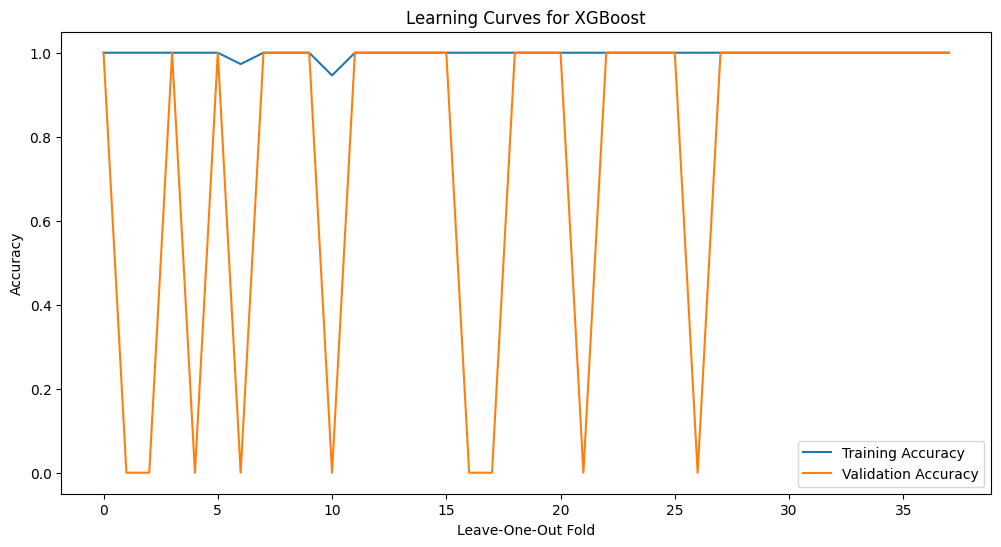

In [ ]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        model.fit(X_train_cv, y_train_cv)
        train_pred = model.predict(X_train_cv)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_train_cv, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies
# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=LeaveOneOut(),
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_resampled_adasyn_final, y_resampled_adasyn_final)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Evaluate on the test set
        y_test_pred = best_model.predict(x_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_resampled_adasyn_final, y_resampled_adasyn_final)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        model.fit(X_resampled_adasyn_final, y_resampled_adasyn_final)

        y_test_pred = model.predict(x_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")


        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_resampled_adasyn_final, y_resampled_adasyn_final)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()


SHAP values shape: (11, 13)

Feature Importances using SHAP for Best XGBoost Model:
                      Feature  Importance
3         1RM Back Squat (kg)    0.051529
10  Baseline Contact time (s)    0.016365
12          Baseline CMJ (cm)    0.007582
5     Relative 1RM Squat (kg)    0.005156
2         1RM Hip Thrust (kg)    0.002827
8     v02 Max (ml.kg-1.min-1)    0.002619
4         Relative 1RM HT(kg)    0.001444
1                   %Body Fat    0.001403
0                 Weight (kg)    0.000580
6                Speed 5m (s)    0.000516
7               Speed 20m (s)    0.000462
11               Baseline RSI    0.000357
9     Baseline Drop Jump (cm)    0.000068


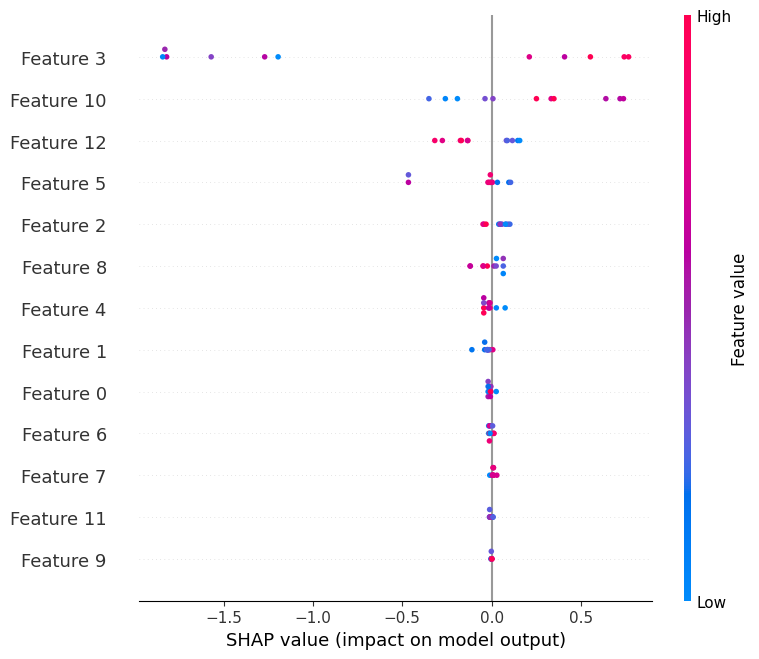

In [ ]:
import shap
import pandas as pd
import numpy as np

# Assuming best_model is the best XGBoost model obtained from GridSearchCV
# and X_resampled_full is the resampled training data used for fitting best_model

# Define SHAP explainer for XGBoost
explainer = shap.Explainer(best_model)

# Compute SHAP values for the test set
shap_values = explainer(x_test)

# Print the shape of SHAP values for debugging
print(f"SHAP values shape: {shap_values.shape}")

# Extract feature names directly from X_test DataFrame
feature_names = df_filtered.columns.tolist()

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0) / np.sum(np.abs(shap_values.values))

# Ensure lengths match
if len(feature_names) != len(mean_shap_values):
    print(f"Length mismatch: feature_names ({len(feature_names)}) != mean_shap_values ({len(mean_shap_values)})")
    raise ValueError("Length mismatch")

# Ensure 1D arrays
feature_names = np.array(feature_names).flatten()
mean_shap_values = np.array(mean_shap_values).flatten()

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': mean_shap_values
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances using SHAP for Best XGBoost Model:")
print(importance_df)

# Save the importance DataFrame to a file
importance_df.to_csv('feature_importances_CMJ.csv', index=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, x_test)


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y3)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=4)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=4)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 0.625
Recall: 0.8333333333333334
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 3]
 [1 5]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.625
Recall: 0.8333333333333334
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 3]
 [1 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.5714285714285714
Recall: 0.6666666666666666
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 3]
 [2 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.625
Recall: 0.8333333333333334
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 3]
 [1 5]]

Classifier: XGBoost
Accuracy: 0.7272727272727273
Precision: 0.6666666666666666
Recall: 1.0
F1-score: 0.8
Confusion Matrix:
[[2 3]
 [0 6]]


# **Ranking DJ Prediction**

The drop jump analysis did not reveal a clear best model combination but indicated a maximum F-Measure of 0.5 across several methods, showcasing the complexity of pinpointing performance predictors.

*Feature importance is found at ROSE section*.

In [ ]:
bin_edges = [0, 21, 41]  # 0-20 (top 20), 21-40 (next 20)

# Define the bin labels
bin_labels = ['top_20', 'next_20']

reviews3 = data['Reviews_DJ'] = pd.cut(data['Ranking_DJ'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [ ]:
reviews = []
for i in data['Ranking_DJ']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_DJ'] = reviews

In [ ]:
y4 = data['Reviews_DJ']

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 13)
(30,)
(11, 13)
(11,)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y4)

## **Rose Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.18181818181818182
Test Precision: 0.11363636363636363
Test Recall: 0.18181818181818182
Test F1-score: 0.13986013986013987
Test Confusion Matrix:
[[2 3]
 [6 0]]


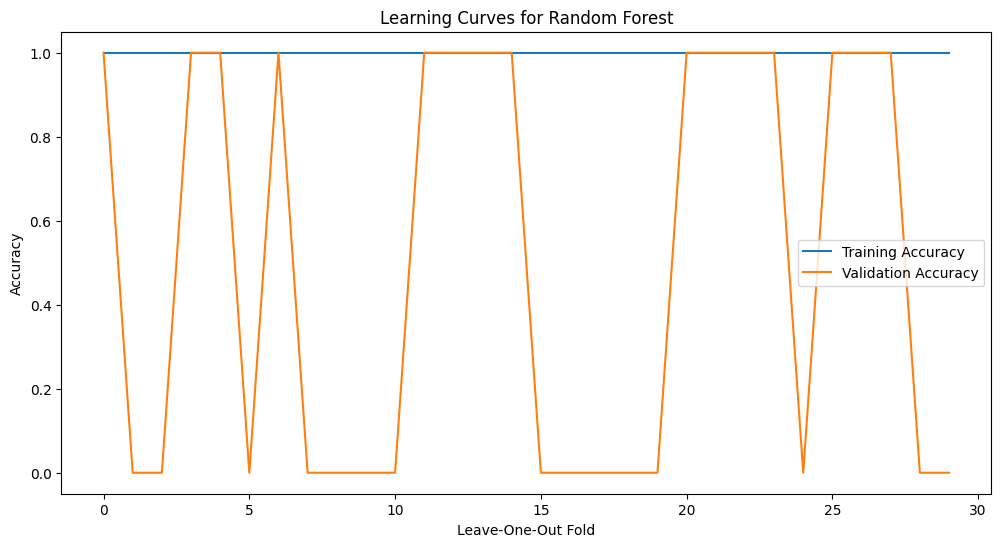

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.43333333333333335
Test Accuracy: 0.36363636363636365
Test Precision: 0.3696969696969697
Test Recall: 0.36363636363636365
Test F1-score: 0.3636363636363636
Test Confusion Matrix:
[[2 3]
 [4 2]]


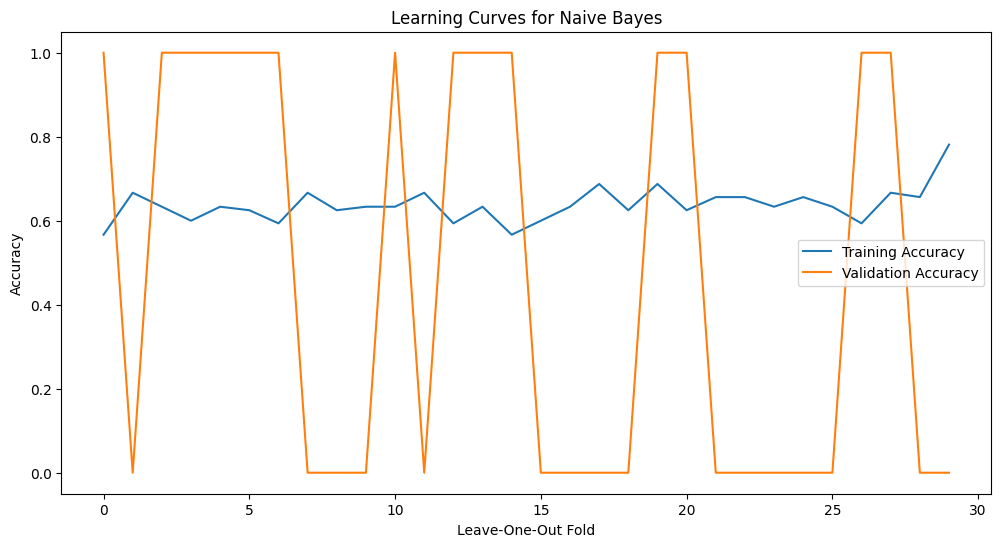

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.2662337662337662
Test Recall: 0.2727272727272727
Test F1-score: 0.2606060606060606
Test Confusion Matrix:
[[2 3]
 [5 1]]


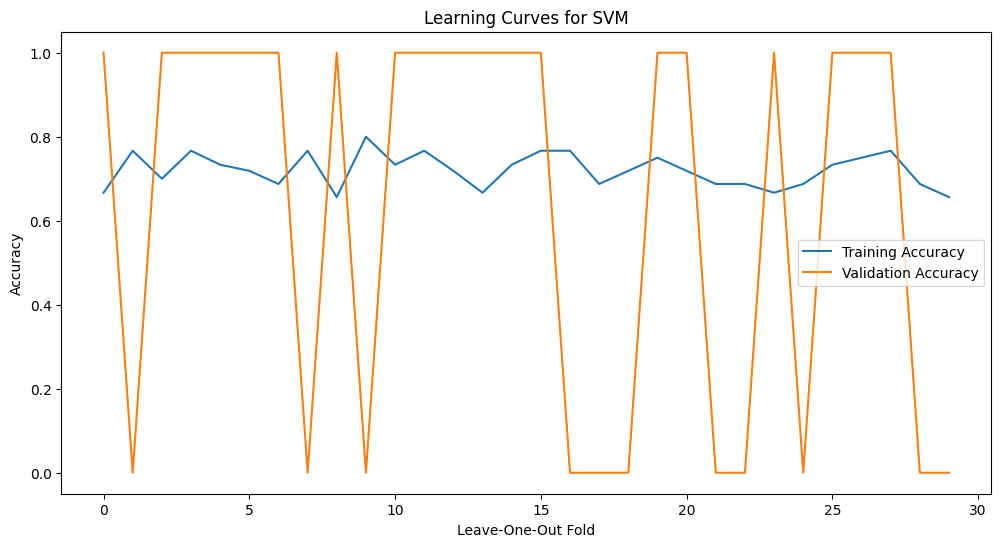

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.36363636363636365
Test Precision: 0.3696969696969697
Test Recall: 0.36363636363636365
Test F1-score: 0.3636363636363636
Test Confusion Matrix:
[[2 3]
 [4 2]]


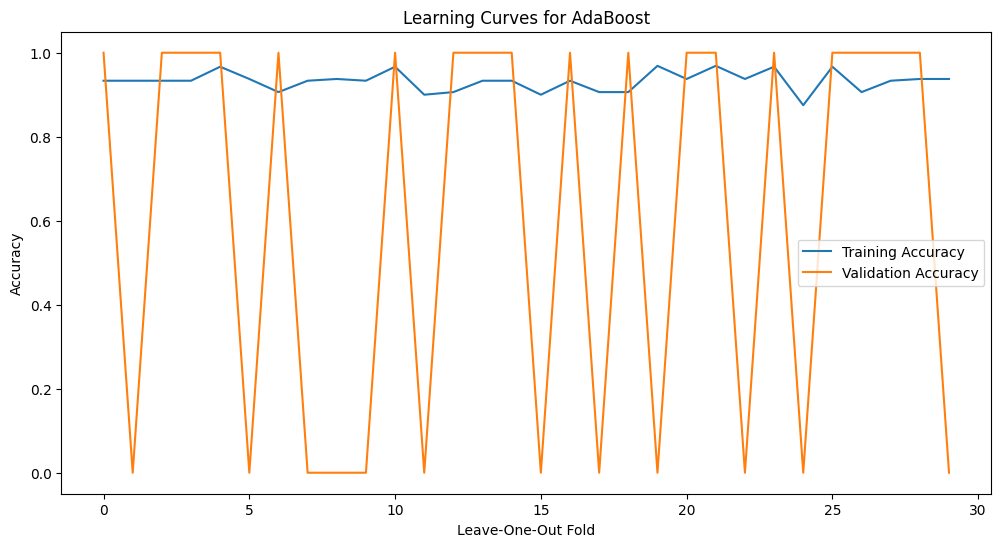

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.18181818181818182
Test Precision: 0.11363636363636363
Test Recall: 0.18181818181818182
Test F1-score: 0.13986013986013987
Test Confusion Matrix:
[[2 3]
 [6 0]]


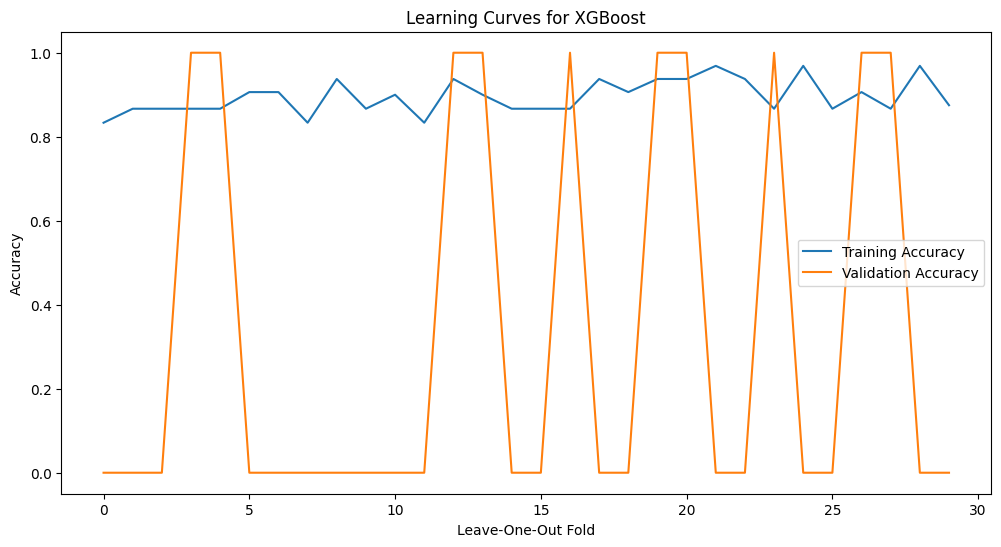

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y4)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.2727272727272727
Precision: 0.3333333333333333
Recall: 0.6
F1-score: 0.42857142857142855
Confusion Matrix:
[[0 6]
 [2 3]]

Classifier: Naive Bayes
Accuracy: 0.36363636363636365
Precision: 0.375
Recall: 0.6
F1-score: 0.4615384615384615
Confusion Matrix:
[[1 5]
 [2 3]]

Classifier: SVM
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]

Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]

Classifier: XGBoost
Accuracy: 0.36363636363636365
Precision: 0.375
Recall: 0.6
F1-score: 0.4615384615384615
Confusion Matrix:
[[1 5]
 [2 3]]



Classifier: Random Forest
Accuracy: 0.18181818181818182
Precision: 0.25
Recall: 0.4
F1-score: 0.3076923076923077
Confusion Matrix:
[[0 6]
 [3 2]]

Classifier: Naive Bayes
Accuracy: 0.36363636363636365
Precision: 0.375
Recall: 0.6
F1-score: 0.4615384615384615
Confusion Matrix:
[[1 5]
 [2 3]]

Classifier: SVM
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]

Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]

Variable Importance for AdaBoost:
Feature 0: 0.04
Feature 1: 0.06
Feature 2: 0.14
Feature 3: 0.08
Feature 4: 0.08
Feature 5: 0.06
Feature 6: 0.06
Feature 7: 0.06
Feature 8: 0.06
Feature 9: 0.08
Feature 10: 0.1
Feature 11: 0.04
Feature 12: 0.14


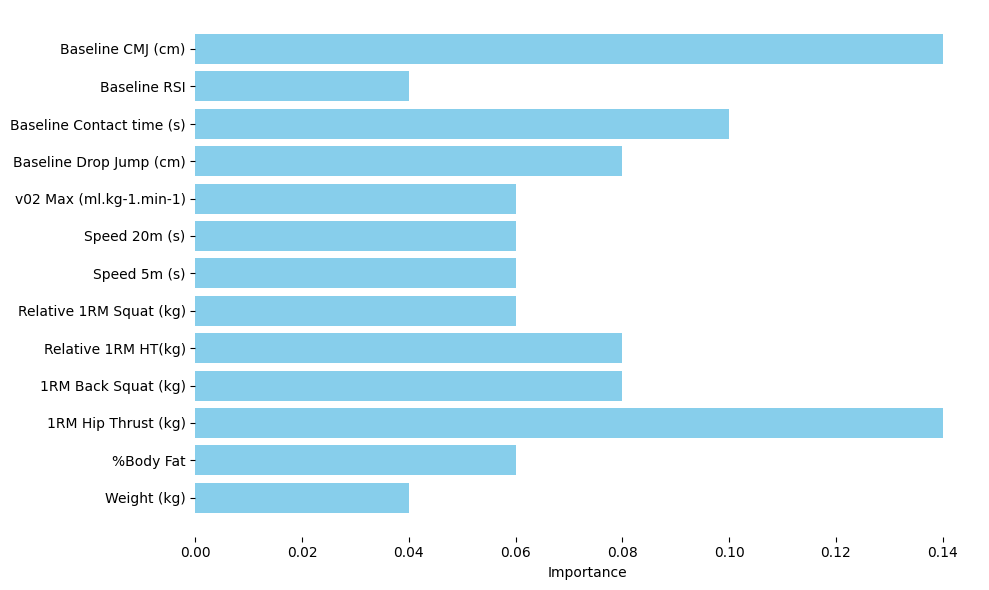


Classifier: XGBoost
Accuracy: 0.36363636363636365
Precision: 0.375
Recall: 0.6
F1-score: 0.4615384615384615
Confusion Matrix:
[[1 5]
 [2 3]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y4)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'AdaBoost':
        variable_importance = clf.feature_importances_
        print(f"\nVariable Importance for {name}:")
        for idx, importance in enumerate(variable_importance):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot variable importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, variable_importance, color='skyblue')
        plt.xlabel('Importance')
        #plt.ylabel('Feature')
        #plt.title('Variable Importance for Random Forest Classifier')

        # Add text annotations
        '''for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(variable_importance[idx], 2),
                     va='center', ha='left')'''

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()


## **SMOTE Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.1515151515151515
Test Recall: 0.2727272727272727
Test F1-score: 0.1948051948051948
Test Confusion Matrix:
[[3 2]
 [6 0]]


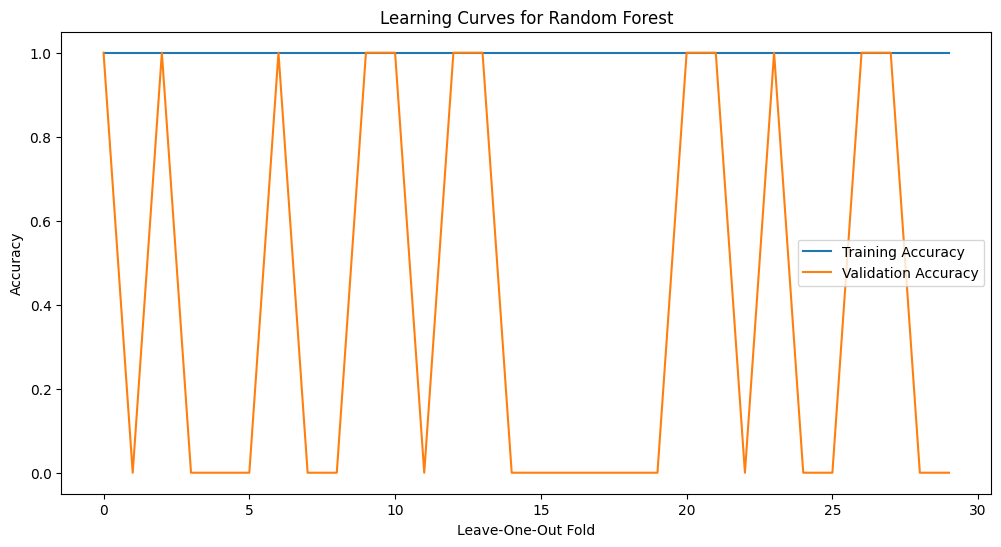

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.43333333333333335
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[3 2]
 [4 2]]


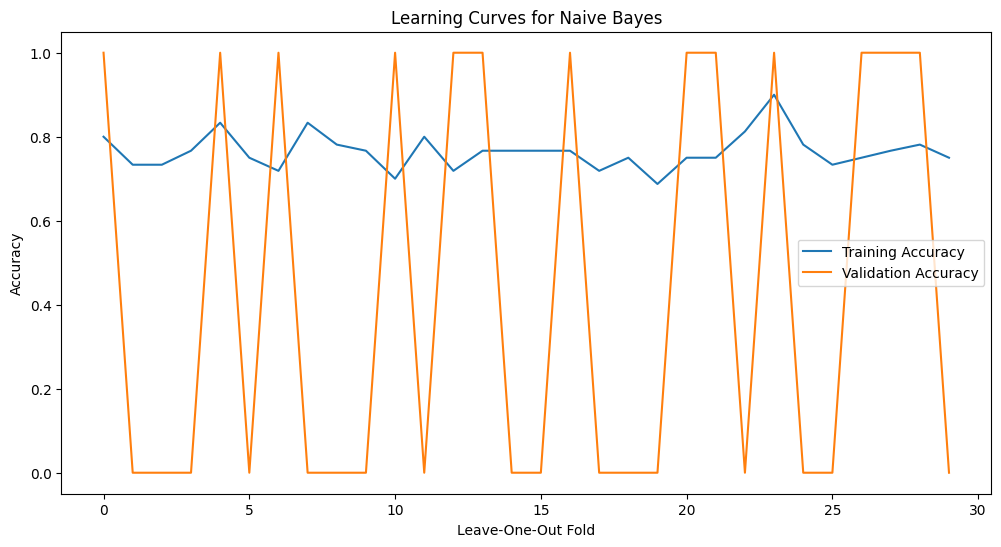

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.2662337662337662
Test Recall: 0.2727272727272727
Test F1-score: 0.2606060606060606
Test Confusion Matrix:
[[2 3]
 [5 1]]


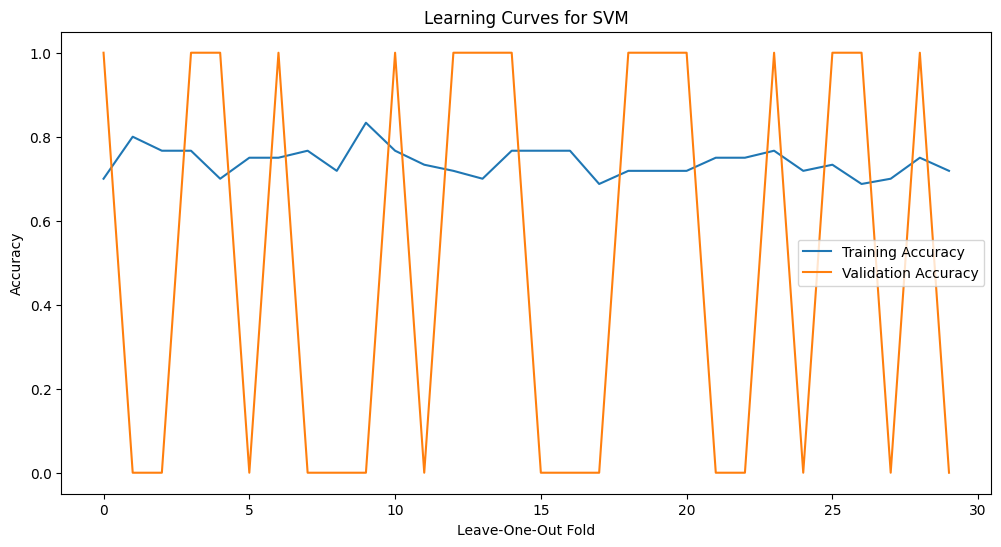

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best F1 Score: 0.5
Test Accuracy: 0.36363636363636365
Test Precision: 0.3522727272727273
Test Recall: 0.36363636363636365
Test F1-score: 0.33100233100233095
Test Confusion Matrix:
[[3 2]
 [5 1]]


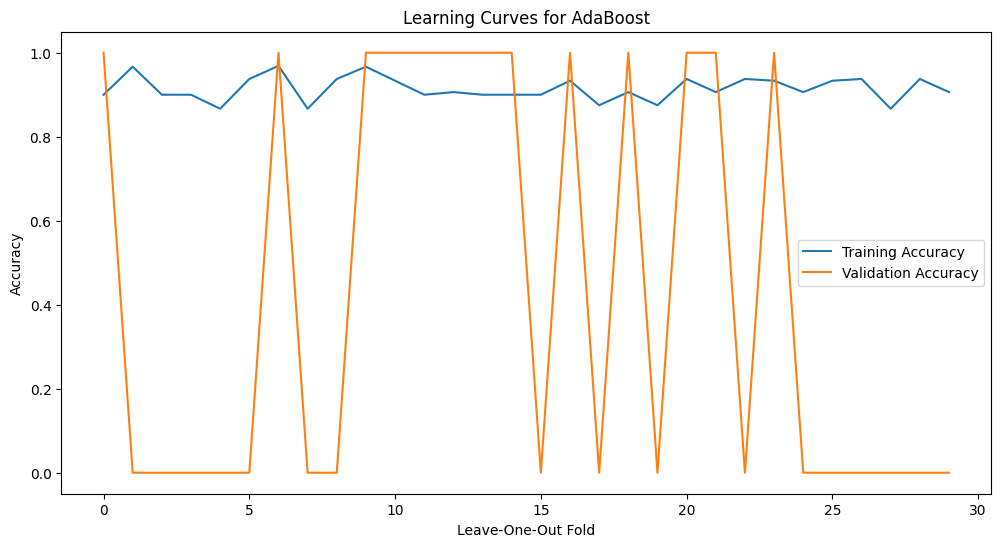

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.47474747474747475
Test Recall: 0.45454545454545453
Test F1-score: 0.39610389610389607
Test Confusion Matrix:
[[4 1]
 [5 1]]


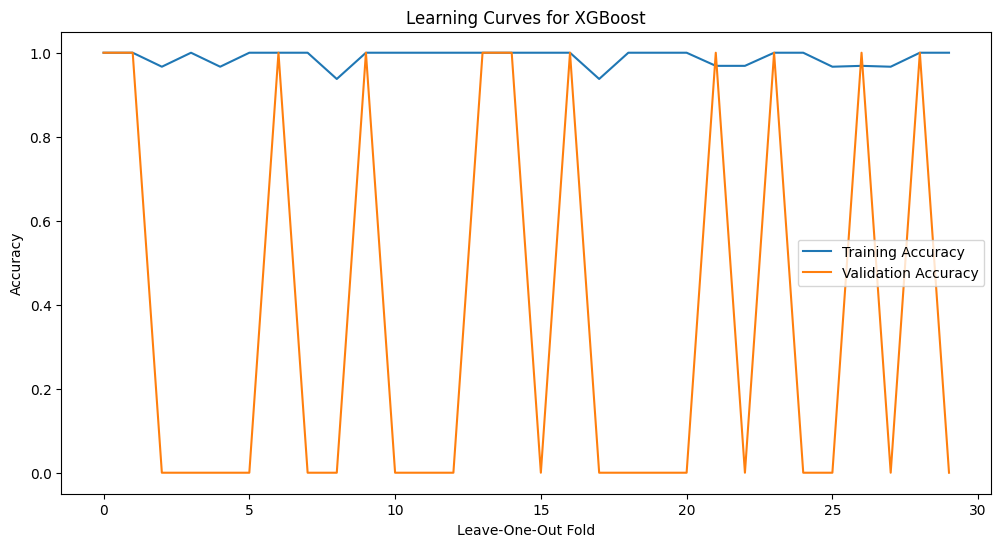

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler  # Import SMOTE and RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with SMOTE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply SMOTE to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply SMOTE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()





Feature Importances using Permutation Importance for GaussianNB:
                      Feature  Importance
0                 Weight (kg)    0.000000
1                   %Body Fat    0.002634
2         1RM Hip Thrust (kg)   -0.145058
3         1RM Back Squat (kg)   -0.147179
4         Relative 1RM HT(kg)   -0.097855
5     Relative 1RM Squat (kg)    0.027239
6                Speed 5m (s)    0.000000
7               Speed 20m (s)    0.000000
8     v02 Max (ml.kg-1.min-1)   -0.080117
9     Baseline Drop Jump (cm)    0.065468
10  Baseline Contact time (s)   -0.133613
11               Baseline RSI   -0.094412
12          Baseline CMJ (cm)   -0.151492


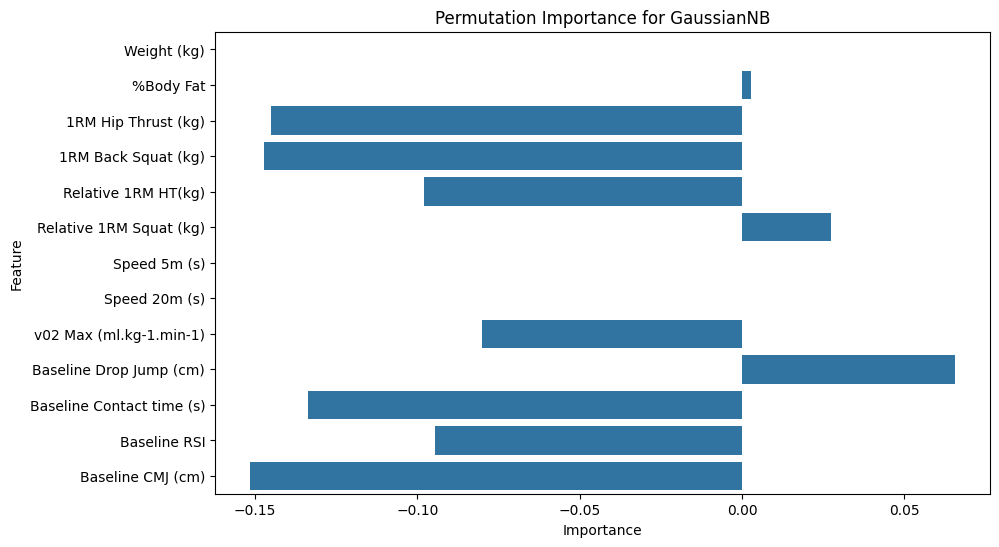

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to check and handle negative values
def preprocess_data(X):
    # Check for negative values
    if (X < 0).any().any():
        print("Warning: Negative values found. Applying Min-Max scaling.")
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    return X

# Load or split your dataset here
# For example:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Example data preprocessing
# X_train_full = preprocess_data(X_train_full)
# X_test = preprocess_data(X_test)

# Define GaussianNB model
model = GaussianNB()

# Preprocess the data
X_train_full = preprocess_data(X_train_full)
X_test = preprocess_data(X_test)

# Train the model
model.fit(X_train_full, y_train_full)

# Compute permutation importance
def compute_permutation_importance(model, X_test, y_test):
    # Compute permutation importance
    results = permutation_importance(model, X_test, y_test, scoring='f1_weighted', n_repeats=10, random_state=42)
    importance_scores = results.importances_mean

    # Create a DataFrame to show feature importances
    feature_names = df_filtered.columns.tolist()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

    return importance_df

# Compute and print feature importances
importance_df = compute_permutation_importance(model, X_test, y_test)

print(f"\nFeature Importances using Permutation Importance for GaussianNB:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Importance for GaussianNB')
plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y4)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.2727272727272727
Precision: 0.3333333333333333
Recall: 0.6
F1-score: 0.42857142857142855
Confusion Matrix:
[[0 6]
 [2 3]]

Classifier: Naive Bayes
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]

Classifier: SVM
Accuracy: 0.2727272727272727
Precision: 0.2857142857142857
Recall: 0.4
F1-score: 0.3333333333333333
Confusion Matrix:
[[1 5]
 [3 2]]

Classifier: AdaBoost
Accuracy: 0.36363636363636365
Precision: 0.3333333333333333
Recall: 0.4
F1-score: 0.3636363636363636
Confusion Matrix:
[[2 4]
 [3 2]]

Classifier: XGBoost
Accuracy: 0.45454545454545453
Precision: 0.42857142857142855
Recall: 0.6
F1-score: 0.5
Confusion Matrix:
[[2 4]
 [2 3]]


## **ADASYN Balacing Method**

### Leave-One-Out

Original class distribution: Counter({0: 16, 1: 14})
Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.36363636363636365
Test Precision: 0.3522727272727273
Test Recall: 0.36363636363636365
Test F1-score: 0.33100233100233095
Test Confusion Matrix:
[[3 2]
 [5 1]]


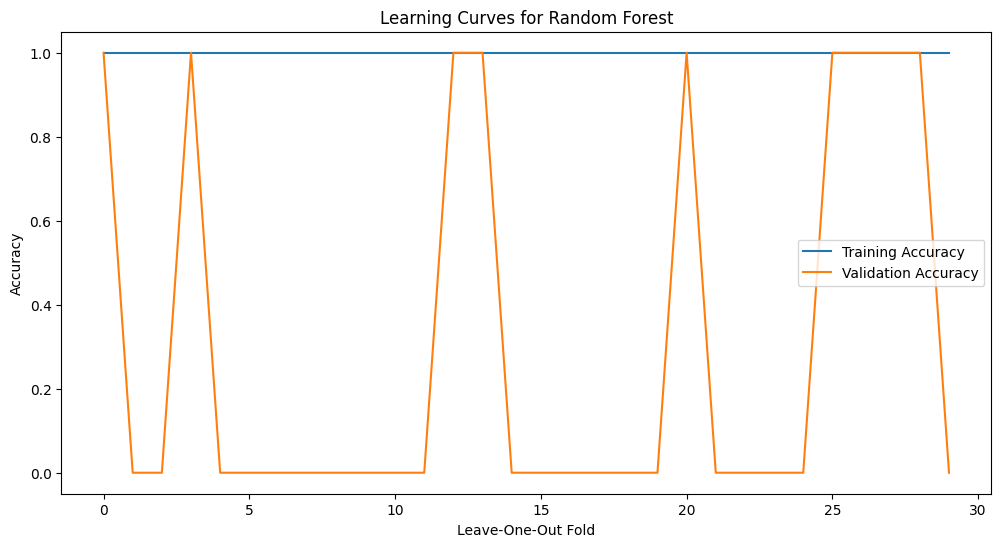

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.43333333333333335
Test Accuracy: 0.36363636363636365
Test Precision: 0.3696969696969697
Test Recall: 0.36363636363636365
Test F1-score: 0.3636363636363636
Test Confusion Matrix:
[[2 3]
 [4 2]]


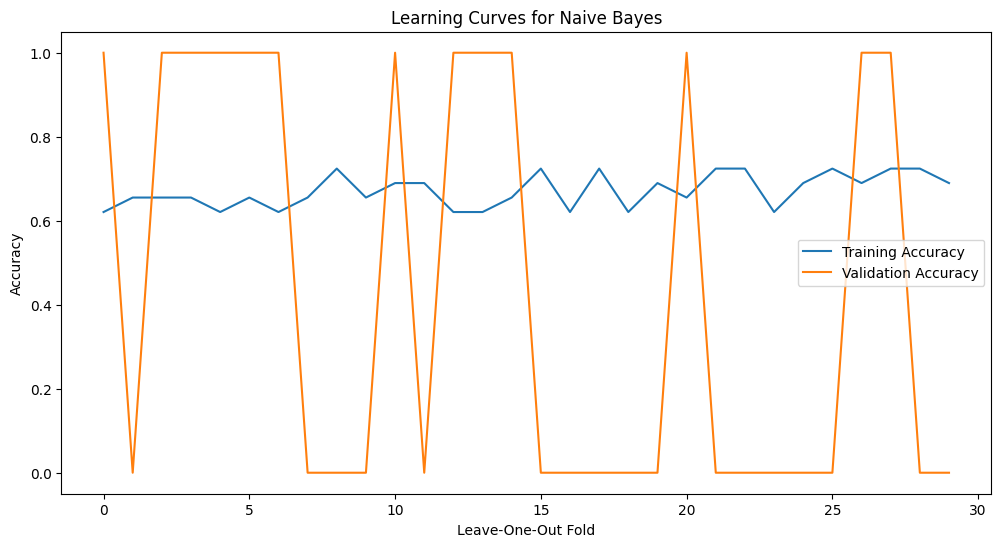

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.2662337662337662
Test Recall: 0.2727272727272727
Test F1-score: 0.2606060606060606
Test Confusion Matrix:
[[2 3]
 [5 1]]


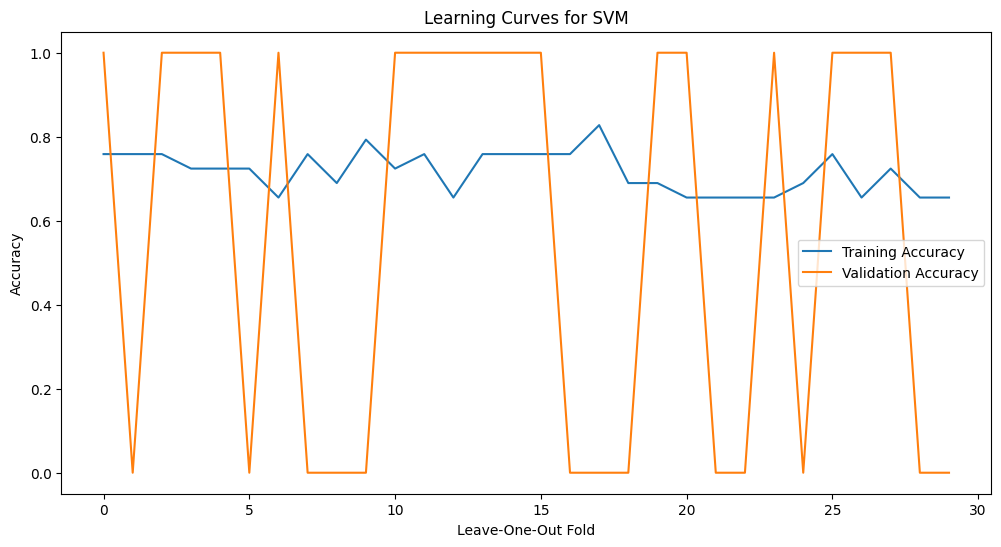

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.36363636363636365
Test Precision: 0.3696969696969697
Test Recall: 0.36363636363636365
Test F1-score: 0.3636363636363636
Test Confusion Matrix:
[[2 3]
 [4 2]]


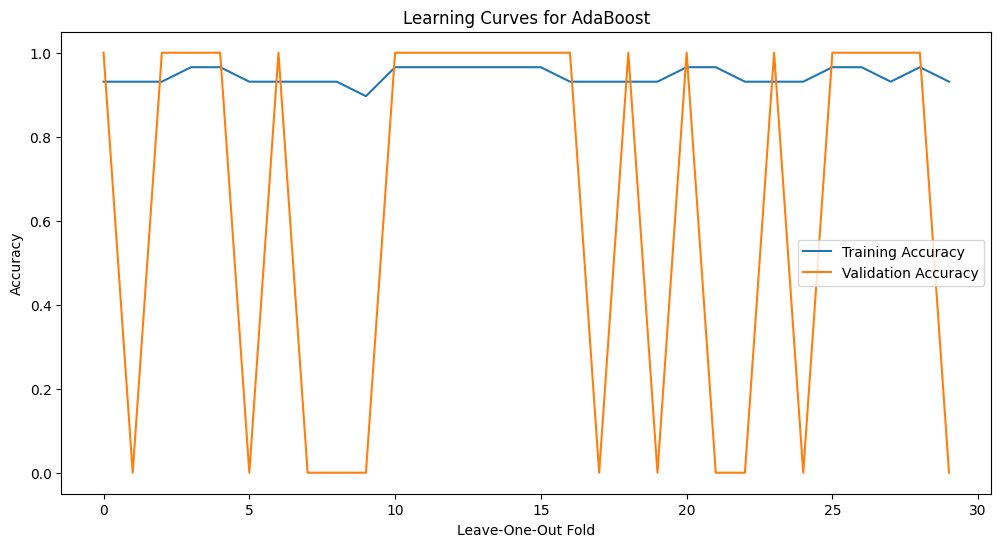

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best F1 Score: 0.4666666666666667
Test Accuracy: 0.2727272727272727
Test Precision: 0.1515151515151515
Test Recall: 0.2727272727272727
Test F1-score: 0.1948051948051948
Test Confusion Matrix:
[[3 2]
 [6 0]]


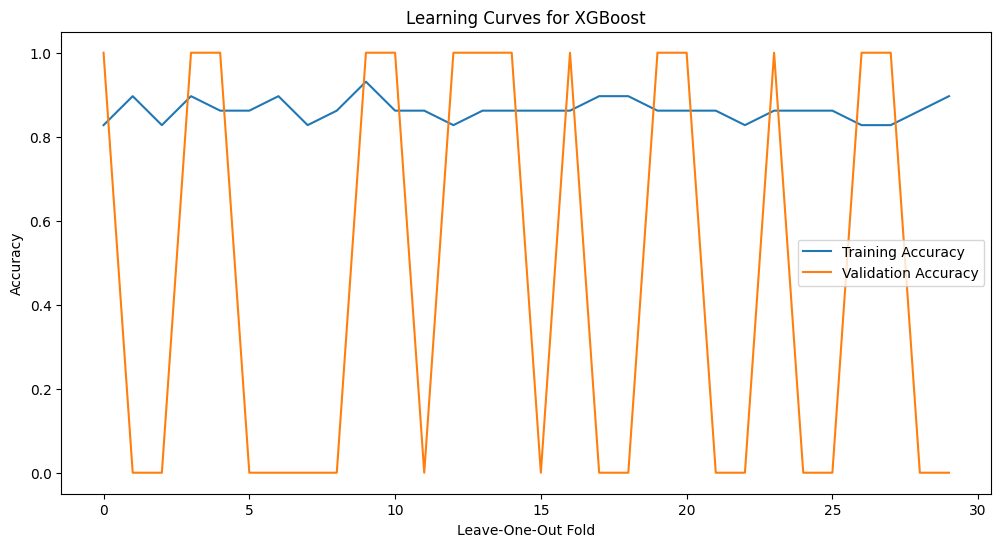

In [ ]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Check the class distribution in the dataset
print("Original class distribution:", Counter(y_train_full))

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Define function to compute learning curves with ADASYN
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ADASYN to the training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        if np.unique(y_train_cv).size > 1:  # Check if there is more than one class
            try:
                X_resampled, y_resampled = adasyn.fit_resample(X_train_cv, y_train_cv)
                if len(y_resampled) > len(y_train_cv):  # Ensure resampling occurred
                    model.fit(X_resampled, y_resampled)
                    train_pred = model.predict(X_resampled)
                    val_pred = model.predict(X_val_cv)

                    # Store metrics
                    train_accuracies.append(accuracy_score(y_resampled, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
                else:
                    print(f"Warning: No samples generated for fold {len(train_accuracies)+1}, using original data")
                    model.fit(X_train_cv, y_train_cv)
                    train_pred = model.predict(X_train_cv)
                    val_pred = model.predict(X_val_cv)
                    train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
            except ValueError as e:
                print(f"Warning: {e} for fold {len(train_accuracies)+1}, using original data")
                model.fit(X_train_cv, y_train_cv)
                train_pred = model.predict(X_train_cv)
                val_pred = model.predict(X_val_cv)
                train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                val_accuracies.append(accuracy_score(y_val_cv, val_pred))
        else:
            # If only one class is present, no resampling needed
            model.fit(X_train_cv, y_train_cv)
            train_pred = model.predict(X_train_cv)
            val_pred = model.predict(X_val_cv)
            train_accuracies.append(accuracy_score(y_train_cv, train_pred))
            val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=LeaveOneOut(),
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ADASYN to the full training data and refit the best model
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                best_model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                best_model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            best_model.fit(X_train_full, y_train_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ADASYN to the full training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            model.fit(X_train_full, y_train_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y4)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=12)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=12)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.2727272727272727
Precision: 0.25
Recall: 0.16666666666666666
F1-score: 0.2
Confusion Matrix:
[[2 3]
 [5 1]]

Classifier: Naive Bayes
Accuracy: 0.36363636363636365
Precision: 0.4
Recall: 0.3333333333333333
F1-score: 0.3636363636363636
Confusion Matrix:
[[2 3]
 [4 2]]

Classifier: SVM
Accuracy: 0.36363636363636365
Precision: 0.42857142857142855
Recall: 0.5
F1-score: 0.4615384615384615
Confusion Matrix:
[[1 4]
 [3 3]]

Classifier: AdaBoost
Accuracy: 0.2727272727272727
Precision: 0.25
Recall: 0.16666666666666666
F1-score: 0.2
Confusion Matrix:
[[2 3]
 [5 1]]

Classifier: XGBoost
Accuracy: 0.2727272727272727
Precision: 0.25
Recall: 0.16666666666666666
F1-score: 0.2
Confusion Matrix:
[[2 3]
 [5 1]]


# **Ranking DJ Contact Time Prediction**

Here you can find the best combination: **ROSE and SVM**

In [ ]:
bin_edges = [0, 21, 41]  # 0-20 (top 20), 21-40 (next 20)

# Define the bin labels
bin_labels = ['top_20', 'next_20']

reviews3 = data['Reviews_DJCont'] = pd.cut(data['Ranking_DJCont'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [ ]:
reviews = []
for i in data['Ranking_DJCont']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_DJCont'] = reviews

In [ ]:
y5 = data['Reviews_DJCont']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_projected, y5, test_size = 0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 13)
(30,)
(11, 13)
(11,)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y5)

## **Rose Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.7333333333333333
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


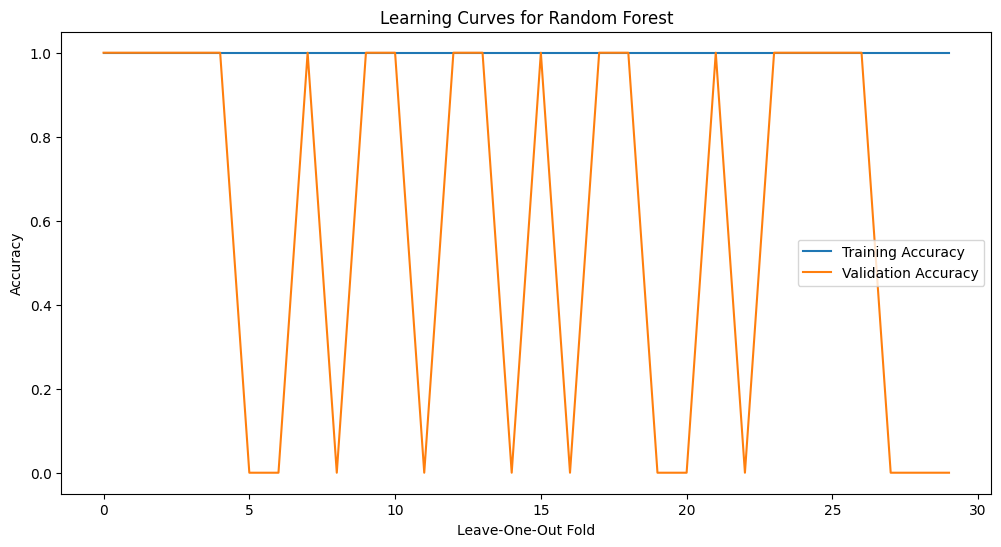

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


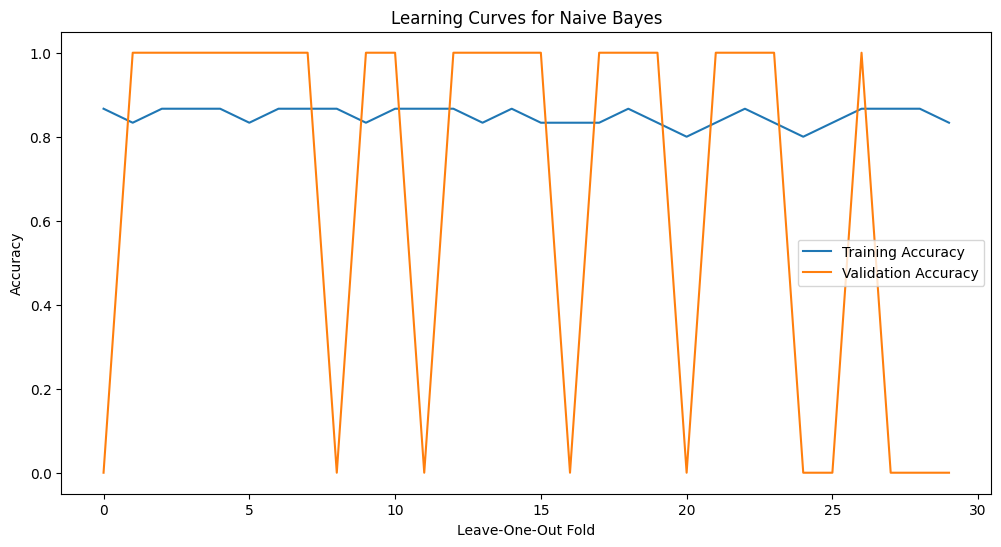

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.7
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[4 2]
 [2 3]]


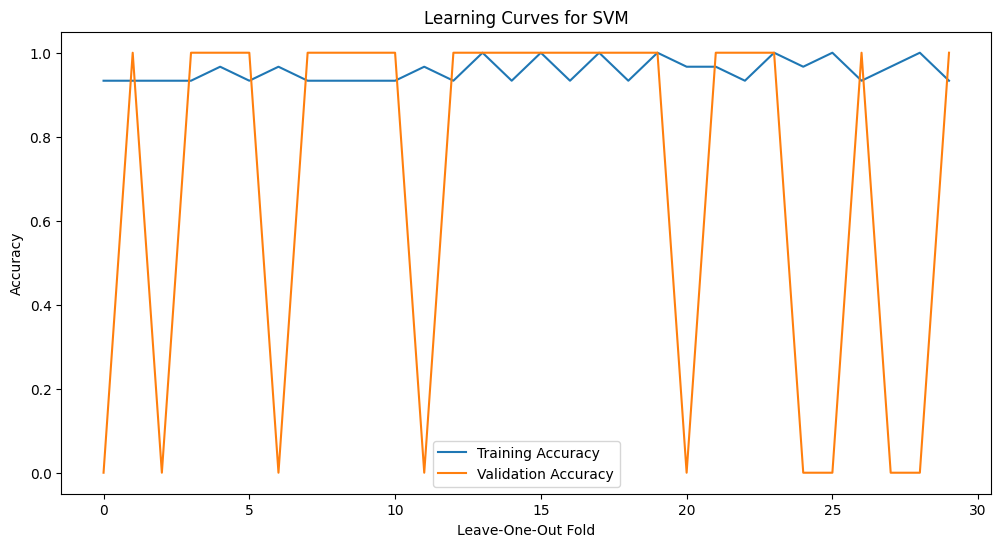

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best F1 Score: 0.8666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


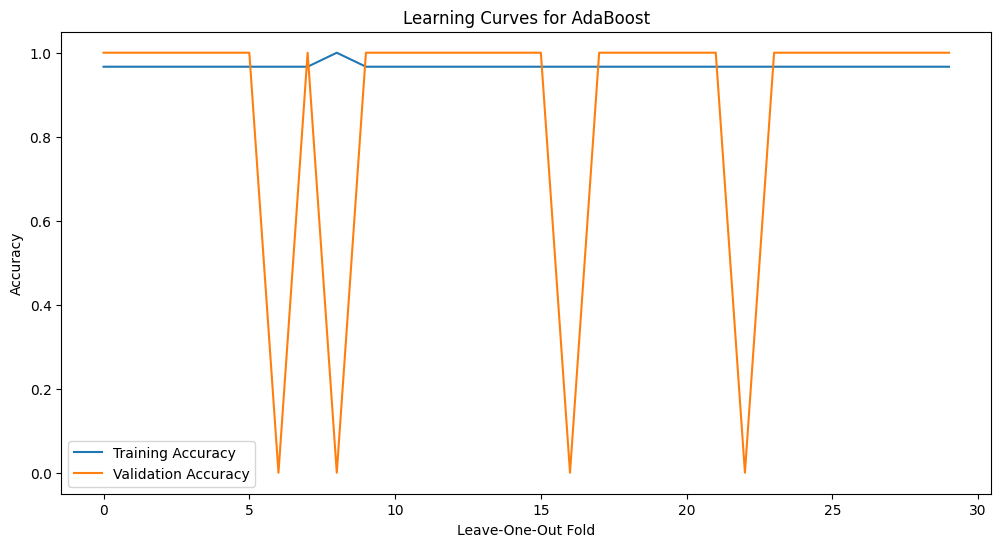

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


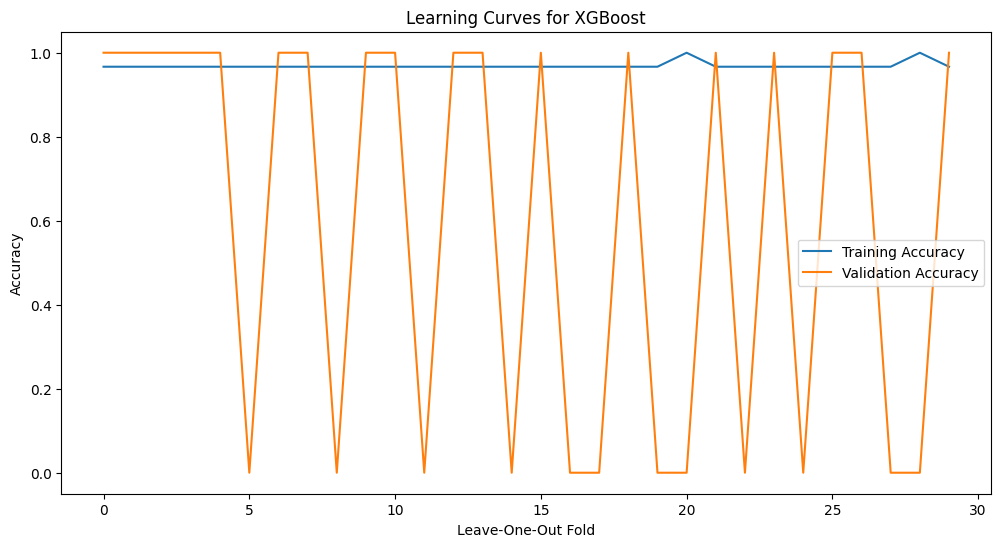

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y5)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1-score: 0.4444444444444444
Confusion Matrix:
[[4 1]
 [4 2]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1-score: 0.4444444444444444
Confusion Matrix:
[[4 1]
 [4 2]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 2]
 [2 4]]

Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]

Classifier: XGBoost
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]



Classifier: Random Forest
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1-score: 0.4444444444444444
Confusion Matrix:
[[4 1]
 [4 2]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 2]
 [2 4]]

Permutation Importance for SVM:
Feature 0: 0.22000000000000006
Feature 1: 0.10333333333333342
Feature 2: 0.04666666666666669
Feature 3: 0.12666666666666676
Feature 4: 0.009999999999999998
Feature 5: 0.023333333333333362
Feature 6: 0.04000000000000002
Feature 7: 0.009999999999999998
Feature 8: 0.006666666666666665
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: 0.0


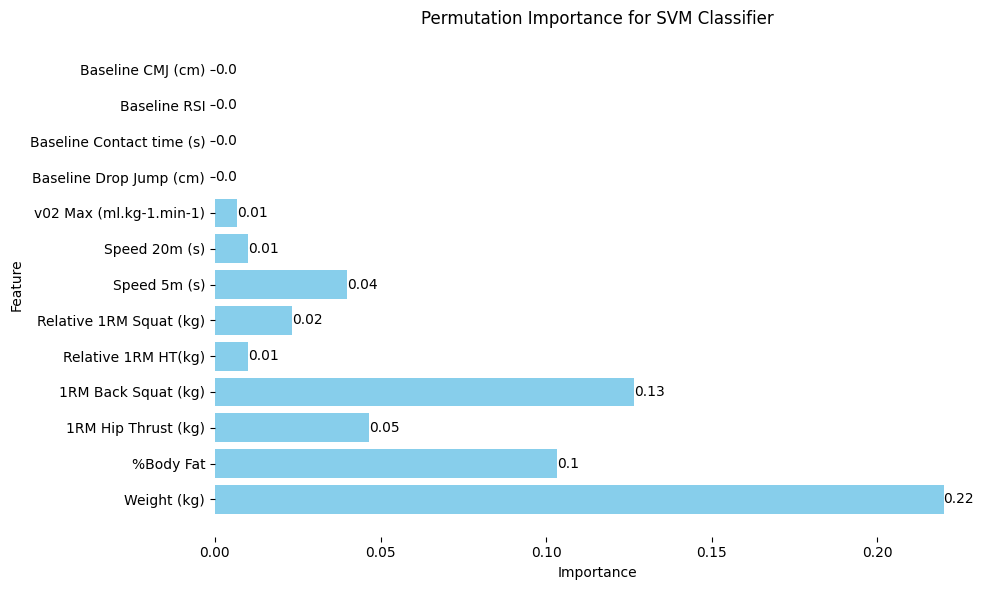


Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]

Classifier: XGBoost
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance  # Added

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y5)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'SVM':
        # Calculate permutation importance
        result = permutation_importance(clf, x_train, y_train, scoring='accuracy', n_repeats=10, random_state=42)
        importances = result.importances_mean

        print(f"\nPermutation Importance for {name}:")
        for idx, importance in enumerate(importances):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot permutation importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, importances, color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Permutation Importance for SVM Classifier')

        # Add text annotations
        for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(importances[idx], 2),
                     va='center', ha='left')

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()


## **SMOTE Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.6666666666666666
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


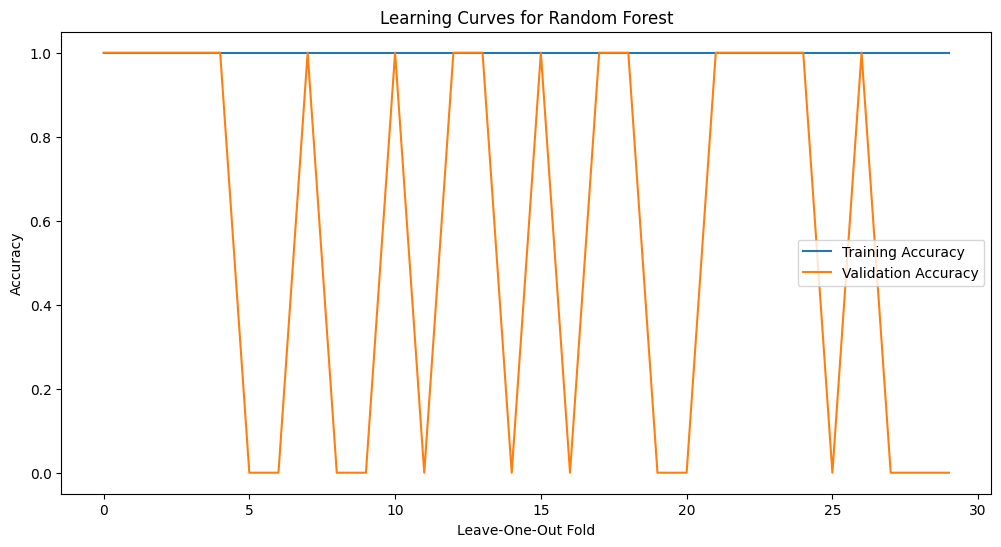

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


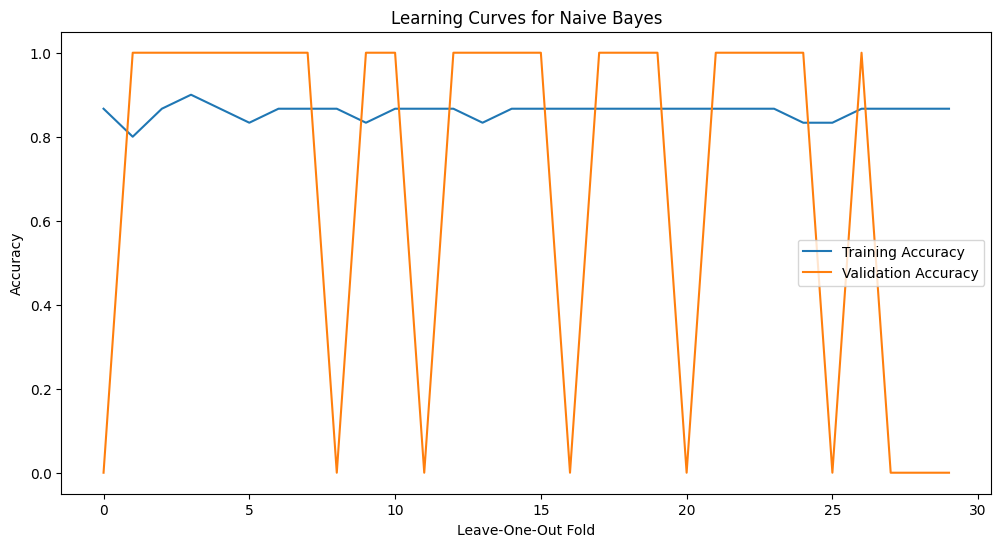

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.7
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[4 2]
 [2 3]]


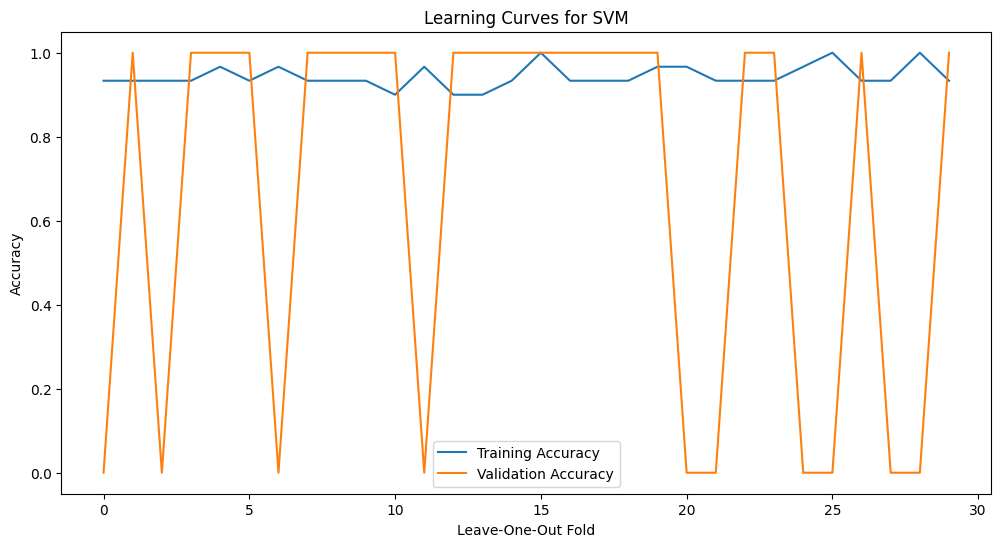

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best F1 Score: 0.8666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


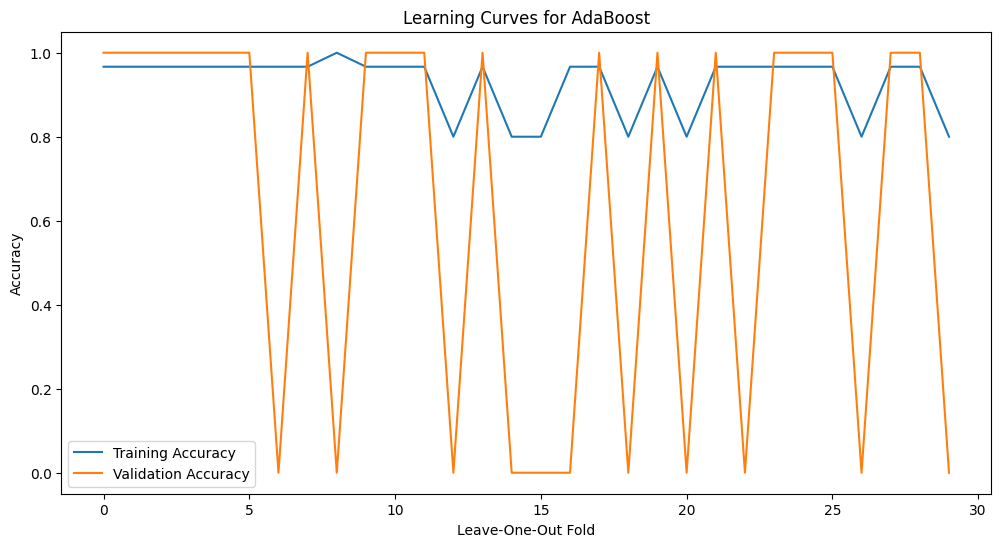

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


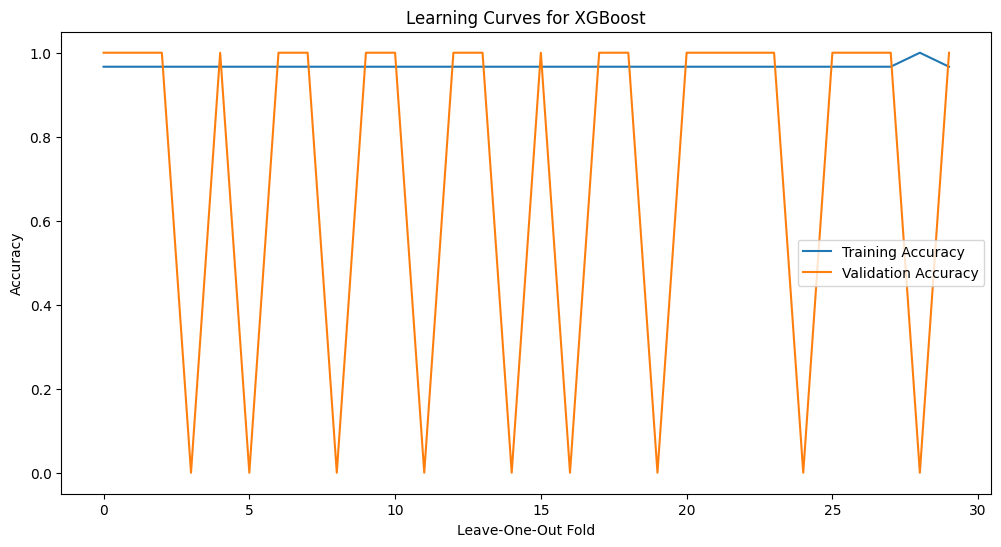

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with SMOTE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply SMOTE to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply SMOTE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()





Feature Importances using Permutation Importance for SVM:
                      Feature  Importance
0                 Weight (kg)    0.024545
1                   %Body Fat    0.027809
2         1RM Hip Thrust (kg)    0.065455
3         1RM Back Squat (kg)    0.074545
4         Relative 1RM HT(kg)    0.081818
5     Relative 1RM Squat (kg)   -0.047646
6                Speed 5m (s)   -0.177366
7               Speed 20m (s)    0.081818
8     v02 Max (ml.kg-1.min-1)    0.081818
9     Baseline Drop Jump (cm)    0.018182
10  Baseline Contact time (s)    0.024545
11               Baseline RSI    0.075758
12          Baseline CMJ (cm)    0.011212


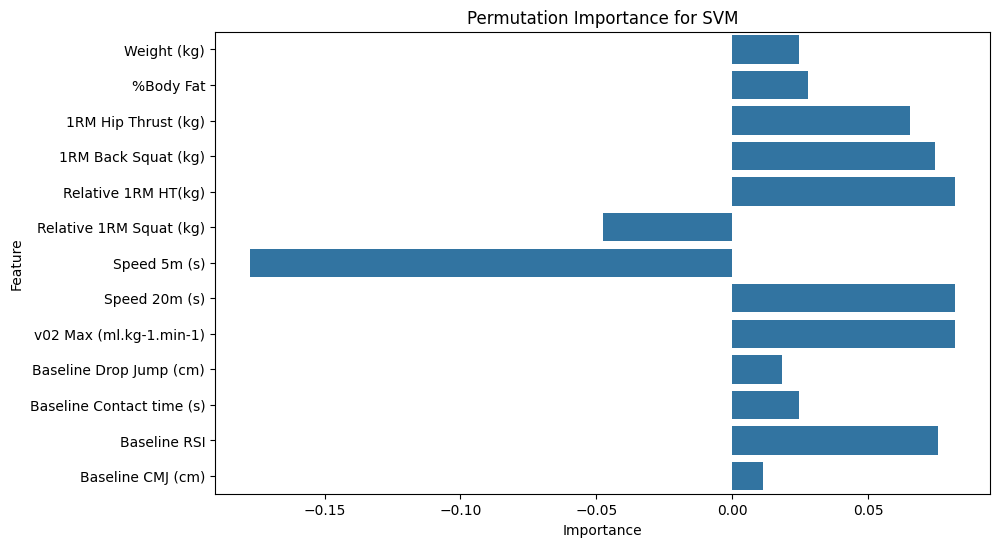

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to check and handle negative values
def preprocess_data(X):
    # Check for negative values
    if (X < 0).any().any():
        print("Warning: Negative values found. Applying Min-Max scaling.")
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
    return X

# Load or split your dataset here
# For example:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Example data preprocessing
X_train_full = preprocess_data(X_train_full)
X_test = preprocess_data(X_test)

# Define SVM model
model = SVC(probability=True, kernel='rbf', random_state=42)  # SVM with probability=True for better handling

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_full, y_train_full)

# Train the model
model.fit(X_resampled, y_resampled)

# Compute permutation importance
def compute_permutation_importance(model, X_test, y_test):
    # Compute permutation importance
    results = permutation_importance(model, X_test, y_test, scoring='f1_weighted', n_repeats=10, random_state=42)
    importance_scores = results.importances_mean

    # Create a DataFrame to show feature importances
    feature_names = df_filtered.columns.tolist()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

    return importance_df

# Compute and print feature importances
importance_df = compute_permutation_importance(model, X_test, y_test)

print(f"\nFeature Importances using Permutation Importance for SVM:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Importance for SVM')
plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y5)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]

Classifier: Naive Bayes
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1-score: 0.4444444444444444
Confusion Matrix:
[[4 1]
 [4 2]]

Classifier: SVM
Accuracy: 0.6363636363636364
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 2]
 [2 4]]

Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[3 2]
 [4 2]]

Classifier: XGBoost
Accuracy: 0.5454545454545454
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 2]
 [3 3]]


## **ADASYN Balacing Method**

### Leave-One-Out

Original class distribution: Counter({0: 15, 1: 15})
Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 Score: 0.7666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


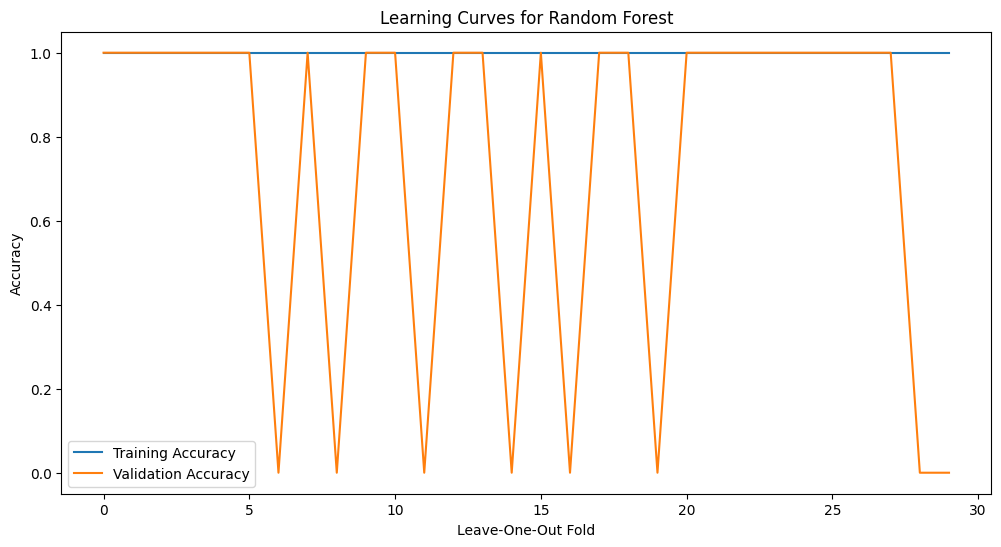

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


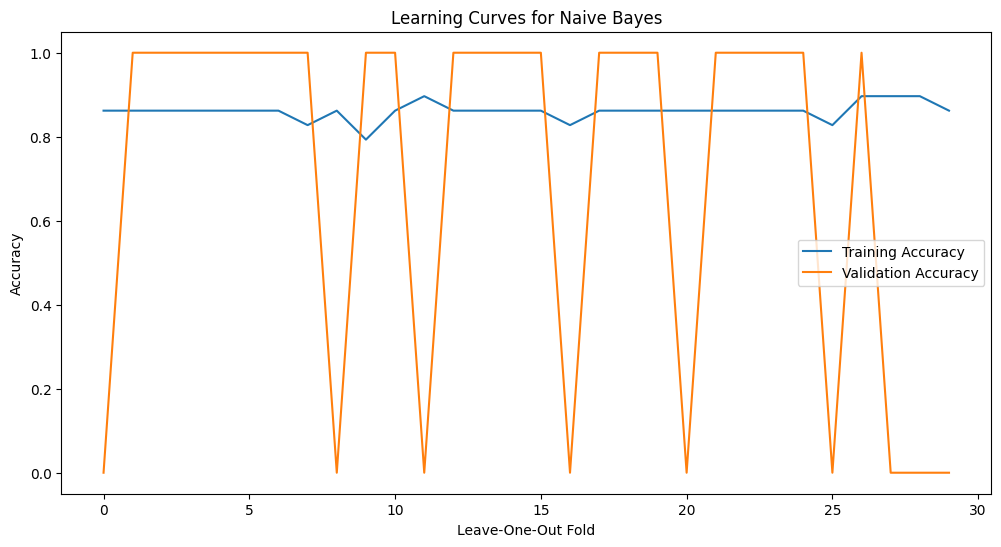

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.7
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[4 2]
 [2 3]]


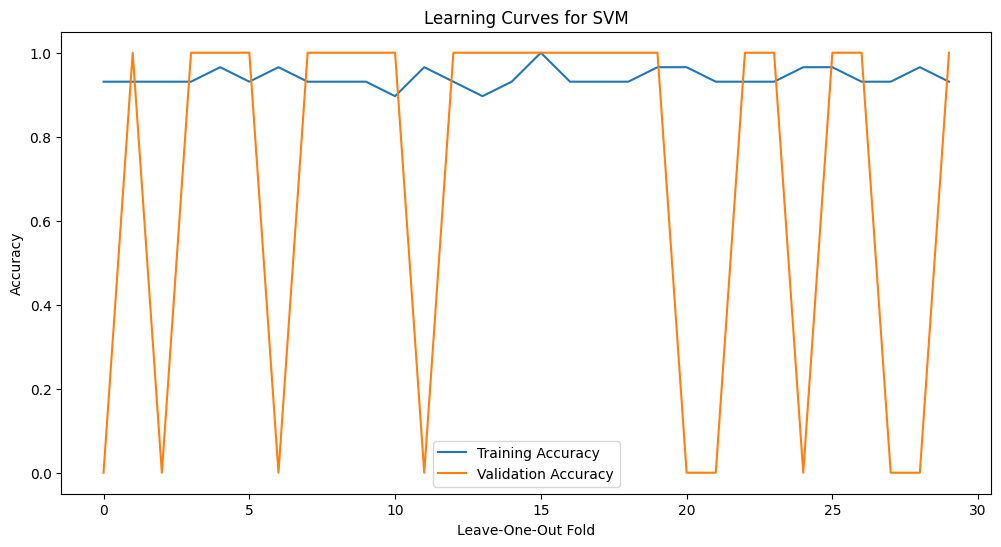

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best F1 Score: 0.8666666666666667
Test Accuracy: 0.45454545454545453
Test Precision: 0.46753246753246747
Test Recall: 0.45454545454545453
Test F1-score: 0.4454545454545455
Test Confusion Matrix:
[[2 4]
 [2 3]]


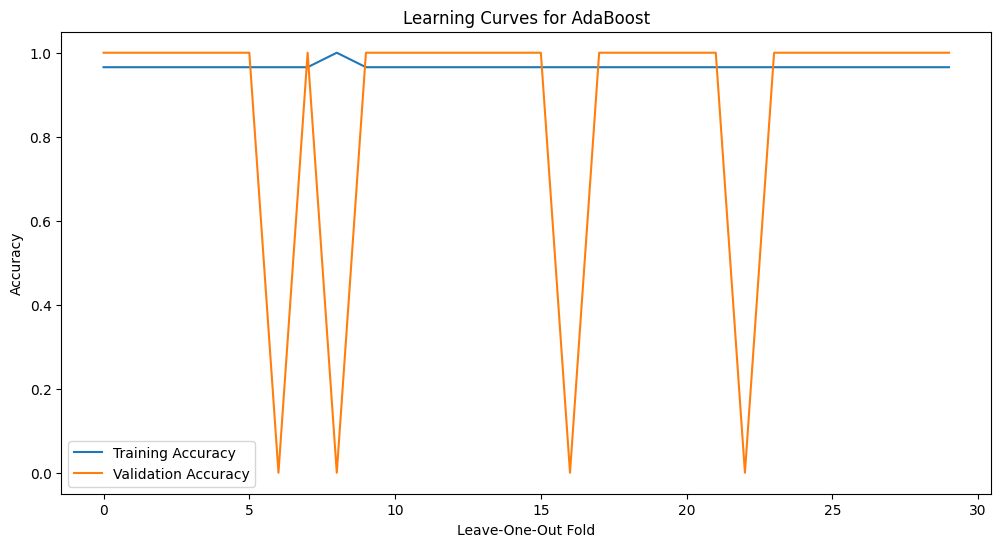

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5909090909090909
Test Recall: 0.5454545454545454
Test F1-score: 0.5221445221445221
Test Confusion Matrix:
[[2 4]
 [1 4]]


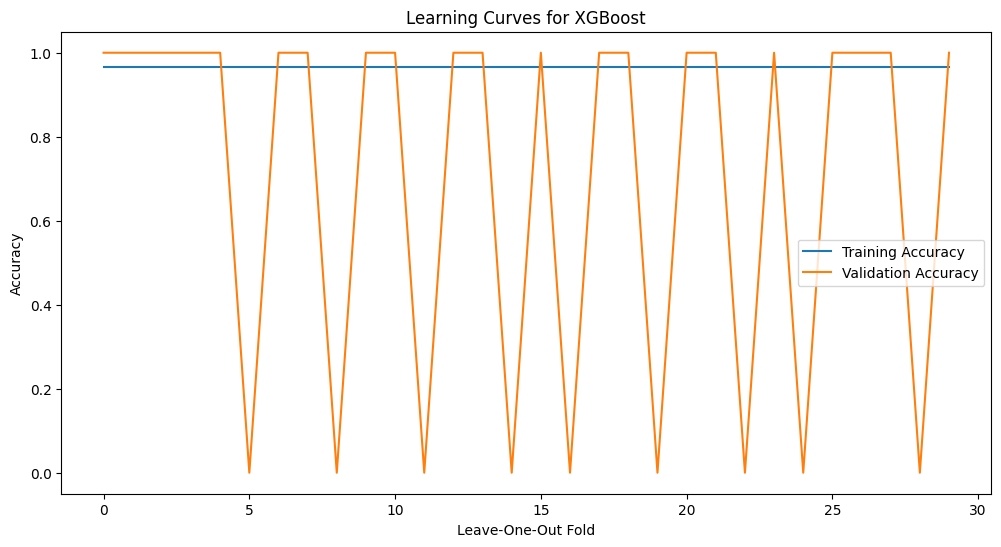

In [ ]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Check the class distribution in the dataset
print("Original class distribution:", Counter(y_train_full))

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Define function to compute learning curves with ADASYN
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ADASYN to the training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        if np.unique(y_train_cv).size > 1:  # Check if there is more than one class
            try:
                X_resampled, y_resampled = adasyn.fit_resample(X_train_cv, y_train_cv)
                if len(y_resampled) > len(y_train_cv):  # Ensure resampling occurred
                    model.fit(X_resampled, y_resampled)
                    train_pred = model.predict(X_resampled)
                    val_pred = model.predict(X_val_cv)

                    # Store metrics
                    train_accuracies.append(accuracy_score(y_resampled, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
                else:
                    print(f"Warning: No samples generated for fold {len(train_accuracies)+1}, using original data")
                    model.fit(X_train_cv, y_train_cv)
                    train_pred = model.predict(X_train_cv)
                    val_pred = model.predict(X_val_cv)
                    train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
            except ValueError as e:
                print(f"Warning: {e} for fold {len(train_accuracies)+1}, using original data")
                model.fit(X_train_cv, y_train_cv)
                train_pred = model.predict(X_train_cv)
                val_pred = model.predict(X_val_cv)
                train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                val_accuracies.append(accuracy_score(y_val_cv, val_pred))
        else:
            # If only one class is present, no resampling needed
            model.fit(X_train_cv, y_train_cv)
            train_pred = model.predict(X_train_cv)
            val_pred = model.predict(X_val_cv)
            train_accuracies.append(accuracy_score(y_train_cv, train_pred))
            val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=LeaveOneOut(),
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ADASYN to the full training data and refit the best model
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                best_model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                best_model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            best_model.fit(X_train_full, y_train_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ADASYN to the full training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            model.fit(X_train_full, y_train_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y5)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=4)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=4)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.36363636363636365
Precision: 0.3333333333333333
Recall: 0.75
F1-score: 0.46153846153846156
Confusion Matrix:
[[1 6]
 [1 3]]

Classifier: Naive Bayes
Accuracy: 0.45454545454545453
Precision: 0.375
Recall: 0.75
F1-score: 0.5
Confusion Matrix:
[[2 5]
 [1 3]]

Classifier: SVM
Accuracy: 0.36363636363636365
Precision: 0.3333333333333333
Recall: 0.75
F1-score: 0.46153846153846156
Confusion Matrix:
[[1 6]
 [1 3]]

Classifier: AdaBoost
Accuracy: 0.45454545454545453
Precision: 0.3333333333333333
Recall: 0.5
F1-score: 0.4
Confusion Matrix:
[[3 4]
 [2 2]]

Classifier: XGBoost
Accuracy: 0.45454545454545453
Precision: 0.375
Recall: 0.75
F1-score: 0.5
Confusion Matrix:
[[2 5]
 [1 3]]


# **Ranking RSI Prediction**

Here you can find the best combination: **ROSE and XGBoost**

Also, you can find here an attempt to find the Principal Component Importance for XGBoost. It is another way to explore the analysis, but I have not included it in the paper.

In [ ]:
bin_edges = [0, 21, 41]  # 0-20 (top 20), 21-40 (next 20)

# Define the bin labels
bin_labels = ['top_20', 'next_20']

reviews3 = data['Reviews_RSI'] = pd.cut(data['Ranking_RSI'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [ ]:
reviews = []
for i in data['Ranking_RSI']:
    if i >= 1 and i <= 21:
        reviews.append('0')
    elif i >= 22 and i <= 41:
        reviews.append('1')

data['Reviews_RSI'] = reviews

In [ ]:
y6 = data['Reviews_RSI']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_projected, y6, test_size = 0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 13)
(30,)
(11, 13)
(11,)


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

## **Rose Balancing Method**

### Leave-One-Out

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with ROSE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ROSE to the training data
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ROSE to the full training data and refit the best model
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ROSE to the full training data
        ros = RandomOverSampler(random_state=42)
        X_resampled_full, y_resampled_full = ros.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()



Fitting 30 folds for each of 36 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")


Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.5714285714285714
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 2]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]



Classifier: Random Forest
Accuracy: 0.5454545454545454
Precision: 0.625
Recall: 0.7142857142857143
F1-score: 0.6666666666666666
Confusion Matrix:
[[1 3]
 [2 5]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.5714285714285714
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 2]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Variable Importance for XGBoost:
Feature 0: 0.07778822630643845
Feature 1: 0.015456626191735268
Feature 2: 0.08261019736528397
Feature 3: 0.07806672900915146
Fe

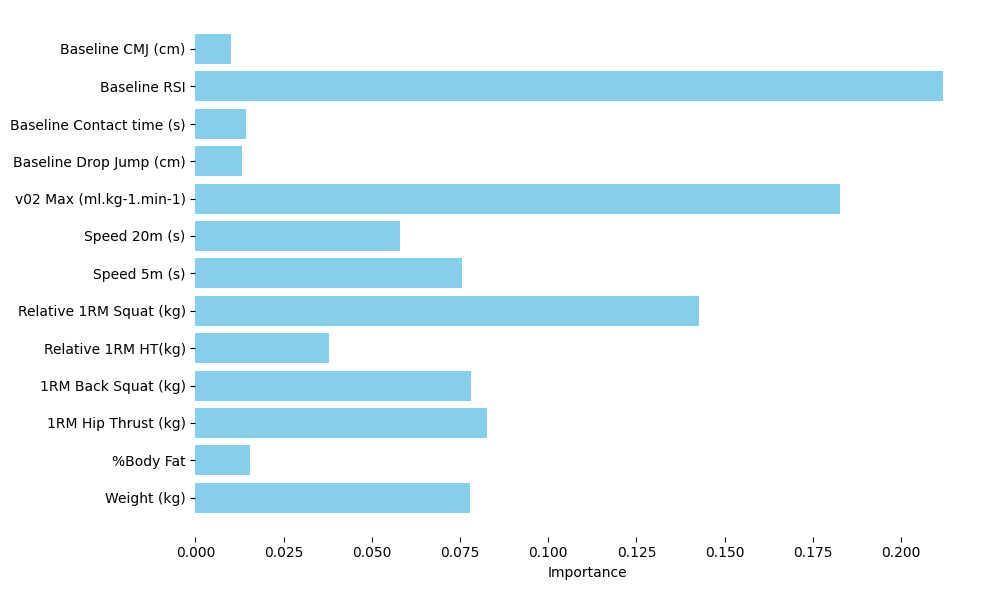

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get variable importance for Random Forest and create a plot
    if name == 'XGBoost':
        variable_importance = clf.feature_importances_
        print(f"\nVariable Importance for {name}:")
        for idx, importance in enumerate(variable_importance):
            print(f"Feature {idx}: {importance}")

        # Get feature names
        feature_names = df_filtered.columns.tolist()  # Assuming X_projected is a DataFrame with column names

        # Plot variable importances with feature names
        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_names, variable_importance, color='skyblue')
        plt.xlabel('Importance')
        #plt.ylabel('Feature')
        #plt.title('Variable Importance for Random Forest Classifier')

        # Add text annotations
        '''for idx, bar in enumerate(bars):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(variable_importance[idx], 2),
                     va='center', ha='left')'''

        plt.tight_layout()
        sns.axes_style("whitegrid")
        sns.despine(left=True, bottom=True)
        plt.show()



Classifier: Random Forest
Accuracy: 0.5454545454545454
Precision: 0.625
Recall: 0.7142857142857143
F1-score: 0.6666666666666666
Confusion Matrix:
[[1 3]
 [2 5]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.5714285714285714
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 2]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Principal Component Importance for XGBoost:
Principal Component 2: 0.08261019736528397
Principal Component 5: 0.14265768229961395
Principal Component 8: 0.18264

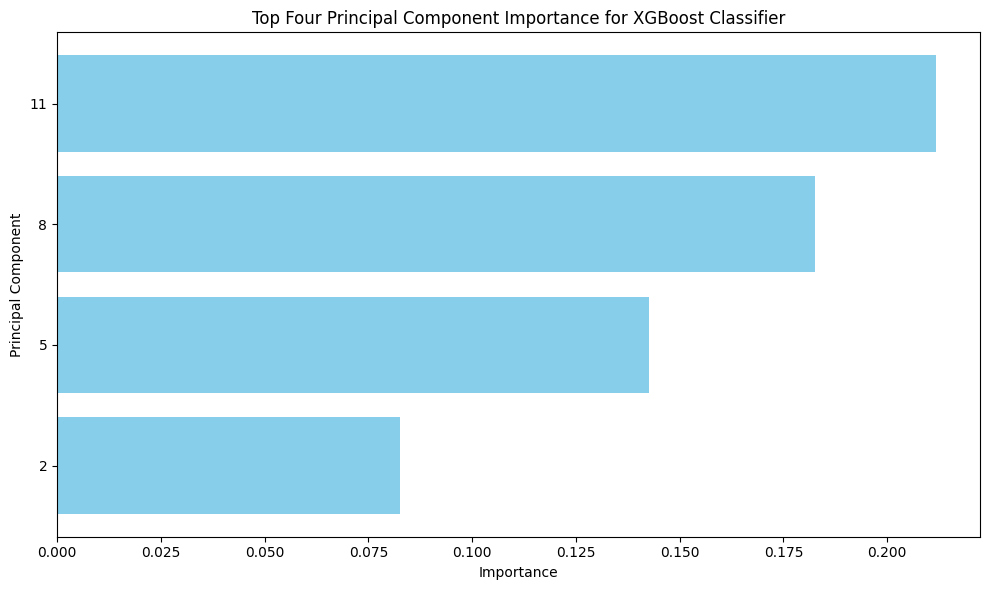

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Get principal component importances for XGBoost and create a plot
    if name == 'XGBoost':
        pca_importance = clf.feature_importances_
        print(f"\nPrincipal Component Importance for {name}:")
        top_components = np.argsort(pca_importance)[-4:]  # Select top four principal components
        top_importance = pca_importance[top_components]

        for idx, importance in zip(top_components, top_importance):
            print(f"Principal Component {idx}: {importance}")

        # Plot principal component importances
        plt.figure(figsize=(10, 6))
        bars = plt.barh(np.arange(len(top_components)), top_importance, color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Principal Component')
        plt.title('Top Four Principal Component Importance for XGBoost Classifier')
        plt.yticks(np.arange(len(top_components)), top_components)
        plt.tight_layout()
        plt.show()


## **SMOTE Balancing Method**

### Leave-One-Out

Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score: 0.7666666666666667
Test Accuracy: 0.7272727272727273
Test Precision: 0.7484848484848485
Test Recall: 0.7272727272727273
Test F1-score: 0.7319347319347319
Test Confusion Matrix:
[[5 2]
 [1 3]]


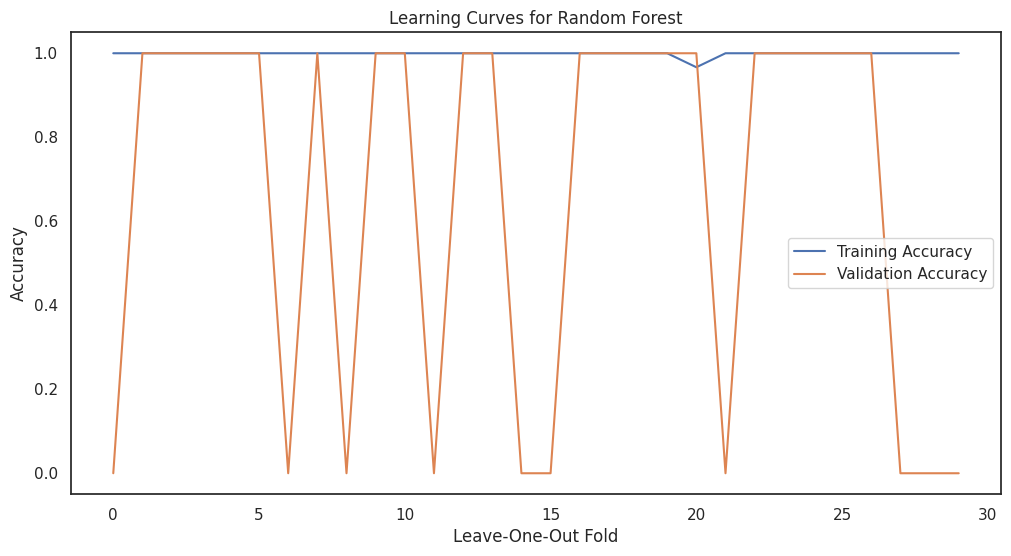

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.7
Test Accuracy: 0.6363636363636364
Test Precision: 0.6363636363636364
Test Recall: 0.6363636363636364
Test F1-score: 0.6363636363636364
Test Confusion Matrix:
[[5 2]
 [2 2]]


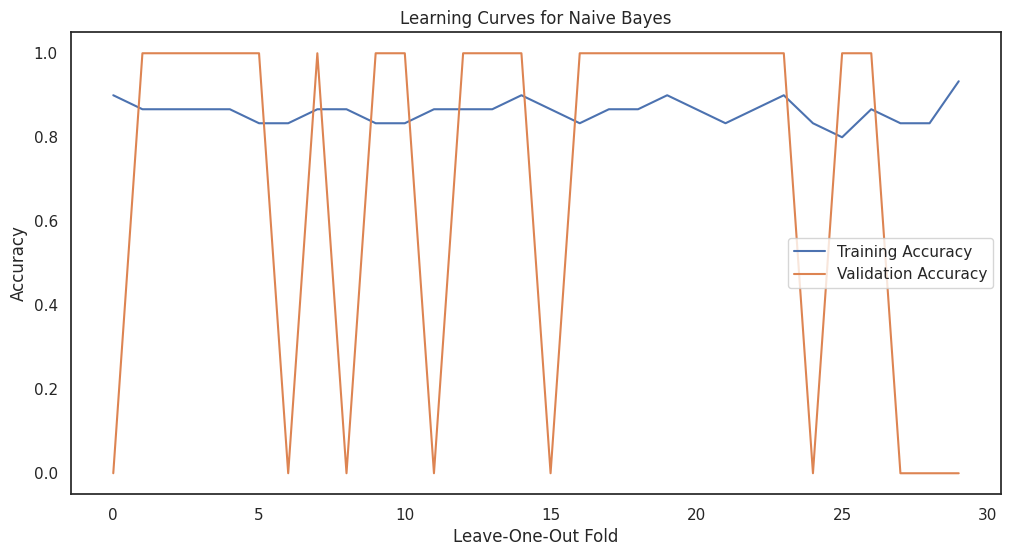

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.5454545454545454
Test Precision: 0.5696969696969696
Test Recall: 0.5454545454545454
Test F1-score: 0.5532245532245532
Test Confusion Matrix:
[[4 3]
 [2 2]]


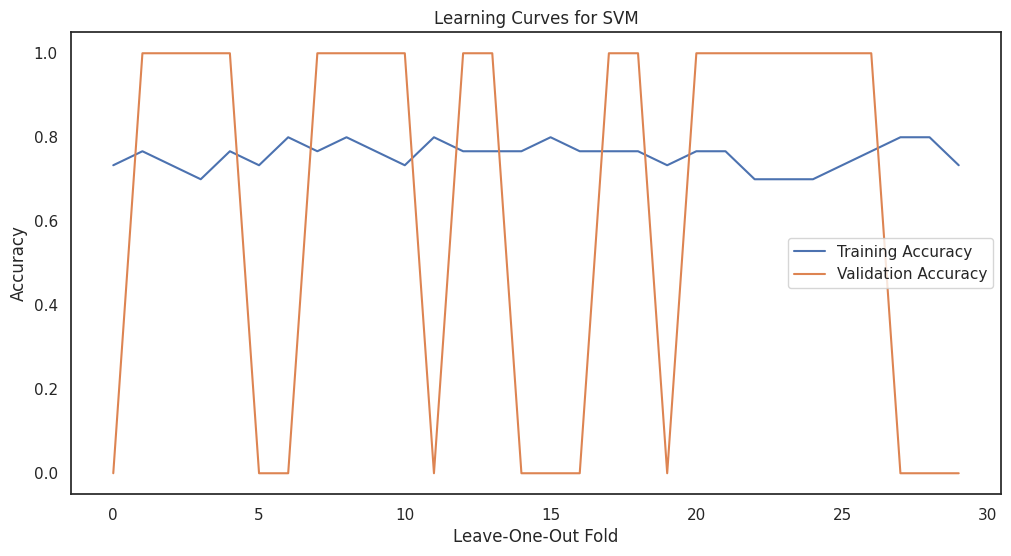

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best F1 Score: 0.7
Test Accuracy: 0.5454545454545454
Test Precision: 0.5696969696969696
Test Recall: 0.5454545454545454
Test F1-score: 0.5532245532245532
Test Confusion Matrix:
[[4 3]
 [2 2]]


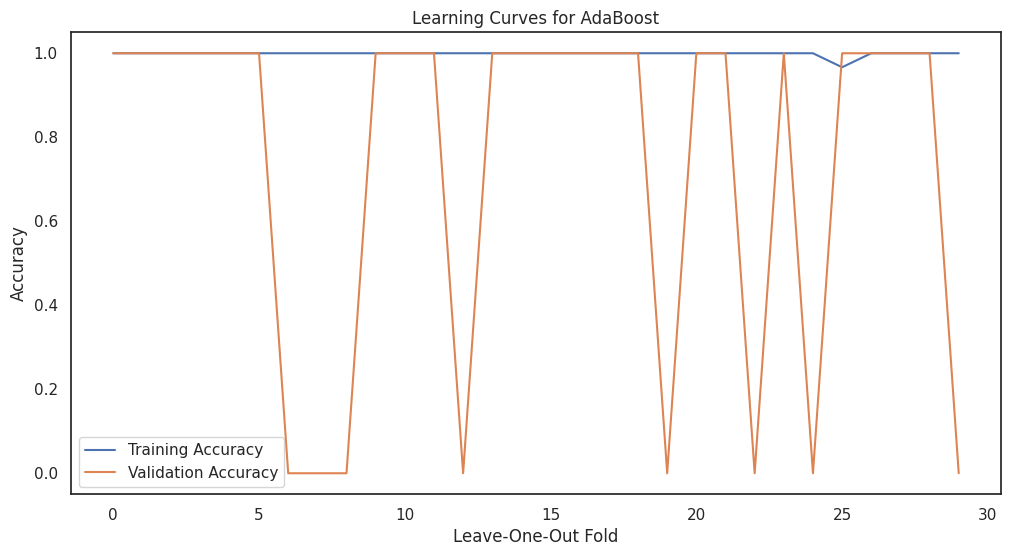

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.45454545454545453
Test Precision: 0.45454545454545453
Test Recall: 0.45454545454545453
Test F1-score: 0.45454545454545453
Test Confusion Matrix:
[[4 3]
 [3 1]]


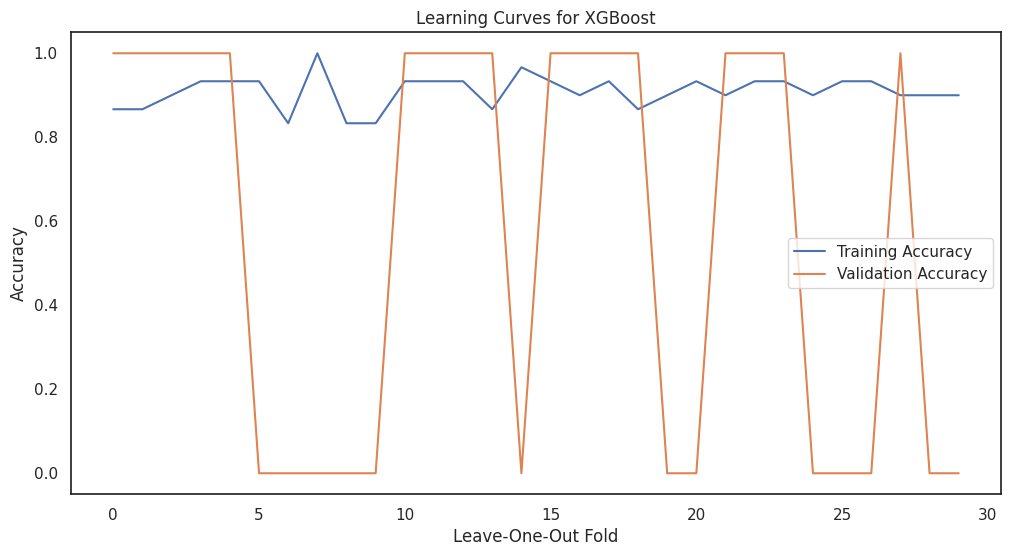

In [ ]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Define function to compute learning curves with SMOTE
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply SMOTE to the training data
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

        model.fit(X_resampled, y_resampled)
        train_pred = model.predict(X_resampled)
        val_pred = model.predict(X_val_cv)

        # Store metrics
        train_accuracies.append(accuracy_score(y_resampled, train_pred))
        val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=loo,
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply SMOTE to the full training data and refit the best model
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        best_model.fit(X_resampled_full, y_resampled_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply SMOTE to the full training data
        smote = SMOTE(random_state=42)
        X_resampled_full, y_resampled_full = smote.fit_resample(X_train_full, y_train_full)
        model.fit(X_resampled_full, y_resampled_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()




  0%|          | 0/11 [00:00<?, ?it/s]

SHAP values shape: (11, 13, 2)

Feature Importances using SHAP for Best AdaBoost Model:
                      Feature  Importance
0                 Weight (kg)    0.000013
1                   %Body Fat    0.001835
2         1RM Hip Thrust (kg)    0.000024
3         1RM Back Squat (kg)    0.000018
4         Relative 1RM HT(kg)    0.000019
5     Relative 1RM Squat (kg)    0.012811
6                Speed 5m (s)    0.001488
7               Speed 20m (s)    0.025190
8     v02 Max (ml.kg-1.min-1)    0.071465
9     Baseline Drop Jump (cm)    0.003740
10  Baseline Contact time (s)    0.000012
11               Baseline RSI    0.018235
12          Baseline CMJ (cm)    0.000480


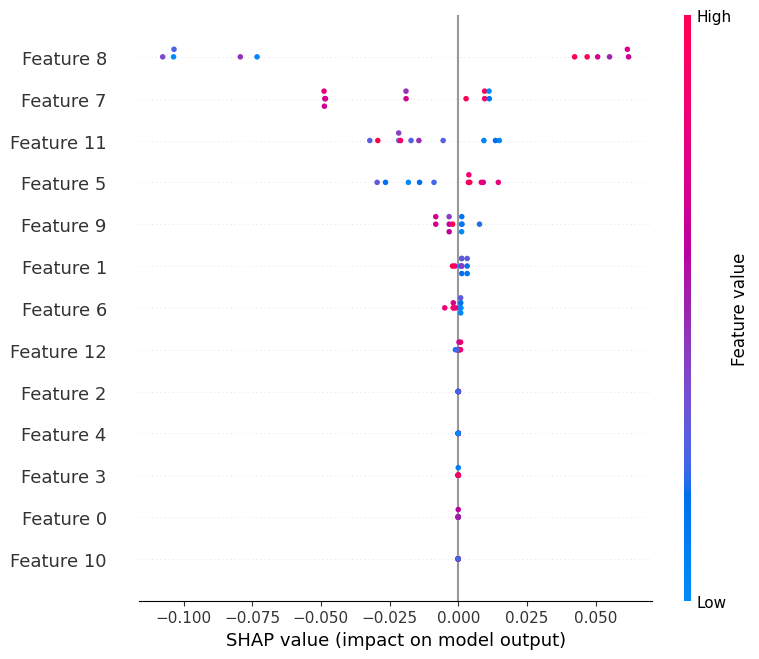

In [ ]:
import shap
import pandas as pd
import numpy as np

# Assuming best_model is the best AdaBoost model obtained from GridSearchCV
# and X_resampled_full is the resampled training data used for fitting best_model

# Define a function to get model predictions
def predict_fn(X):
    return best_model.predict_proba(X)

# Initialize SHAP Explainer
explainer = shap.KernelExplainer(predict_fn, X_resampled_full)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the shape of SHAP values for debugging
print(f"SHAP values shape: {shap_values.shape}")

# Check if SHAP values are a list (binary classification scenario)
if isinstance(shap_values, list):
    # Extract SHAP values for the positive class (usually the second class)
    shap_values_class = shap_values[1]
else:
    # If not a list, assume it's already for the positive class
    shap_values_class = shap_values

# Ensure SHAP values are 2D with shape (num_samples, num_features)
if shap_values_class.ndim == 3:
    # If 3D, handle the case appropriately
    shap_values_class = shap_values_class[:, :, 1]  # Select the SHAP values for the positive class if 3D
elif shap_values_class.ndim != 2:
    raise ValueError(f"Unexpected SHAP values shape: {shap_values_class.shape}")

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.mean(np.abs(shap_values_class), axis=0)

# Get feature names directly from the DataFrame
feature_names = df_filtered.columns.tolist()

# Ensure lengths match
if len(feature_names) != len(mean_shap_values):
    print(f"Length mismatch: feature_names ({len(feature_names)}) != mean_shap_values ({len(mean_shap_values)})")
    # Optionally handle the mismatch here

# Ensure 1D arrays
feature_names = np.array(feature_names).flatten()
mean_shap_values = np.array(mean_shap_values).flatten()

# Create a DataFrame to show feature importances
try:
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': mean_shap_values
    })
    # Print feature importances
    print("\nFeature Importances using SHAP for Best AdaBoost Model:")
    print(importance_df)
except ValueError as e:
    print(f"Error creating DataFrame: {e}")

# Plot SHAP summary plot
shap.summary_plot(shap_values_class, X_test)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Feature Importances using SHAP for Best AdaBoost Model:
                      Feature  Importance
8     v02 Max (ml.kg-1.min-1)    0.061547
11               Baseline RSI    0.018112
5     Relative 1RM Squat (kg)    0.011781
7               Speed 20m (s)    0.007681
9     Baseline Drop Jump (cm)    0.007618
2         1RM Hip Thrust (kg)    0.004790
4         Relative 1RM HT(kg)    0.004040
3         1RM Back Squat (kg)    0.002141
1                   %Body Fat    0.001484
6                Speed 5m (s)    0.001133
12          Baseline CMJ (cm)    0.000929
10  Baseline Contact time (s)    0.000822
0                 Weight (kg)    0.000719


  0%|          | 0/30 [00:00<?, ?it/s]

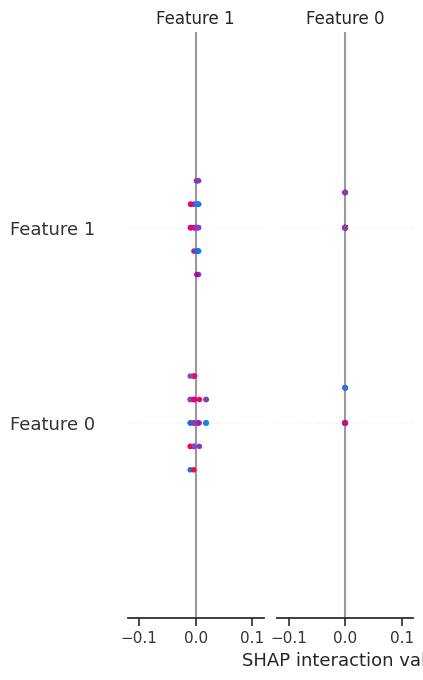

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Define a function to get model predictions
def predict_fn(X, model):
    return model.predict_proba(X)

# Initialize LOO Cross-Validation
loo = LeaveOneOut()

# Initialize list to collect SHAP values for each fold
all_shap_values = []

# Loop through each train-test split
for train_index, test_index in loo.split(X_resampled_full):
    # Split data
    X_train, X_test_fold = X_resampled_full[train_index], X_resampled_full[test_index]
    y_train, y_test_fold = y_resampled_full[train_index], y_resampled_full[test_index]

    # Train the model on the training set
    best_model.fit(X_train, y_train)

    # Initialize SHAP Explainer for the current fold
    explainer = shap.KernelExplainer(lambda x: predict_fn(x, best_model), X_train)

    # Compute SHAP values for the test set in the current fold
    shap_values_fold = explainer.shap_values(X_test_fold)

    # Check if SHAP values are a list (binary classification scenario)
    if isinstance(shap_values_fold, list):
        # Extract SHAP values for the positive class (usually the second class)
        shap_values_fold_class = shap_values_fold[1]
    else:
        # If not a list, assume it's already for the positive class
        shap_values_fold_class = shap_values_fold

    # Ensure SHAP values are 2D with shape (num_samples, num_features)
    if shap_values_fold_class.ndim == 3:
        # If 3D, handle the case appropriately
        shap_values_fold_class = shap_values_fold_class[:, :, 1]  # Select the SHAP values for the positive class if 3D
    elif shap_values_fold_class.ndim != 2:
        raise ValueError(f"Unexpected SHAP values shape: {shap_values_fold_class.shape}")

    # Append SHAP values for the current fold
    all_shap_values.append(shap_values_fold_class)

# Concatenate all SHAP values across folds
all_shap_values = np.vstack(all_shap_values)

# Calculate mean absolute SHAP values for feature importance
mean_shap_values = np.mean(np.abs(all_shap_values), axis=0)

# Get feature names directly from the DataFrame
feature_names = df_filtered.columns.tolist()

# Ensure lengths match
if len(feature_names) != len(mean_shap_values):
    print(f"Length mismatch: feature_names ({len(feature_names)}) != mean_shap_values ({len(mean_shap_values)})")
    # Optionally handle the mismatch here

# Ensure 1D arrays
feature_names = np.array(feature_names).flatten()
mean_shap_values = np.array(mean_shap_values).flatten()

# Create a DataFrame to show feature importances
try:
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': mean_shap_values
    }).sort_values(by='Importance', ascending=False)

    # Print feature importances
    print("\nFeature Importances using SHAP for Best AdaBoost Model:")
    print(importance_df)
except ValueError as e:
    print(f"Error creating DataFrame: {e}")

# Plot SHAP summary plot for the entire dataset (combine all data used)
explainer_full = shap.KernelExplainer(lambda x: predict_fn(x, best_model), X_resampled_full)
shap_values_full = explainer_full.shap_values(X_resampled_full)

# Check if SHAP values are a list (binary classification scenario)
if isinstance(shap_values_full, list):
    # Extract SHAP values for the positive class (usually the second class)
    shap_values_class_full = shap_values_full[1]
else:
    # If not a list, assume it's already for the positive class
    shap_values_class_full = shap_values_full

# Plot SHAP summary plot
shap.summary_plot(shap_values_class_full, X_resampled_full)


In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost':xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: Naive Bayes
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.6666666666666666
Recall: 0.5714285714285714
F1-score: 0.6153846153846153
Confusion Matrix:
[[2 2]
 [3 4]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[2 2]
 [2 5]]

Classifier: XGBoost
Accuracy: 0.7272727272727273
Precision: 0.75
Recall: 0.8571428571428571
F1-score: 0.7999999999999999
Confusion Matrix:
[[2 2]
 [1 6]]


## **ADASYN Balacing Method**

### Leave-One-Out

Original class distribution: Counter({1: 15, 0: 15})
Fitting 30 folds for each of 36 candidates, totalling 1080 fits

Classifier: Random Forest
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.6363636363636364
Test Precision: 0.6909090909090909
Test Recall: 0.6363636363636364
Test F1-score: 0.6424242424242425
Test Confusion Matrix:
[[4 3]
 [1 3]]


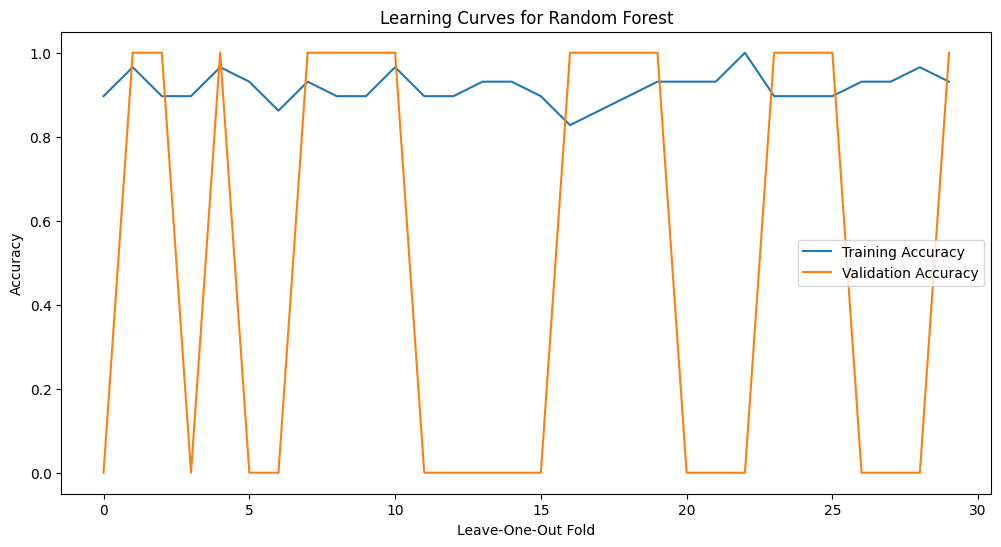

Fitting 30 folds for each of 1 candidates, totalling 30 fits

Classifier: Naive Bayes
Best Parameters: {}
Best F1 Score: 0.5666666666666667
Test Accuracy: 0.6363636363636364
Test Precision: 0.6909090909090909
Test Recall: 0.6363636363636364
Test F1-score: 0.6424242424242425
Test Confusion Matrix:
[[4 3]
 [1 3]]


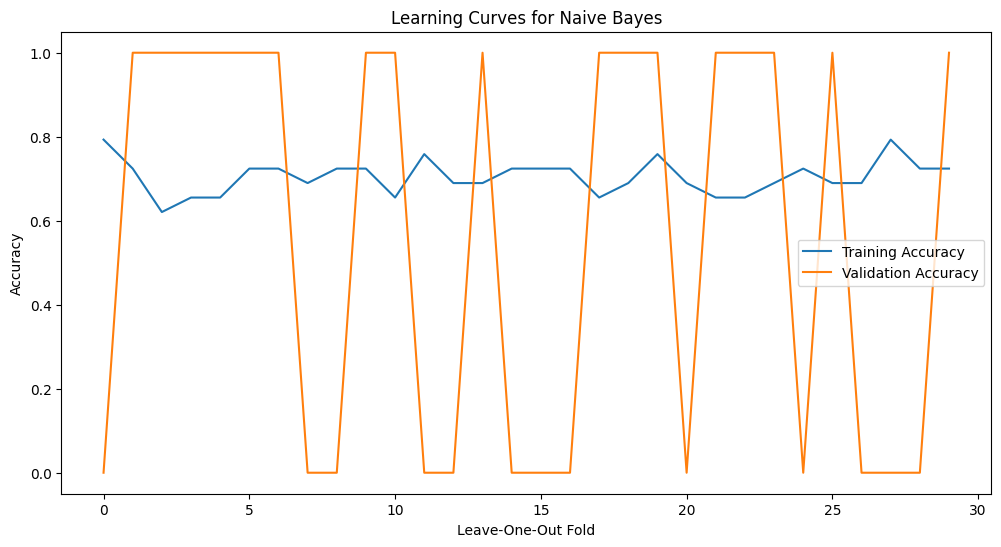

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: SVM
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 Score: 0.6333333333333333
Test Accuracy: 0.5454545454545454
Test Precision: 0.5696969696969696
Test Recall: 0.5454545454545454
Test F1-score: 0.5532245532245532
Test Confusion Matrix:
[[4 3]
 [2 2]]


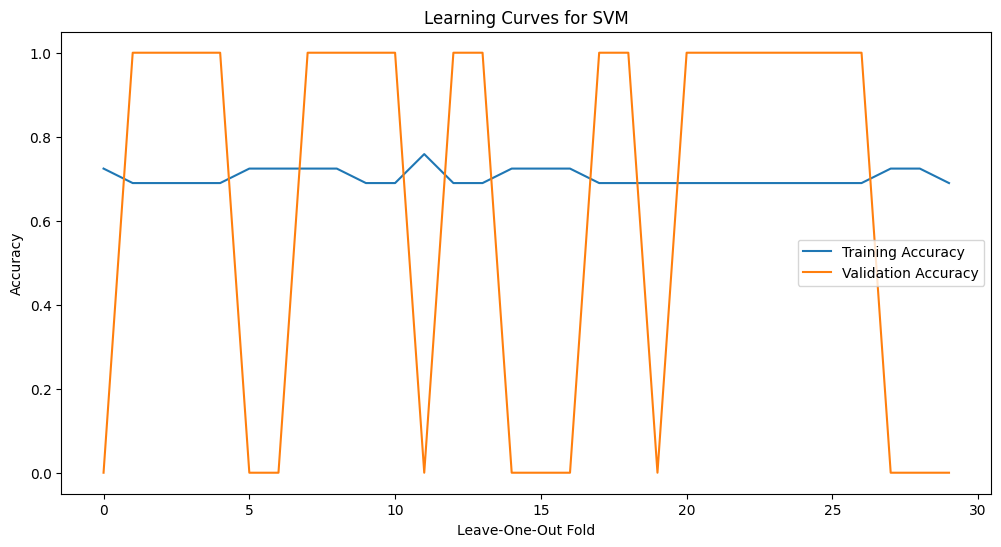

Fitting 30 folds for each of 12 candidates, totalling 360 fits

Classifier: AdaBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
Best F1 Score: 0.6666666666666666
Test Accuracy: 0.8181818181818182
Test Precision: 0.8181818181818182
Test Recall: 0.8181818181818182
Test F1-score: 0.8181818181818182
Test Confusion Matrix:
[[6 1]
 [1 3]]


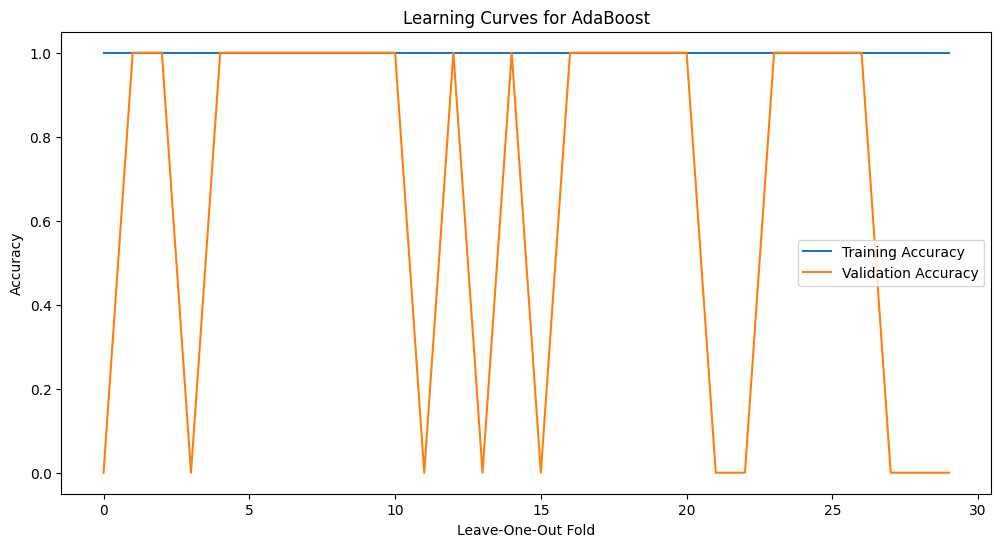

Fitting 30 folds for each of 27 candidates, totalling 810 fits

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
Best F1 Score: 0.5333333333333333
Test Accuracy: 0.5454545454545454
Test Precision: 0.6331168831168831
Test Recall: 0.5454545454545454
Test F1-score: 0.5454545454545454
Test Confusion Matrix:
[[3 4]
 [1 3]]


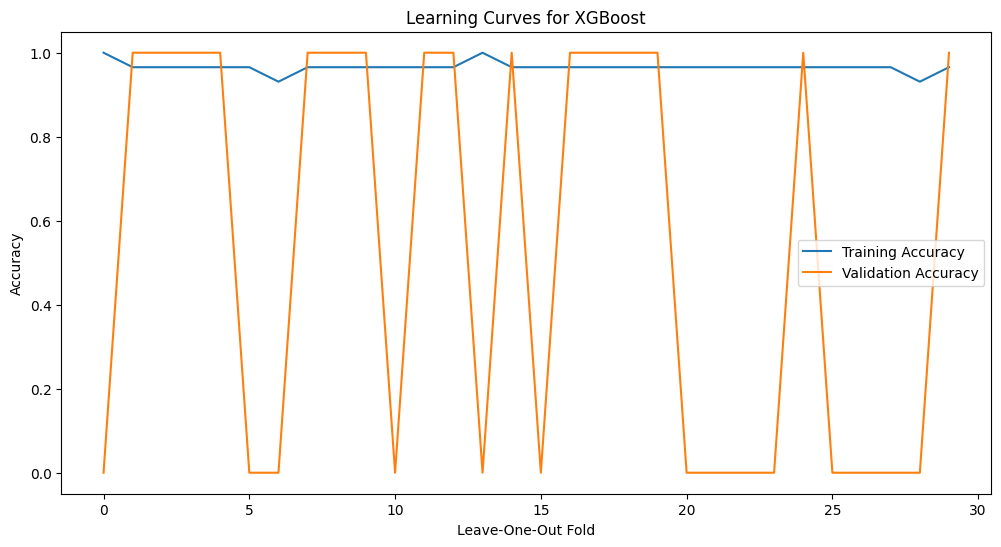

In [ ]:
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Check the class distribution in the dataset
print("Original class distribution:", Counter(y_train_full))

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Naive Bayes': {},
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

X_train_full, X_test, y_train_full, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Define function to compute learning curves with ADASYN
def compute_learning_curves(model, X, y):
    train_accuracies = []
    val_accuracies = []

    loo = LeaveOneOut()

    for train_index, val_index in loo.split(X):
        X_train_cv, X_val_cv = X[train_index], X[val_index]
        y_train_cv, y_val_cv = y[train_index], y[val_index]

        # Apply ADASYN to the training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        if np.unique(y_train_cv).size > 1:  # Check if there is more than one class
            try:
                X_resampled, y_resampled = adasyn.fit_resample(X_train_cv, y_train_cv)
                if len(y_resampled) > len(y_train_cv):  # Ensure resampling occurred
                    model.fit(X_resampled, y_resampled)
                    train_pred = model.predict(X_resampled)
                    val_pred = model.predict(X_val_cv)

                    # Store metrics
                    train_accuracies.append(accuracy_score(y_resampled, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
                else:
                    print(f"Warning: No samples generated for fold {len(train_accuracies)+1}, using original data")
                    model.fit(X_train_cv, y_train_cv)
                    train_pred = model.predict(X_train_cv)
                    val_pred = model.predict(X_val_cv)
                    train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                    val_accuracies.append(accuracy_score(y_val_cv, val_pred))
            except ValueError as e:
                print(f"Warning: {e} for fold {len(train_accuracies)+1}, using original data")
                model.fit(X_train_cv, y_train_cv)
                train_pred = model.predict(X_train_cv)
                val_pred = model.predict(X_val_cv)
                train_accuracies.append(accuracy_score(y_train_cv, train_pred))
                val_accuracies.append(accuracy_score(y_val_cv, val_pred))
        else:
            # If only one class is present, no resampling needed
            model.fit(X_train_cv, y_train_cv)
            train_pred = model.predict(X_train_cv)
            val_pred = model.predict(X_val_cv)
            train_accuracies.append(accuracy_score(y_train_cv, train_pred))
            val_accuracies.append(accuracy_score(y_val_cv, val_pred))

    return train_accuracies, val_accuracies

# Perform Grid Search with LOOCV
for name, model in classifiers.items():
    if name in param_grids:
        # Configure GridSearchCV
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='f1_weighted',
            cv=LeaveOneOut(),
            n_jobs=-1,
            verbose=1
        )
        # Fit GridSearchCV with LOOCV
        grid_search.fit(X_train_full, y_train_full)

        print(f"\nClassifier: {name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score: {grid_search.best_score_}")

        # Retrieve the best model
        best_model = grid_search.best_estimator_

        # Apply ADASYN to the full training data and refit the best model
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                best_model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                best_model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            best_model.fit(X_train_full, y_train_full)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(best_model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()

    else:
        # For classifiers without hyperparameter tuning
        # Apply ADASYN to the full training data
        adasyn = ADASYN(random_state=42, sampling_strategy='auto')  # Set sampling_strategy to 'auto'
        try:
            X_resampled_full, y_resampled_full = adasyn.fit_resample(X_train_full, y_train_full)
            if len(y_resampled_full) > len(y_train_full):  # Ensure resampling occurred
                model.fit(X_resampled_full, y_resampled_full)
            else:
                print(f"Warning: No samples generated, using original data")
                model.fit(X_train_full, y_train_full)
        except ValueError as e:
            print(f"Warning: {e}, using original data")
            model.fit(X_train_full, y_train_full)

        y_test_pred = model.predict(X_test)

        acc_test = accuracy_score(y_test, y_test_pred)
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        conf_matrix_test = confusion_matrix(y_test, y_test_pred)

        print(f"\nClassifier: {name}")
        print(f"Test Accuracy: {acc_test}")
        print(f"Test Precision: {precision_test}")
        print(f"Test Recall: {recall_test}")
        print(f"Test F1-score: {f1_test}")
        print(f"Test Confusion Matrix:\n{conf_matrix_test}")

        # Compute learning curves
        train_accuracies, val_accuracies = compute_learning_curves(model, X_train_full, y_train_full)

        plt.figure(figsize=(12, 6))
        plt.plot(train_accuracies, label='Training Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Leave-One-Out Fold')
        plt.ylabel('Accuracy')
        plt.title(f'Learning Curves for {name}')
        plt.legend()
        plt.show()


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y6)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_projected, y_encoded, test_size=0.25, random_state=4)

# Initialize classifiers
rf = RandomForestClassifier()
nb = GaussianNB()
svm = SVC()
ada = AdaBoostClassifier()
xgb = XGBClassifier()


# Apply ADASYN to training data
adasyn = ADASYN(random_state=4)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

# Train and evaluate classifiers
classifiers = {'Random Forest': rf, 'Naive Bayes': nb, 'SVM': svm, 'AdaBoost': ada, 'XGBoost': xgb}
for name, clf in classifiers.items():
    clf.fit(x_resampled, y_resampled)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\nClassifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Classifier: Random Forest
Accuracy: 0.45454545454545453
Precision: 0.6666666666666666
Recall: 0.2857142857142857
F1-score: 0.4
Confusion Matrix:
[[3 1]
 [5 2]]

Classifier: Naive Bayes
Accuracy: 0.7272727272727273
Precision: 1.0
Recall: 0.5714285714285714
F1-score: 0.7272727272727273
Confusion Matrix:
[[4 0]
 [3 4]]

Classifier: SVM
Accuracy: 0.5454545454545454
Precision: 0.75
Recall: 0.42857142857142855
F1-score: 0.5454545454545454
Confusion Matrix:
[[3 1]
 [4 3]]

Classifier: AdaBoost
Accuracy: 0.6363636363636364
Precision: 0.8
Recall: 0.5714285714285714
F1-score: 0.6666666666666666
Confusion Matrix:
[[3 1]
 [3 4]]

Classifier: XGBoost
Accuracy: 0.45454545454545453
Precision: 0.5714285714285714
Recall: 0.5714285714285714
F1-score: 0.5714285714285714
Confusion Matrix:
[[1 3]
 [3 4]]


# Teste

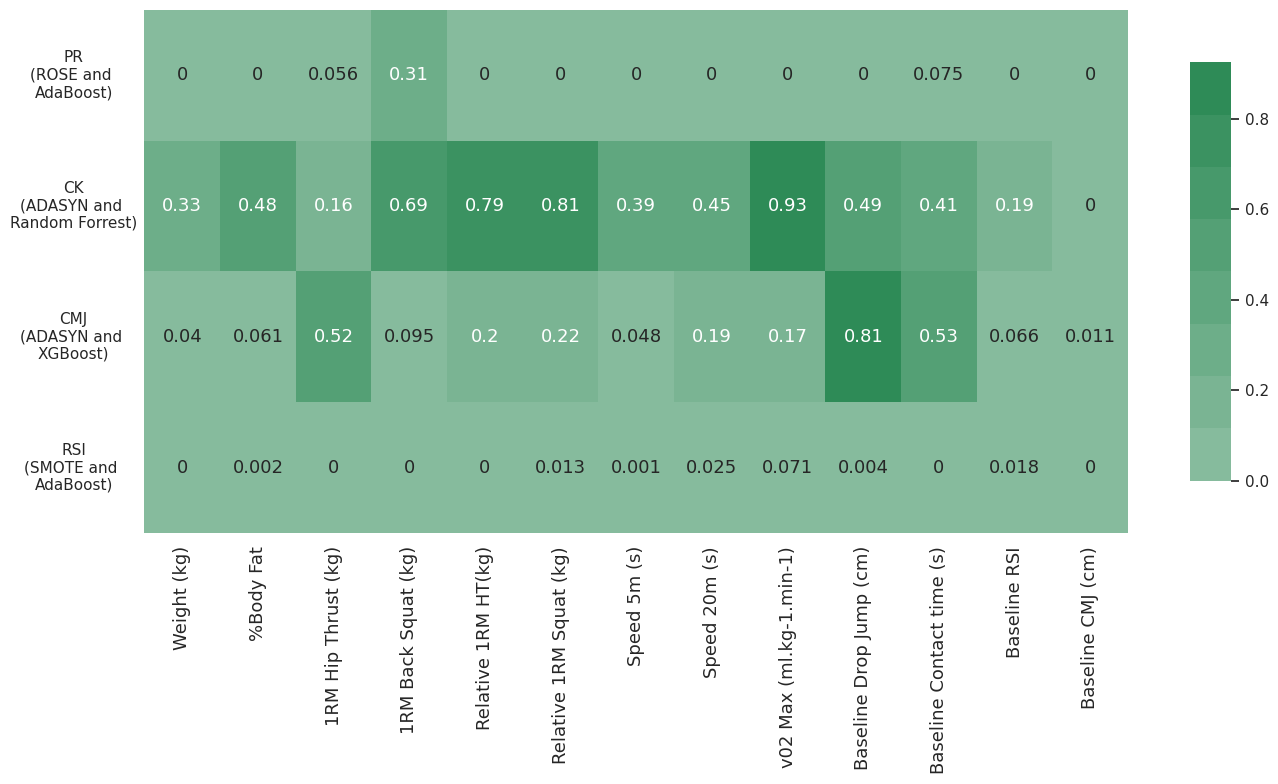

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature names
feature_names = [
    'Weight (kg)', '%Body Fat', '1RM Hip Thrust (kg)', '1RM Back Squat (kg)',
    'Relative 1RM HT(kg)', 'Relative 1RM Squat (kg)', 'Speed 5m (s)',
    'Speed 20m (s)', 'v02 Max (ml.kg-1.min-1)', 'Baseline Drop Jump (cm)',
    'Baseline Contact time (s)', 'Baseline RSI', 'Baseline CMJ (cm)'
]

# Define the data
data3 = {
    'PR\n(ROSE and \nAdaBoost)': [
        0.000, 0.000, 0.056, 0.308, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.075, 0.000, 0.000
    ],
    'CK\n(ADASYN and \nRandom Forrest)': [
        0.331, 0.479, 0.158, 0.688, 0.790, 0.809, 0.391, 0.451, 0.925, 0.493, 0.412, 0.193, 0.000
    ],
    'CMJ\n(ADASYN and \nXGBoost)': [
        0.040, 0.061, 0.523, 0.095, 0.204, 0.218, 0.048, 0.191, 0.169, 0.810, 0.532, 0.066, 0.011
    ],
    'RSI\n(SMOTE and \nAdaBoost)': [
        0,
0.002,
0,
0,
0,
0.013,
0.001,
0.025,
0.071,
0.004,
0,
0.018,
0]
}

palette = sns.light_palette("seagreen", 16)

# Create DataFrame
df_filtered2 = pd.DataFrame(data3, index=feature_names)

# Create the heatmap with a color map that handles both positive and negative values
plt.figure(figsize=(14, 8))
ax = sns.heatmap(df_filtered2.T, annot=True, cmap=palette,
                 annot_kws={"size": 13}, center=0, cbar_kws={"shrink": .8, "aspect": 10, "pad": 0.05})

# Set y-axis labels and title
ax.set_yticklabels(df_filtered2.columns, rotation=0,ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=11, pad=45)
ax.tick_params(axis='x', labelsize=11)
ax.set_xticklabels(df_filtered2.index,  ha='center', fontsize=13)  # Manually set xticklabels

# Add title
#plt.title('Feature Importances for Different Models and Variables', size=20)

# Adjust layout to fit labels
plt.tight_layout()

# Save and show the plot
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()


### SVM and Nayve Bayes Permutation Importance

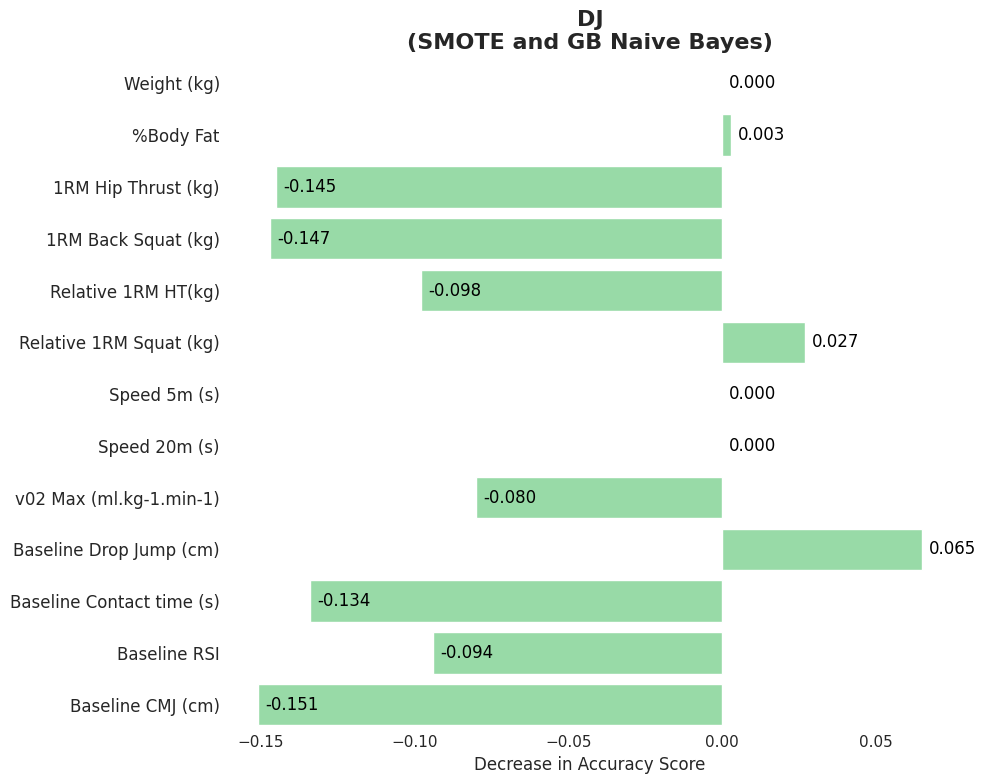

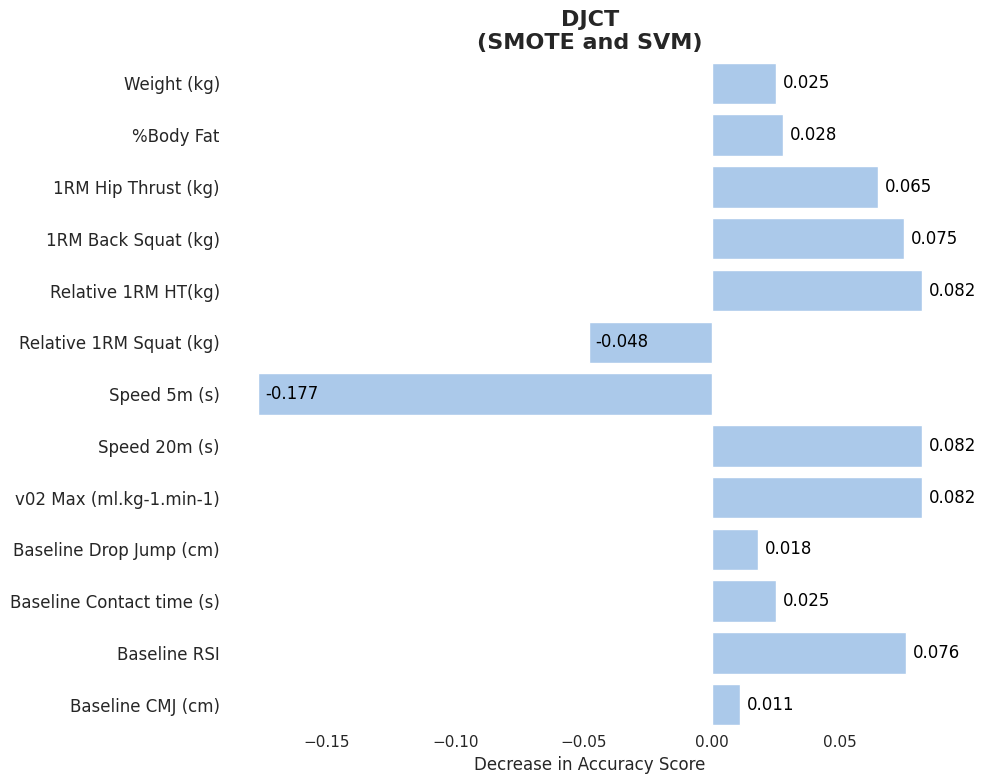

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming data3 is your feature importance dictionary
data3 = {
    'PR\n(ROSE and \nAdaBoost)': [0.000, 0.000, 0.056, 0.308, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.075, 0.000, 0.000],
    'CK\n(ADASYN and \nRandom Forrest)': [0.331, 0.479, 0.158, 0.688, 0.790, 0.809, 0.391, 0.451, 0.925, 0.493, 0.412, 0.193, 0.000],
    'CMJ\n(ADASYN and \nXGBoost)': [0.040, 0.061, 0.523, 0.095, 0.204, 0.218, 0.048, 0.191, 0.169, 0.810, 0.532, 0.066, 0.011],
    'DJ\n(SMOTE and GB Naive Bayes)': [0.000, 0.003, -0.145, -0.147, -0.098, 0.027, 0.000, 0.000, -0.080, 0.065, -0.134, -0.094, -0.151],
    'DJCT\n(SMOTE and SVM)': [0.025, 0.028, 0.065, 0.075, 0.082, -0.048, -0.177, 0.082, 0.082, 0.018, 0.025, 0.076, 0.011],
    'RSI\n(SMOTE and \nAdaBoost)': [0, 0.002, 0, 0, 0, 0.013, 0.001, 0.025, 0.071, 0.004, 0, 0.018, 0]
}

# Define feature names
feature_names = [
    'Weight (kg)', '%Body Fat', '1RM Hip Thrust (kg)', '1RM Back Squat (kg)',
    'Relative 1RM HT(kg)', 'Relative 1RM Squat (kg)', 'Speed 5m (s)',
    'Speed 20m (s)', 'v02 Max (ml.kg-1.min-1)', 'Baseline Drop Jump (cm)',
    'Baseline Contact time (s)', 'Baseline RSI', 'Baseline CMJ (cm)'
]

# Create DataFrame for SVM and Naive Bayes
svm_nb_data = {
    'DJ\n(SMOTE and GB Naive Bayes)': data3['DJ\n(SMOTE and GB Naive Bayes)'],
    'DJCT\n(SMOTE and SVM)': data3['DJCT\n(SMOTE and SVM)']
}

df_svm_nb = pd.DataFrame(svm_nb_data, index=feature_names)

# Convert DataFrame to long format for easier plotting
df_long = df_svm_nb.melt(var_name='Model', value_name='Decrease in Accuracy', ignore_index=False)
df_long.reset_index(inplace=True)
df_long.rename(columns={'index': 'Feature'}, inplace=True)

# Set the seaborn style to a minimalistic theme
sns.set(style="white")

# Define colors
color_naive_bayes = '#8de5a1'  # Light green
color_svm = '#a1c9f4'          # Light blue

# Create a function to plot individual models
def plot_model(df, model_name, color, filename):
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='Decrease in Accuracy', y='Feature', data=df[df['Model'] == model_name], color=color)
    ax.set_title(f'{model_name}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Decrease in Accuracy Score')
    ax.set_ylabel('', fontsize=14)

    # Add value annotations on bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.3f}', (width, p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points',
                    ha='left', va='center', fontsize=12, color='black')

    # Remove box and x-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='y', labelsize=12)  # Increase y-axis label size

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot for Naive Bayes
plot_model(df_long, 'DJ\n(SMOTE and GB Naive Bayes)', color_naive_bayes, 'naive_bayes_feature_importance.png')

# Plot for SVM
plot_model(df_long, 'DJCT\n(SMOTE and SVM)', color_svm, 'svm_feature_importance.png')
